In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import animation
from matplotlib.animation import PillowWriter

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

# Extract Data

In [2]:
name = 'H_50k_dt0005'

theta = 0.3
eps = 0.1

One can decide whether to extract time, positions, and velocities from a `.out` file or to import the data from previously-saved numpy arrays.

In [3]:
import_from_saved_nparrays = True
save_arrays = False

# Import the data from previously-saved numpy arrays...
if import_from_saved_nparrays:
    time = np.load('numpy_arrays/'+name+'_time.npy')
    masses = np.load('numpy_arrays/'+name+'_masses.npy')
    x = np.load('numpy_arrays/'+name+'_x.npy')
    y = np.load('numpy_arrays/'+name+'_y.npy')
    z = np.load('numpy_arrays/'+name+'_z.npy')
    vx = np.load('numpy_arrays/'+name+'_vx.npy')
    vy = np.load('numpy_arrays/'+name+'_vy.npy')
    vz = np.load('numpy_arrays/'+name+'_vz.npy')
    ax = np.load('numpy_arrays/'+name+'_ax.npy')
    ay = np.load('numpy_arrays/'+name+'_ay.npy')
    az = np.load('numpy_arrays/'+name+'_az.npy')
    N = int(len(x[:,0]))

    print(f'This is the data of {N} particles at {len(time)} time intervals')
    
    
# or extract it from the '.out' file
else:
    # Extract the data by reading one line of the file at a time
    extension = '.out'

    file = open('./project_'+name+extension, 'r')

    N = int(file.readline())
    time = []
    masses = []
    x = []
    y = []
    z = []
    vx = []
    vy = []
    vz = []
    ax = []
    ay = []
    az = []

    step = 3 + 4*N
    i = 1
    j = 0

    while(True):   
        line = file.readline()

        if line=='':
            file.close()
            break
        
        i += 1

        k = i-j*step
        if (k==3): time.append(float(line))
        elif (j==0 and (k > 3 and k <= 3+N)): 
            masses.append(float(line))
        elif (k > 3+N and k <= 3+2*N): 
            line = [float(x) for x in line.split()]
            x.append(line[0])
            y.append(line[1])
            z.append(line[2])
        elif (k > 3+2*N and k <= 3+3*N):
            line = [float(x) for x in line.split()]
            vx.append(line[0])
            vy.append(line[1])
            vz.append(line[2])
        elif (k > 3+3*N and k <= 3+4*N):
            line = [float(x) for x in line.split()]
            ax.append(line[0])
            ay.append(line[1])
            az.append(line[2])

        if i%step==0: j += 1
        
    # Convert the data from lists to numpy arrays 
    time = np.array(time)
    masses = np.array(masses)
    x = np.array(x).reshape(len(time), N).T
    y = np.array(y).reshape(len(time), N).T
    z = np.array(z).reshape(len(time), N).T
    vx = np.array(vx).reshape(len(time), N).T
    vy = np.array(vy).reshape(len(time), N).T
    vz = np.array(vz).reshape(len(time), N).T
    ax = np.array(ax).reshape(len(time), N).T
    ay = np.array(ay).reshape(len(time), N).T
    az = np.array(az).reshape(len(time), N).T

    print(f'This is the data of {N} particles at {len(time)} time intervals')
    
    
    # If you want, you can save the data in form of numpy arrays
    if save_arrays:
        np.save('numpy_arrays/'+name+'_time.npy', time)
        np.save('numpy_arrays/'+name+'_masses.npy', masses)
        np.save('numpy_arrays/'+name+'_x.npy', x)
        np.save('numpy_arrays/'+name+'_y.npy', y)
        np.save('numpy_arrays/'+name+'_z.npy', z)
        np.save('numpy_arrays/'+name+'_vx.npy', vx)
        np.save('numpy_arrays/'+name+'_vy.npy', vy)
        np.save('numpy_arrays/'+name+'_vz.npy', vz)
        np.save('numpy_arrays/'+name+'_ax.npy', ax)
        np.save('numpy_arrays/'+name+'_ay.npy', ay)
        np.save('numpy_arrays/'+name+'_az.npy', az)
        
M = np.sum(masses)
m_particle = masses[0]
M_mbh = masses[-1]
print(f'M = {M:.4f}')
print(f'M_MBHs = {M_mbh:.4f}')

This is the data of 50002 particles at 3000 time intervals
M = 10200.0000
M_MBHs = 100.0000


# Convert the data from internal units to physical units

In [4]:
G_pu = 6.67430e-8             # cm^3 g^-1 s^-2
r_pu = 3.08567758128e18*1e3   # kpc in cm
m_pu = 1.989e33*1e7           # 10^7 M_sun in g

v_pu = np.sqrt(G_pu * m_pu / r_pu) #cm/s

time_pu = r_pu/v_pu #seconds

E_pu = G_pu*(m_pu**2)/r_pu #cm^2 g s^-2 = erg

In [5]:
v_pu = v_pu/1e5 #km/s
print(f"v_pu/v_iu = {v_pu:.2f} (km/s)/iu")

time_pu = time_pu/(3.156e7*1e6) #megayears
print(f"time_pu/time_iu = {time_pu:.3f} Myr/iu")

print(f"E_pu/E_iu = {E_pu:.2e} erg/iu")

v_pu/v_iu = 6.56 (km/s)/iu
time_pu/time_iu = 149.063 Myr/iu
E_pu/E_iu = 8.56e+51 erg/iu


In [6]:
# Time in mega years
time = time * time_pu 

In [7]:
# Masses in solar masses
masses = masses*1e7
M = M*1e7
m_particle = m_particle*1e7
M_mbh = M_mbh*1e7

In [8]:
# Distances in parsecs
x = x*1e3
y = y*1e3
z = z*1e3

In [9]:
# Velocities in km/s
vx = vx * v_pu
vy = vy * v_pu
vz = vz * v_pu

In [10]:
# Accelerations in km/s/Myr
ax = ax * v_pu / time_pu
ay = ay * v_pu / time_pu
az = az * v_pu / time_pu

In [11]:
# cm^3 g^-1 s^-2  -->  pc km^2 M_sun^-1 s^-2
G_pu = G_pu / 3.08567758128e18 / (1e5)**2 * 1.989e33
print(f'The Schwarzschild radius of the sun is: {(3.08567758128e18 / 1e5)*2*G_pu*1/(3e5)**2:.2f} km.')

The Schwarzschild radius of the sun is: 2.95 km.


# Motion of the CM

Compute the distance of each particle from the origin at each time

In [12]:
def Dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
    #The following looks more elegant, but it is less memory-efficient, especially for large arrays
    #return np.linalg.norm(np.array([x1-x2, y1-y2, z1-z2]), axis=0)

dist_particle = Dist(x, y, z, 0, 0, 0)
print(dist_particle.shape)

(50002, 3000)


Compute the position and the velocity of the center of mass as a function of time

$$\vec{r}_\text{CM}(t) = \dfrac{\sum_{i=1}^{N} m_i \vec{r}_i(t)}{\sum_{i=1}^{N} m_i} \:\:\: , \:\:\: \vec{r'}_i(t) = \vec{r}_i(t) - \vec{r}_\text{CM} (t)$$

$$\vec{v}_\text{CM} (t) = \dfrac{\sum_{i=1}^{N} m_i \vec{v}_i(t)}{\sum_{i=1}^{N} m_i} \:\:\: , \:\:\: \vec{v'}_i(t) = \vec{v}_i(t) - \vec{v}_\text{CM} (t)$$

$$\vec{a}_\text{CM} (t) = \dfrac{\sum_{i=1}^{N} m_i \vec{a}_i(t)}{\sum_{i=1}^{N} m_i} \:\:\: , \:\:\: \vec{a'}_i(t) = \vec{a}_i(t) - \vec{a}_\text{CM} (t)$$

In [13]:
CMpos_vector = np.array([np.dot(masses, x), np.dot(masses, y), np.dot(masses, z)])/M
CMpos = np.linalg.norm(CMpos_vector, axis=0)

CMvel_vector = np.array([np.dot(masses, vx), np.dot(masses, vy), np.dot(masses, vz)])/M
CMvel = np.linalg.norm(CMvel_vector, axis=0)

CMacc_vector = np.array([np.dot(masses, ax), np.dot(masses, ay), np.dot(masses, az)])/M
CMacc = np.linalg.norm(CMacc_vector, axis=0)

Compute the position and velocity of the center of mass, neglecting the 10% furthest particles

In [14]:
CMpos_q90_vector = np.zeros((3, len(time)))
CMvel_q90_vector = np.zeros((3, len(time)))
CMacc_q90_vector = np.zeros((3, len(time)))

for i in tqdm(range(len(time))):
    mask = dist_particle[:,i]<np.quantile(dist_particle[:,i], 0.9)
    CMpos_q90_vector[:,i] = np.array([np.dot(masses[mask], x[:,i][mask]), 
                                      np.dot(masses[mask], y[:,i][mask]), 
                                      np.dot(masses[mask], z[:,i][mask])])/np.sum(masses[mask])
    
    CMvel_q90_vector[:,i] = np.array([np.dot(masses[mask], vx[:,i][mask]), 
                                      np.dot(masses[mask], vy[:,i][mask]), 
                                      np.dot(masses[mask], vz[:,i][mask])])/np.sum(masses[mask])
    
    CMacc_q90_vector[:,i] = np.array([np.dot(masses[mask], ax[:,i][mask]),
                                      np.dot(masses[mask], ay[:,i][mask]), 
                                      np.dot(masses[mask], az[:,i][mask])])/np.sum(masses[mask])
    
CMpos_q90 = np.linalg.norm(CMpos_q90_vector, axis=0)
CMvel_q90 = np.linalg.norm(CMvel_q90_vector, axis=0)
CMacc_q90 = np.linalg.norm(CMacc_q90_vector, axis=0)

100%|██████████| 3000/3000 [00:07<00:00, 425.82it/s]


Plot the position of the center of mass as a function of time

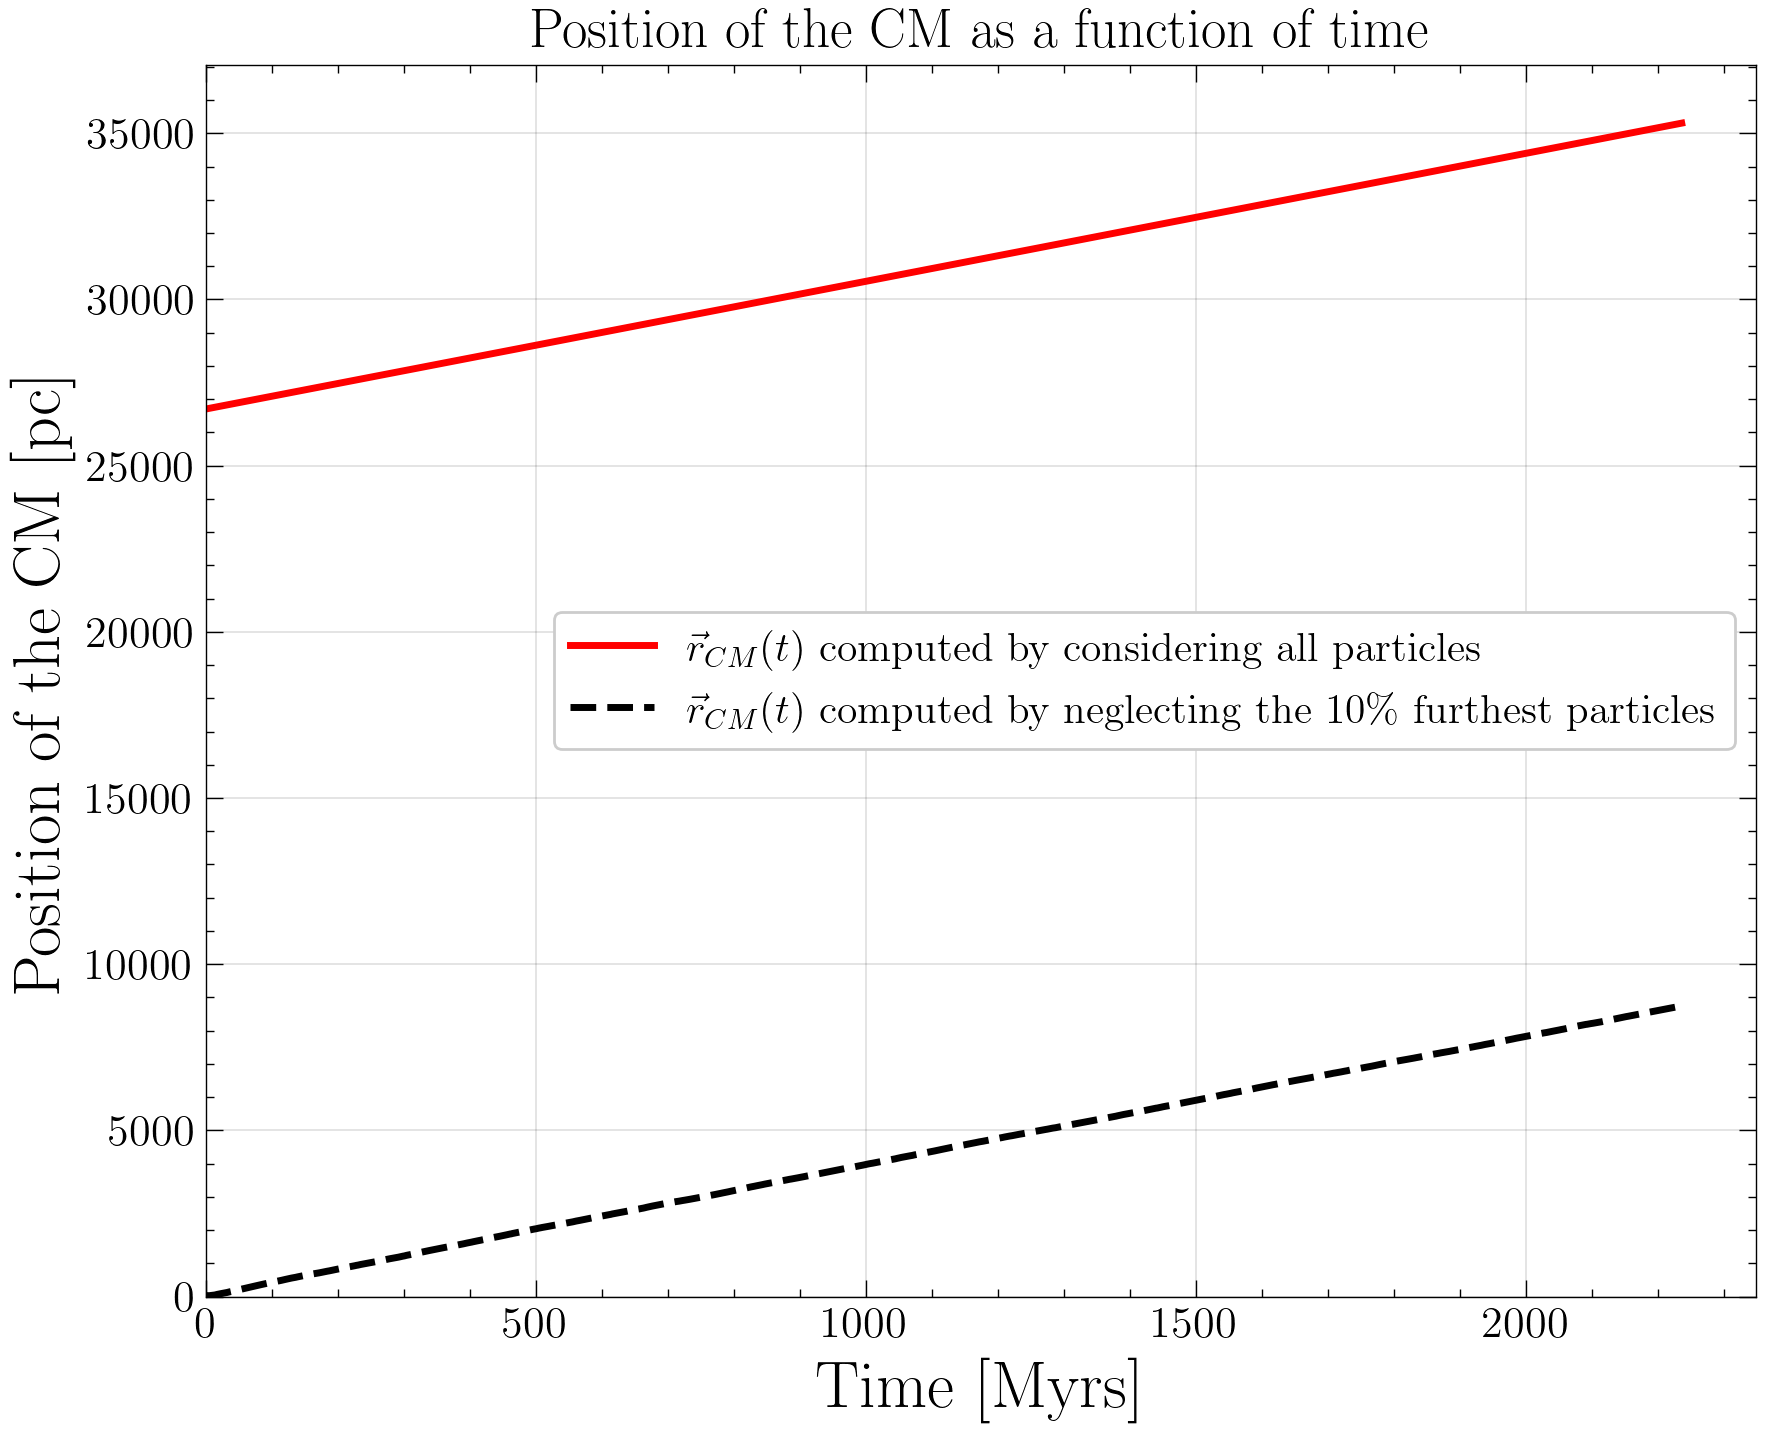

In [15]:
plt.plot(time, CMpos, color='red', lw=2.5, label='$\\vec{r}_{CM}(t)$ computed by considering all particles')
plt.plot(time, CMpos_q90, color='black', ls='--', lw=2.5, label='$\\vec{r}_{CM}(t)$ computed by neglecting the 10\% furthest particles')
plt.xlim(0)
plt.ylim(0)
plt.title('Position of the CM as a function of time', fontsize=20)
plt.xlabel('Time [Myrs]')
plt.ylabel('Position of the CM [pc]')
plt.legend(fontsize = 15);

Plot the velocity of the center of mass as a function of time

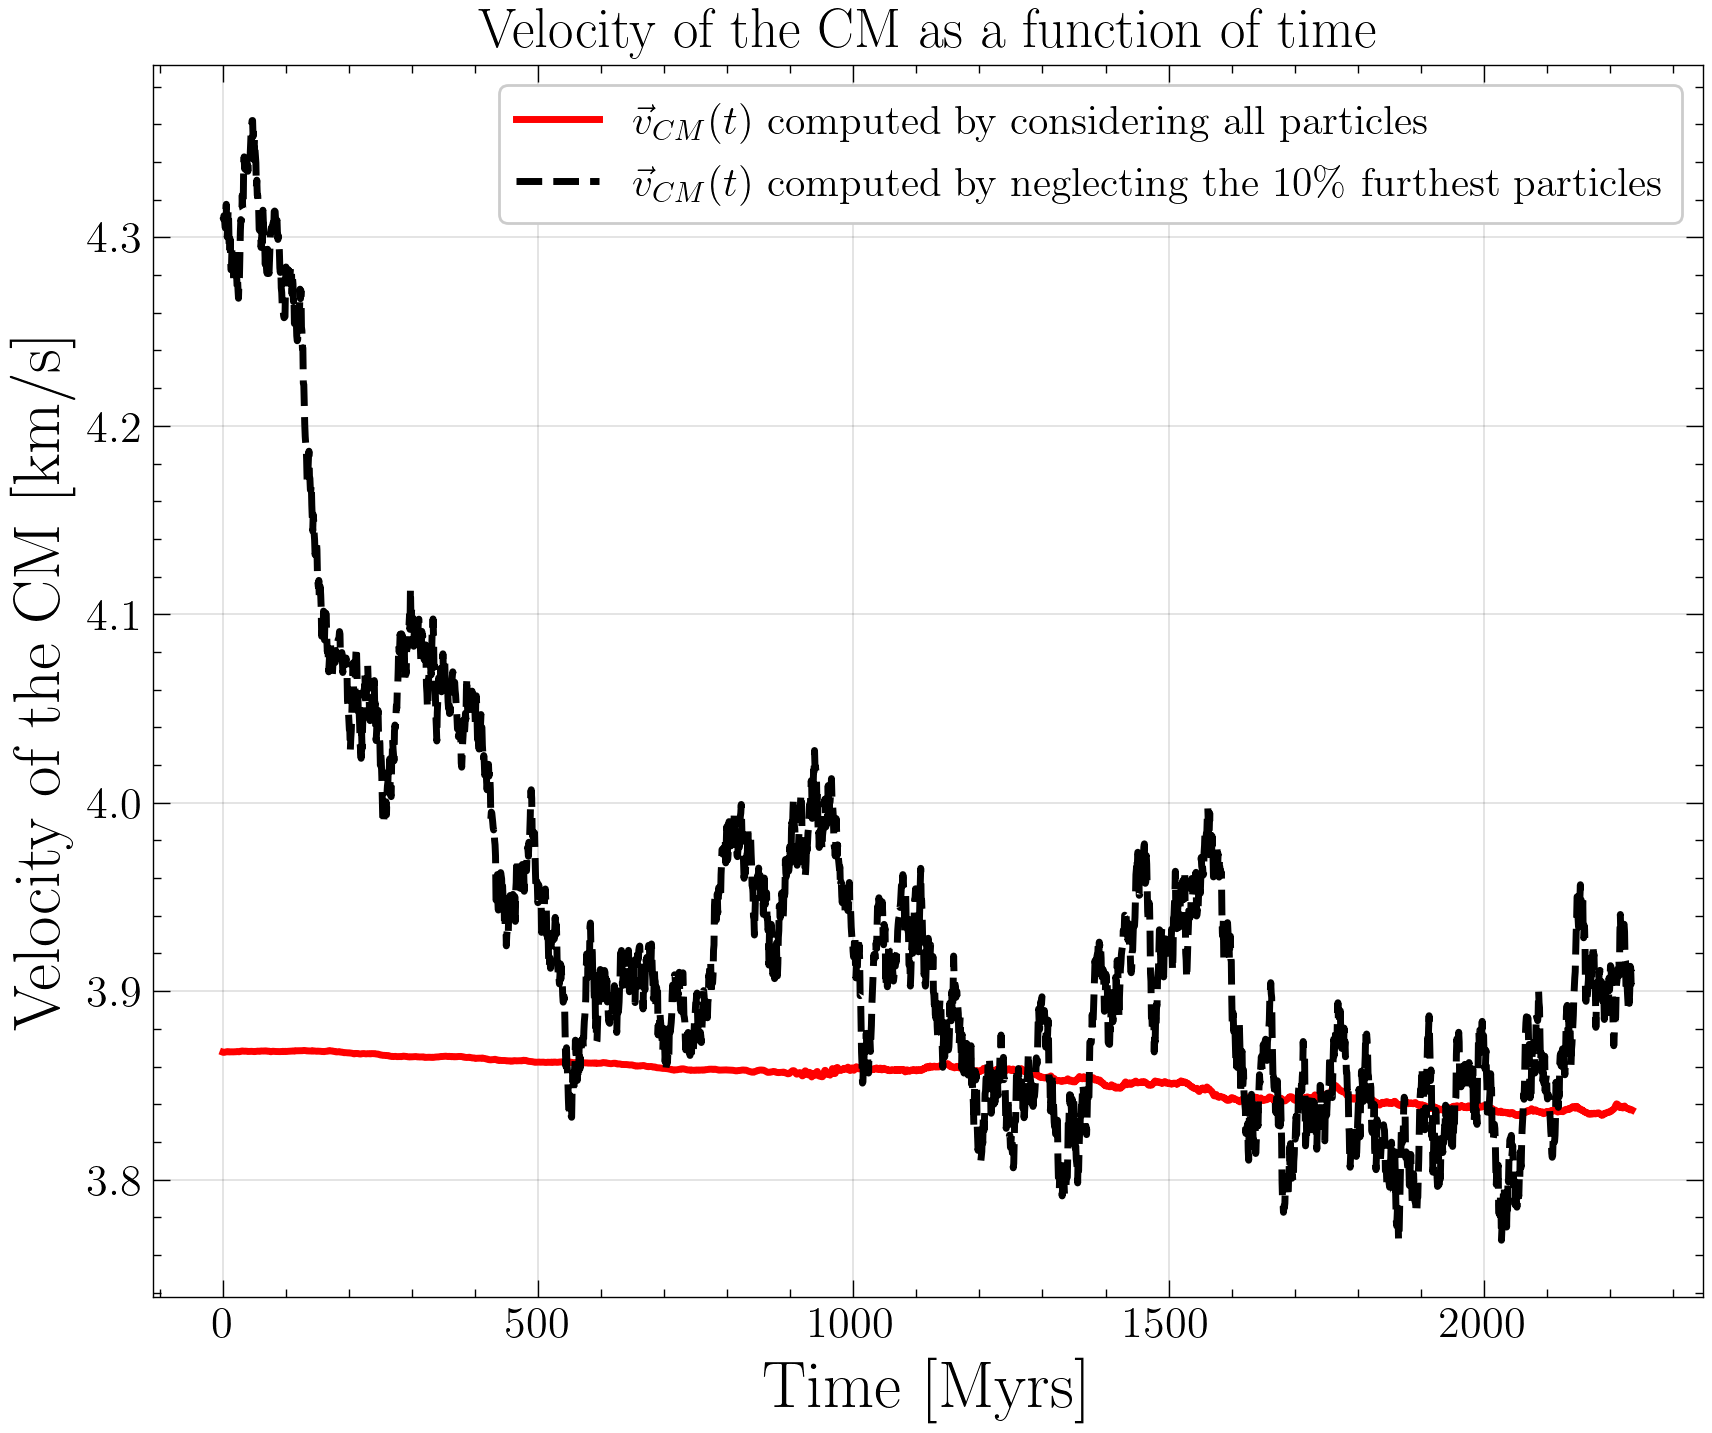

In [16]:
plt.plot(time, CMvel, color='red', lw=2.5, label='$\\vec{v}_{CM}(t)$ computed by considering all particles')
plt.plot(time, CMvel_q90, color='black', ls='--', lw=2.5, label='$\\vec{v}_{CM}(t)$ computed by neglecting the 10\% furthest particles')
plt.title('Velocity of the CM as a function of time', fontsize=20)
plt.xlabel('Time [Myrs]')
plt.ylabel('Velocity of the CM [km/s]')
plt.legend(fontsize = 15);

Plot the acceleration of the center of mass as a function of time

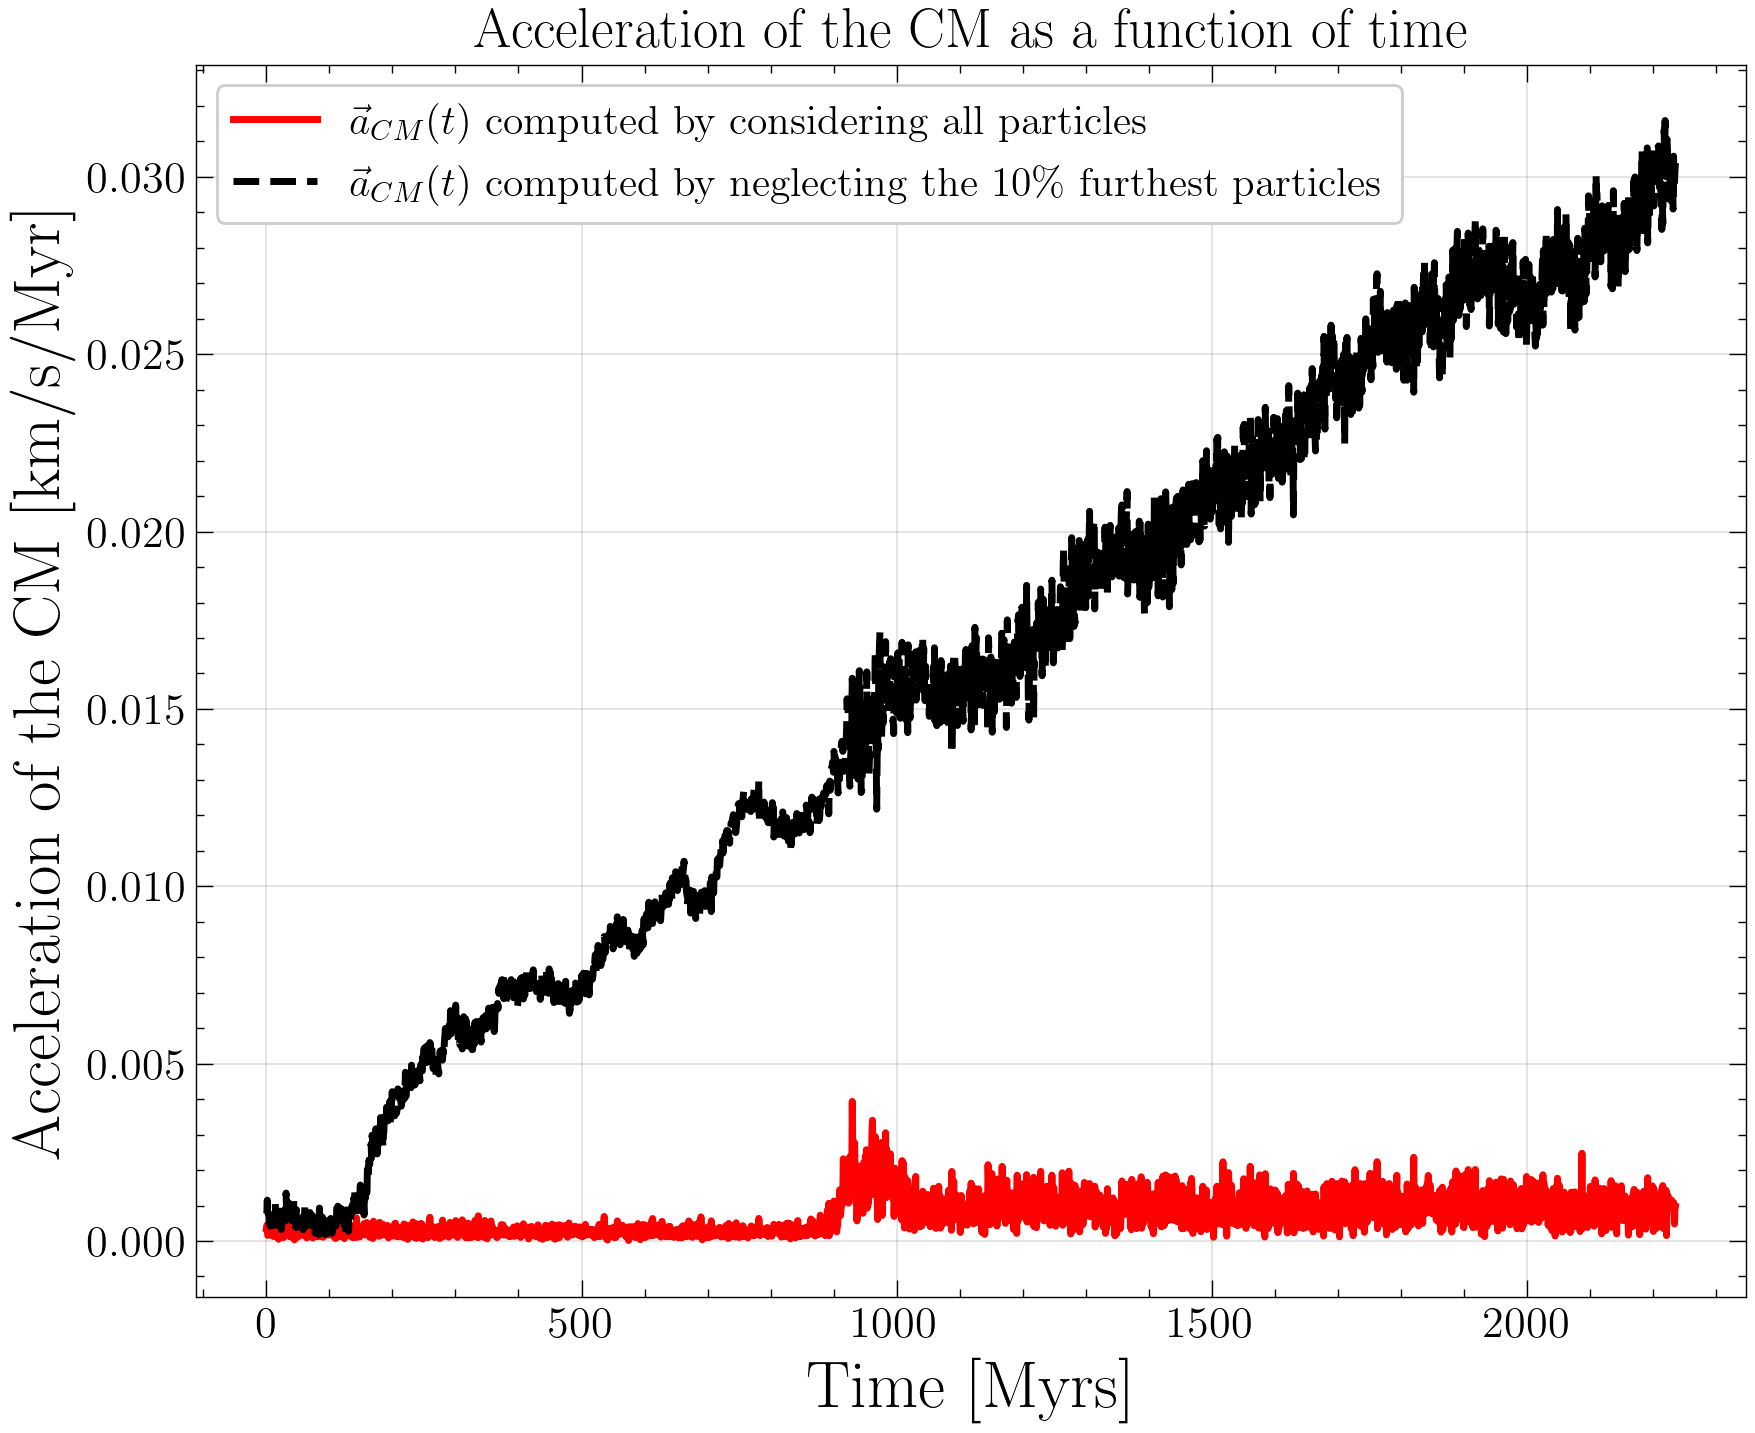

In [17]:
plt.plot(time, CMacc, color='red', lw=2.5, label='$\\vec{a}_{CM}(t)$ computed by considering all particles')
plt.plot(time, CMacc_q90, color='black', ls='--', lw=2.5, label='$\\vec{a}_{CM}(t)$ computed by neglecting the 10\% furthest particles')
plt.title('Acceleration of the CM as a function of time', fontsize=20)
plt.xlabel('Time [Myrs]')
plt.ylabel('Acceleration of the CM [km/s/Myr]')
plt.legend(fontsize = 15);

Redefine positions and velocities in the CM frame, considering the CM position and velocity computed by neglecting the 10% furthest particles (more robust)

In [18]:
# Re-assign the CM variables
CMpos_vector = CMpos_q90_vector
CMpos = CMpos_q90
CMvel_vector = CMvel_q90_vector
CMvel = CMvel_q90
CMacc_vector = CMacc_q90_vector
CMacc = CMacc_q90

# Delete unnecessary variables to save memory
del CMpos_q90_vector, CMpos_q90, CMvel_q90_vector, CMvel_q90, CMacc_q90_vector, CMacc_q90, mask

In [19]:
# The only accelerations that we are interested in are those of the MBHs
a_mbh1_vector_output = np.array([ax[-1], ay[-1], az[-1]])
a_mbh2_vector_output = np.array([ax[-2], ay[-2], az[-2]])

del ax, ay, az

In [20]:
# Redefine the position and velocity vectors of the particles in the CM frame
x = x - CMpos_vector[0]
y = y - CMpos_vector[1]
z = z - CMpos_vector[2]
vx = vx - CMvel_vector[0]
vy = vy - CMvel_vector[1]
vz = vz - CMvel_vector[2]
a_mbh1_vector_output = a_mbh1_vector_output - CMacc_vector
a_mbh2_vector_output = a_mbh2_vector_output - CMacc_vector

In [21]:
# Recompute the distance of the particles from the CM
dist_particle = None
dist_particle = Dist(x, y, z, 0, 0, 0)

We constrain our plots to boxes of length `dist_plotlimits` in each direction, which is defined as the maximum in time of the 90%-quantiles of the distances between the particles and the CM

In [22]:
dist_plotlimits = np.max(np.quantile(dist_particle, 0.9, axis=0))
dist_plotlimits

16184.800098706011

# Distance quantiles

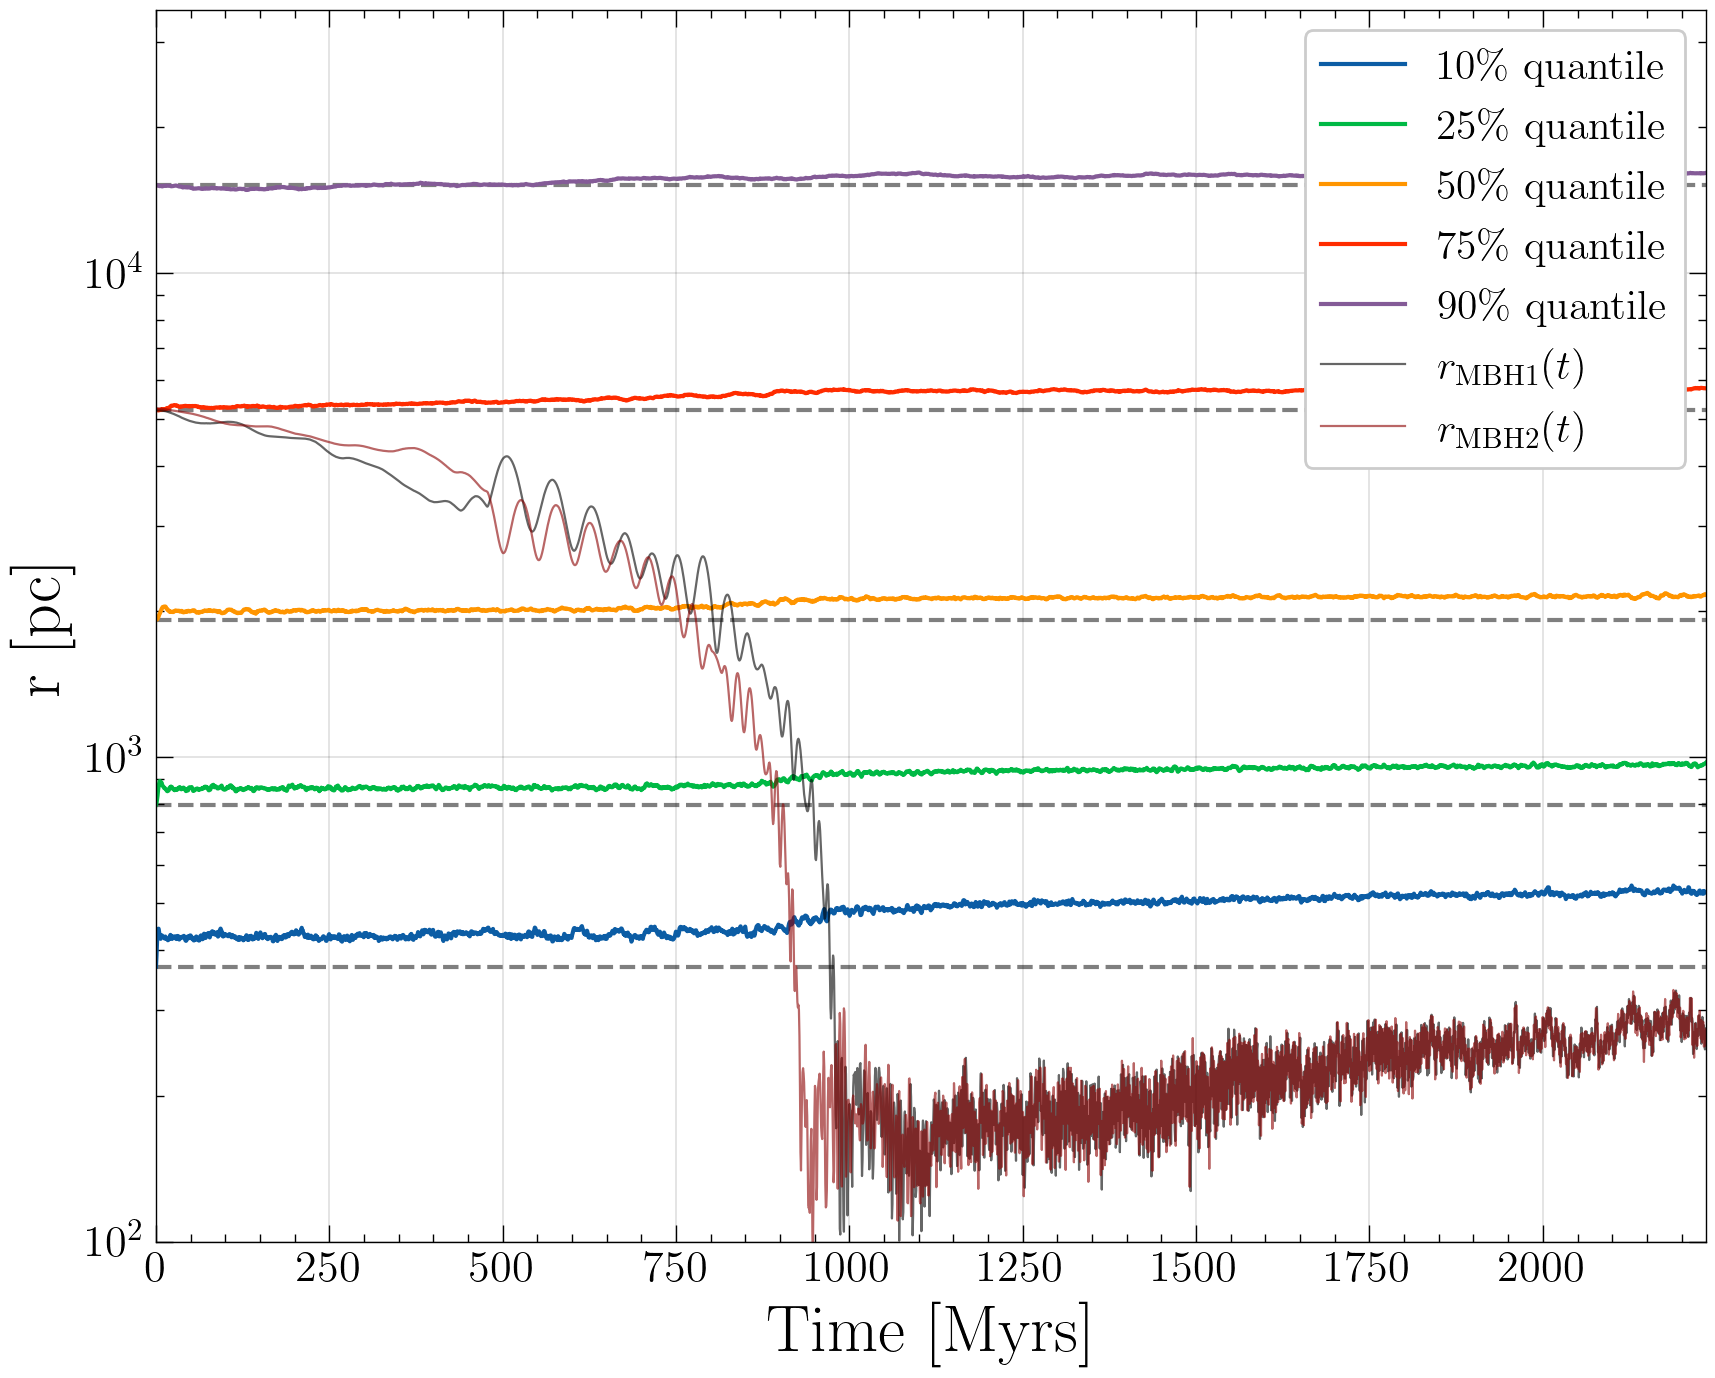

In [23]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
dist_quantiles = np.quantile(dist_particle, quantiles, axis=0)
for i in range(len(quantiles)):
    plt.axhline(dist_quantiles[i][0], ls='--', color='black', alpha=0.5)
    plt.plot(time, dist_quantiles[i], label=f'{int(100*quantiles[i])}\% quantile')
plt.plot(time, dist_particle[-1], color='black', lw=0.8, alpha=0.6, label='$r_\\text{MBH1}(t)$')
plt.plot(time, dist_particle[-2], color='darkred', lw=0.8, alpha=0.6, label='$r_\\text{MBH2}(t)$')
plt.xlim(0, time[-1])
plt.yscale('log')
plt.ylim(100, 35000)
#plt.title('Distance quantiles as a function of time')
plt.xlabel('Time [Myrs]')
plt.ylabel('r [pc]')
plt.legend(loc='upper right', fontsize=15);

del dist_quantiles

# Orbits of the MBHs

Compute the distance, the velocity, and the angular momentum of the two MBHs in the CM frame as a function of time

In [24]:
dist_mbh1 = dist_particle[-1]
dist_mbh2 = dist_particle[-2]

v_mbh1 = np.sqrt(vx[-1]**2 + vy[-1]**2 + vz[-1]**2)
v_mbh2 = np.sqrt(vx[-2]**2 + vy[-2]**2 + vz[-2]**2)

angmom_mbh1 = np.linalg.norm(np.cross(np.array([x[-1,:], y[-1,:], z[-1,:]]).T, np.array((vx[-1,:], vy[-1,:], vz[-1,:])).T), axis=1)
angmom_mbh2 = np.linalg.norm(np.cross(np.array([x[-2,:], y[-2,:], z[-2,:]]).T, np.array((vx[-2,:], vy[-2,:], vz[-2,:])).T), axis=1)

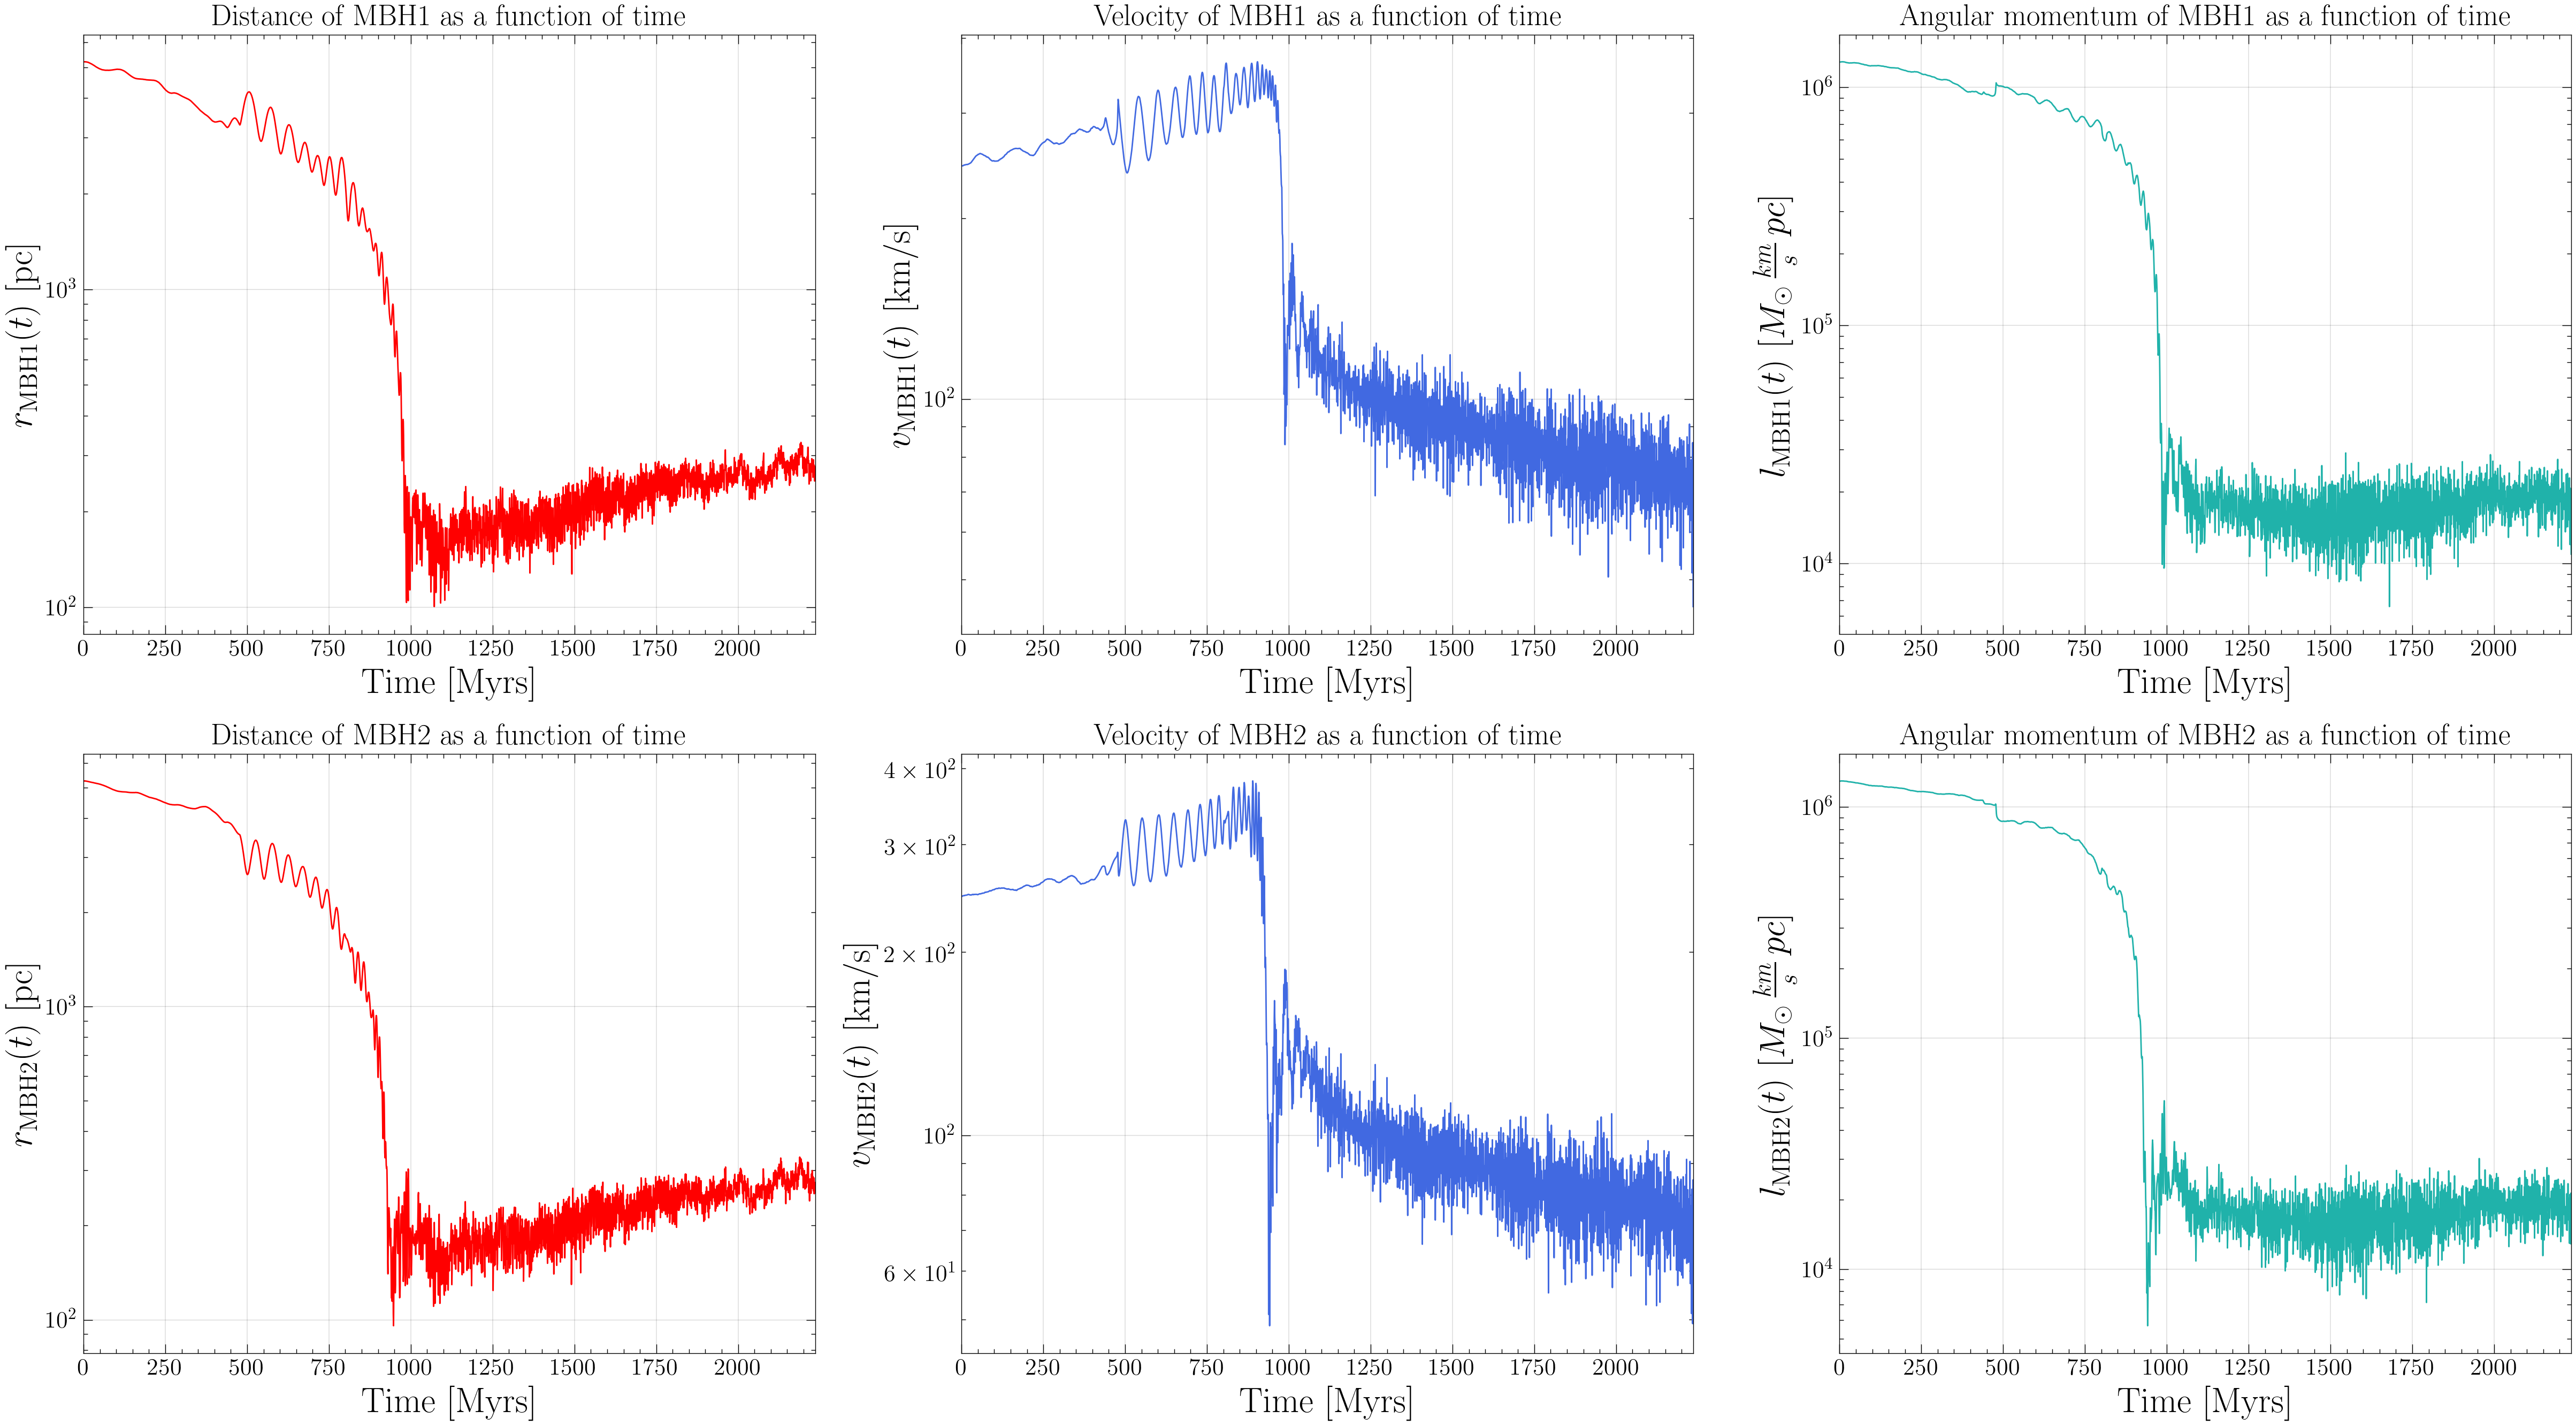

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(30, 16))

ax = axes[0,0]
ax.plot(time, dist_mbh1, color='red', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Distance of MBH1 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$r_{\\rm{MBH1}} (t)$ [pc]')

ax = axes[0,1]
ax.plot(time, v_mbh1, color='royalblue', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Velocity of MBH1 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$v_{\\rm{MBH1}} (t)$ [km/s]')

ax = axes[0,2]
ax.plot(time, angmom_mbh1, color='lightseagreen', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Angular momentum of MBH1 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$l_{\\rm{MBH1}} (t)$ $[M_\odot \, \\frac{km}{s} \, pc]$')

ax = axes[1,0]
ax.plot(time, dist_mbh2, color='red', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Distance of MBH2 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$r_{\\rm{MBH2}} (t)$ [pc]')

ax = axes[1,1]
ax.plot(time, v_mbh2, color='royalblue', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Velocity of MBH2 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$v_{\\rm{MBH2}} (t)$ [km/s]')

ax = axes[1,2]
ax.plot(time, angmom_mbh2, color='lightseagreen', lw=1)
ax.set_xlim(0, time[-1])
ax.set_yscale('log')
ax.set_title('Angular momentum of MBH2 as a function of time', fontsize=20)
ax.set_xlabel('Time [Myrs]')
ax.set_ylabel('$l_{\\rm{MBH2}} (t)$ $[M_\odot \, \\frac{km}{s} \, pc]$');

# Binary separation

We can estimate the influence radius of a black hole as:

$r_\text{influence}(t) \, = \, \dfrac{GM}{\sigma^2(t)}$, where $\sigma$ is the velocity dispersion of the surrounding stars.\
We can consider the particles in a sphere surrouding the black holes at each time-step $t_i$ and compute $r_\text{influence} (t_i)$

100%|██████████| 3000/3000 [00:03<00:00, 946.79it/s]


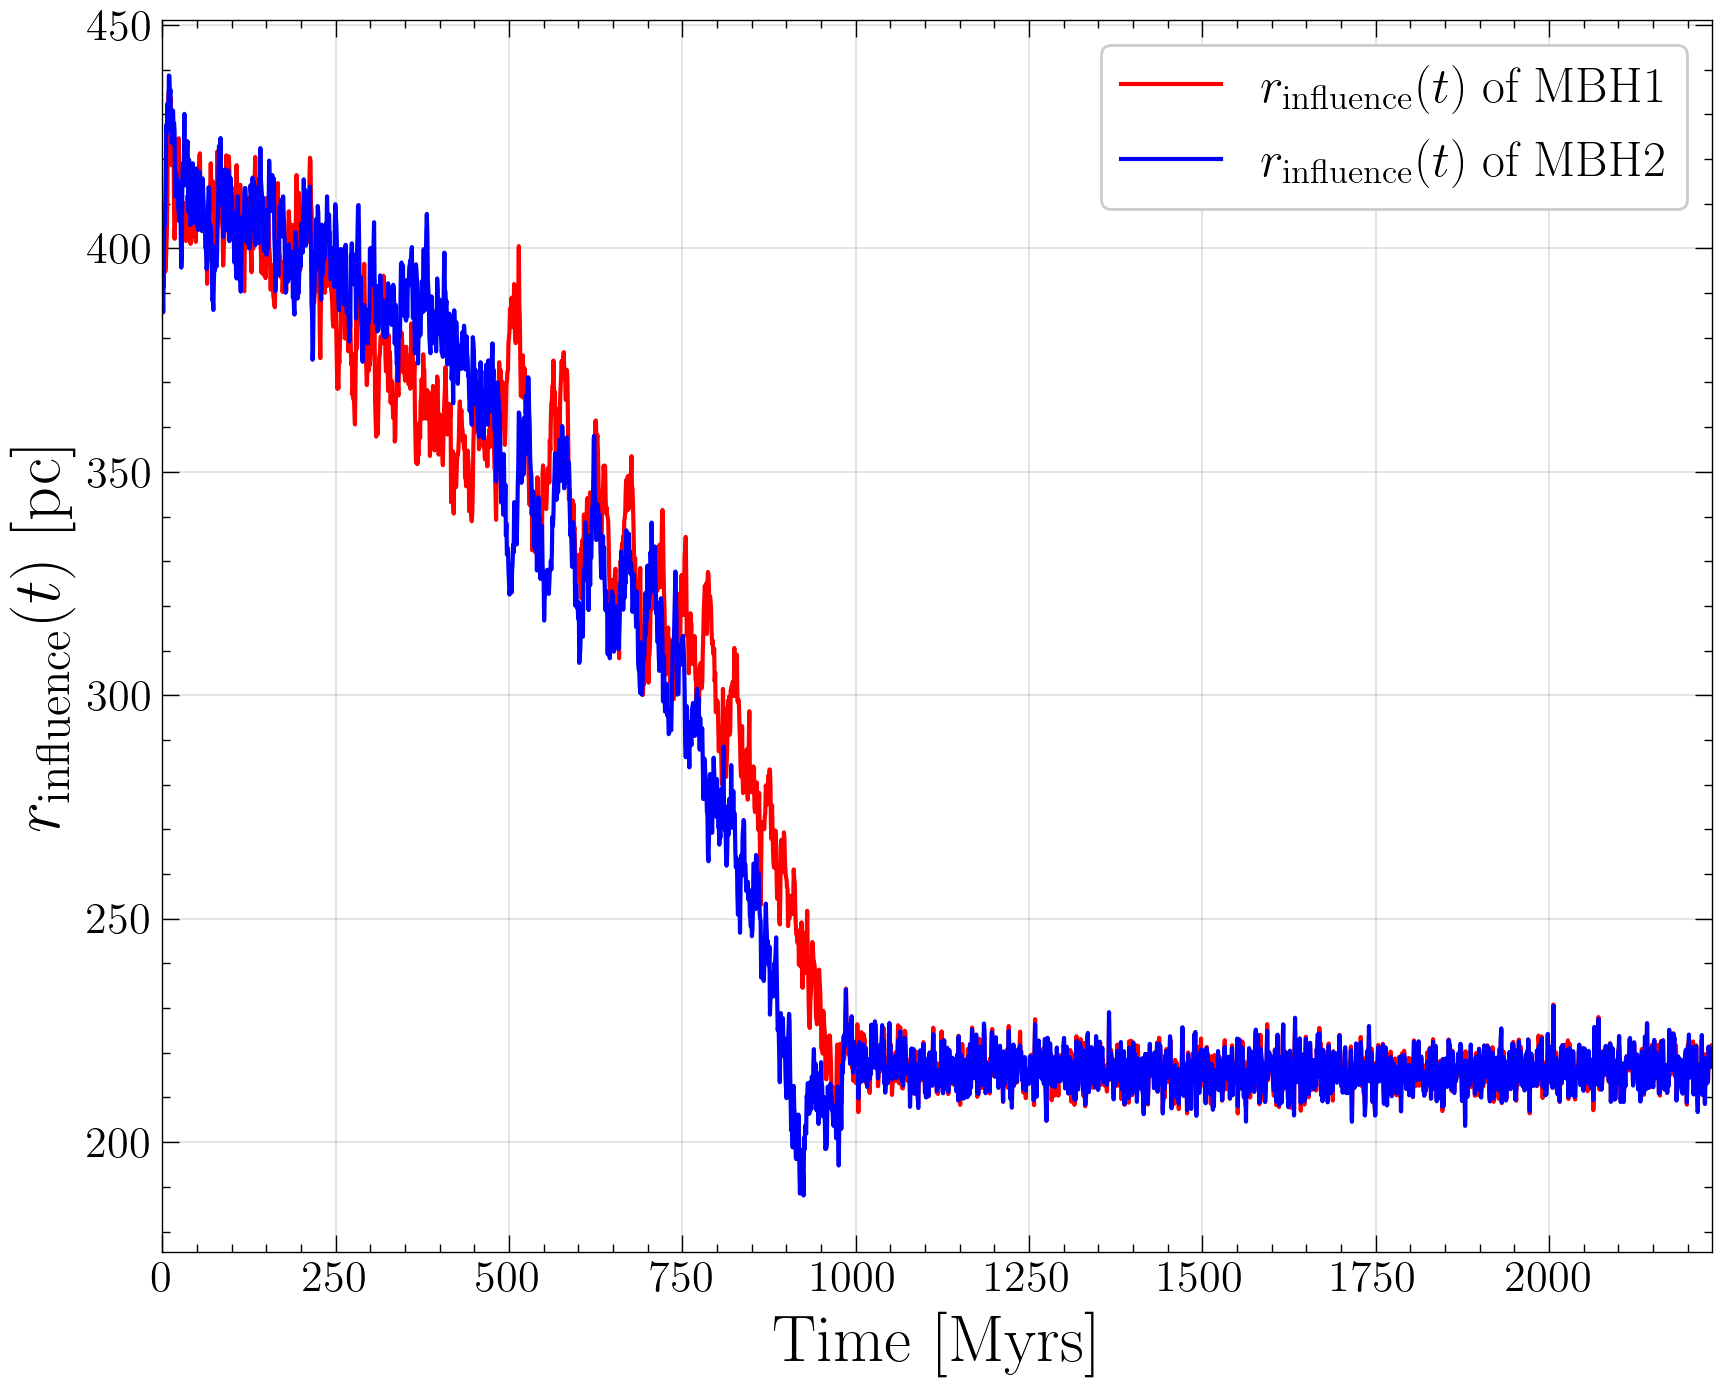

In [26]:
def Influence_Radius(x, y, z, vx, vy, vz, time, index_perturber=-1):
    sigma = np.zeros(len(time))
    r_influence = np.zeros(len(time))
    
    # This will be useful later 
    number_density = np.zeros(len(time))
    #########################################

    for i in tqdm(range(len(time))):
        dist_particle_i = Dist(x[:-2,i], y[:-2,i], z[:-2,i], x[index_perturber,i], y[index_perturber,i], z[index_perturber,i])
        r_inner = np.quantile(dist_particle_i, 0.00)
        r_outer = np.quantile(dist_particle_i, 0.10)
    
        mask = np.logical_and(r_inner<dist_particle_i, dist_particle_i<r_outer) 

        sigma[i] = np.std(np.sqrt(vx[:-2,i][mask]**2 + vy[:-2,i][mask]**2 + vz[:-2,i][mask]**2))
        
        r_influence[i] = G_pu*M_mbh/sigma[i]**2
        
        # This will be useful later 
        volume = (4/3)*np.pi*(r_outer**3 - r_inner**3)
        number_density[i] = np.sum(mask)/volume
        #########################################
        
        
    return r_influence, sigma, number_density
    

r_influence_mbh1, sigma_mbh1, number_density_mbh1 = Influence_Radius(x, y, z, vx, vy, vz, time, index_perturber=-1)
r_influence_mbh2, sigma_mbh2, number_density_mbh2 = Influence_Radius(x, y, z, vx, vy, vz, time, index_perturber=-2)

plt.plot(time, r_influence_mbh1, color='red', label='$r_{\\text{influence}} (t)$ of MBH1')
plt.plot(time, r_influence_mbh2, color='blue', label='$r_{\\text{influence}} (t)$ of MBH2')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('$r_{\\text{influence}} (t)$ [pc]')
plt.legend();

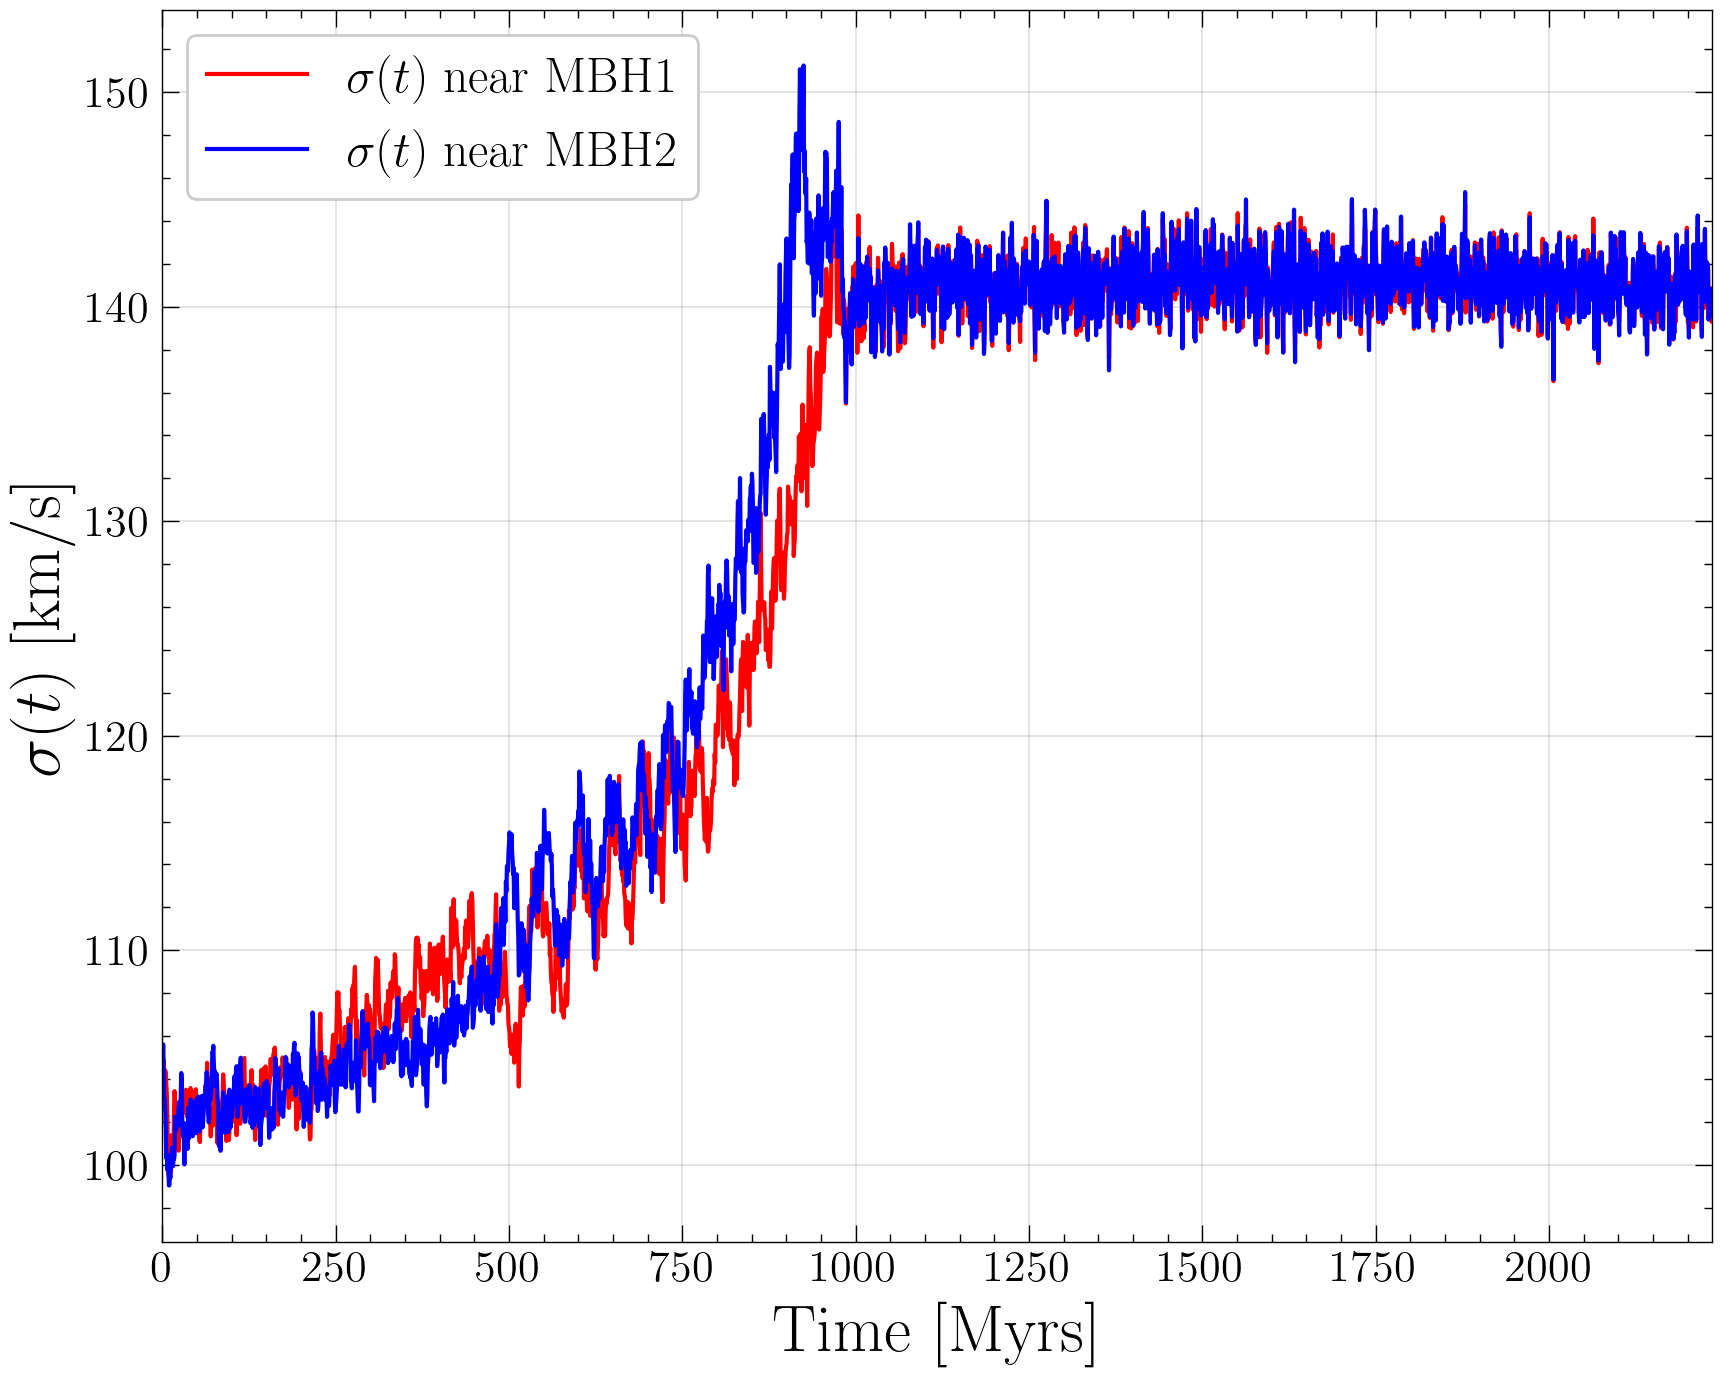

In [27]:
plt.plot(time, sigma_mbh1, color='red', label='$\sigma(t)$ near MBH1')
plt.plot(time, sigma_mbh2, color='blue', label='$\sigma(t)$ near MBH2')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('$\sigma(t)$ [km/s]')
plt.legend();

In [28]:
r_influence = np.mean(np.array([r_influence_mbh1, r_influence_mbh2]), axis=0)
del r_influence_mbh1, r_influence_mbh2

Compute the separation of the two MBHs

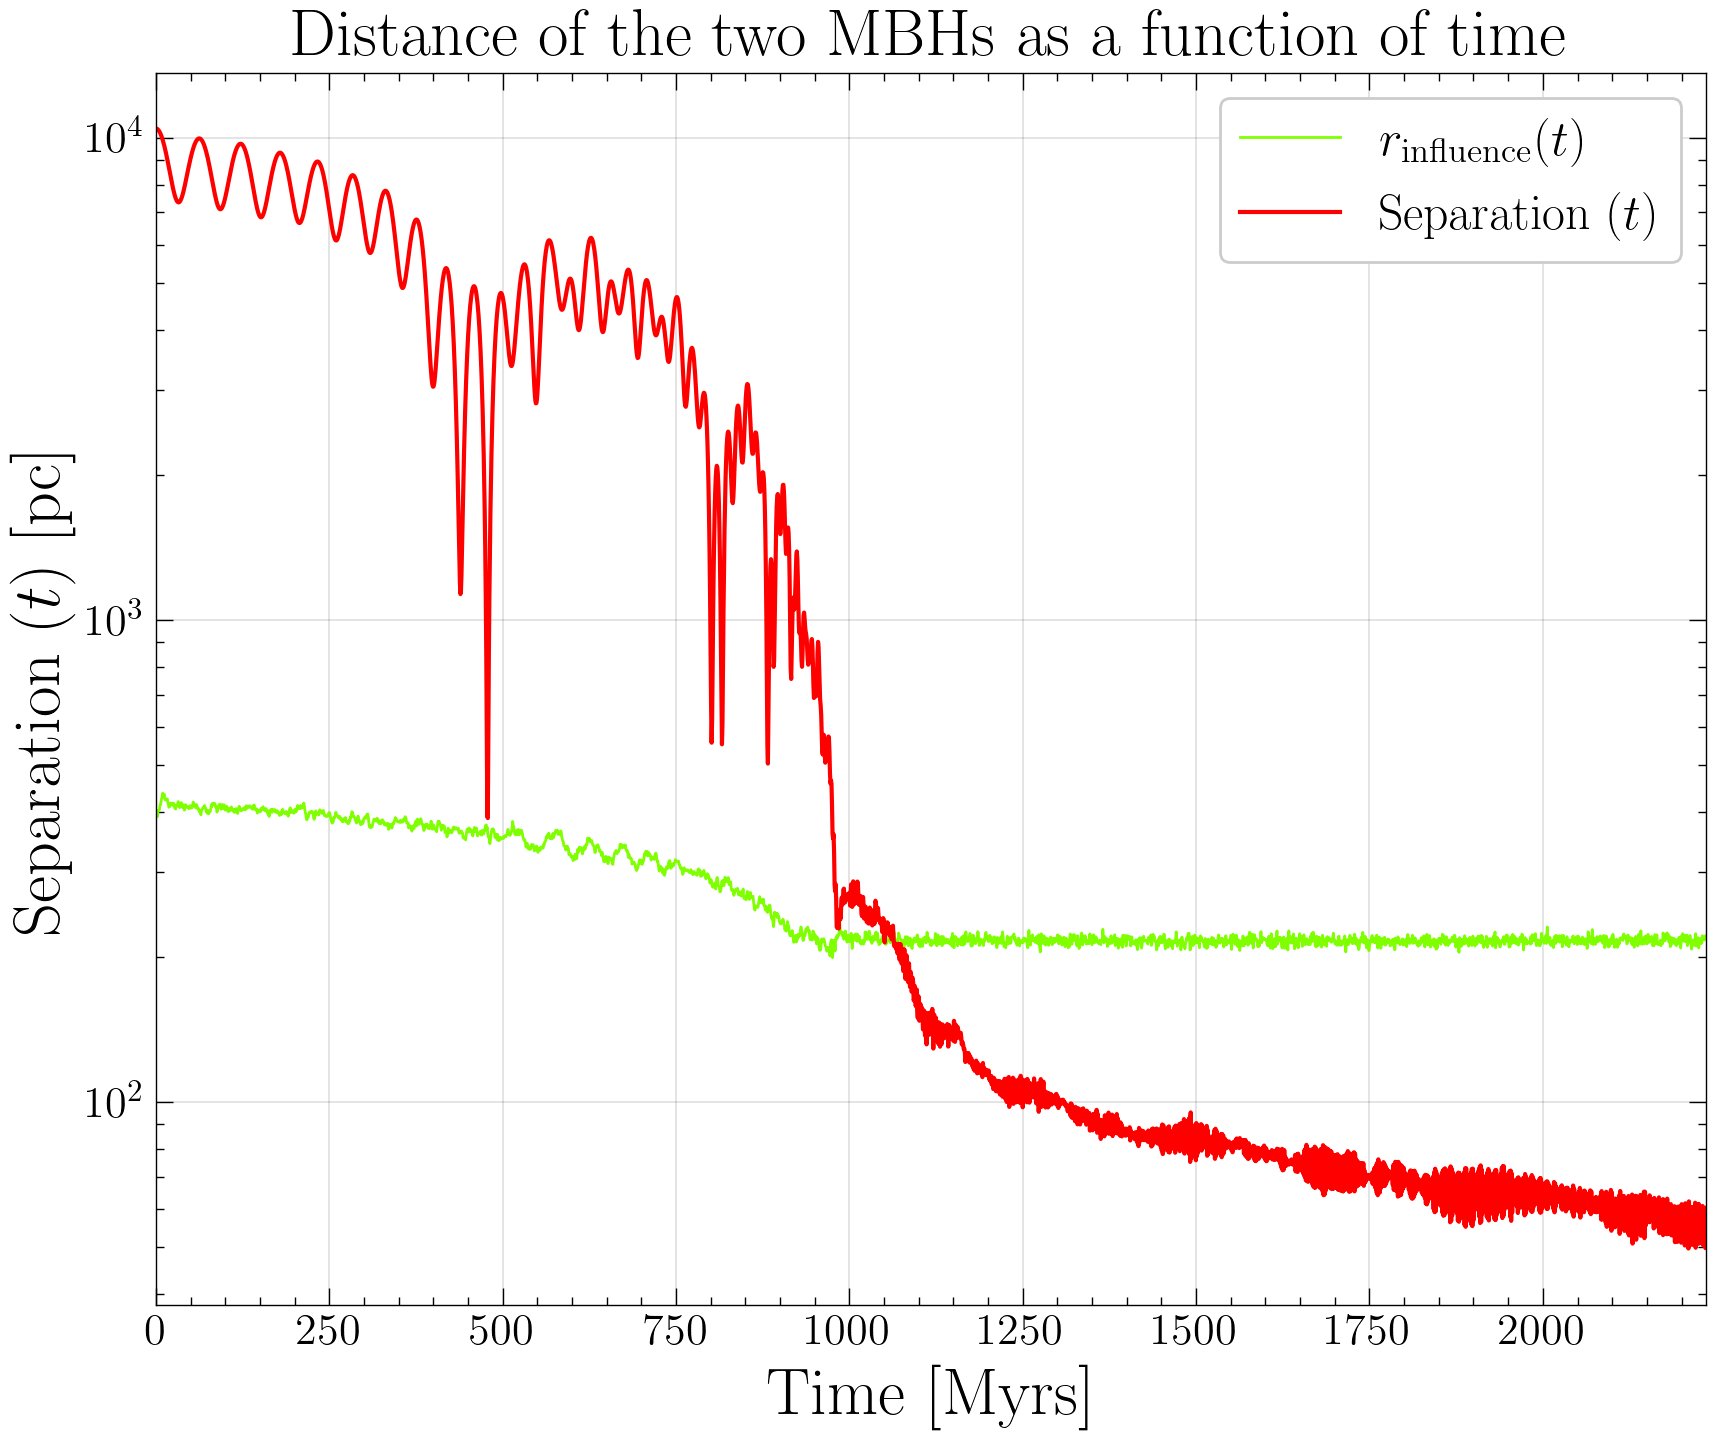

In [29]:
dist_mbhs = Dist(x[-1,:], y[-1,:], z[-1,:], x[-2,:], y[-2,:], z[-2,:])

plt.plot(time, r_influence, color='chartreuse', lw=1, label='$r_{\\text{influence}}(t)$')
plt.plot(time, dist_mbhs, color='red', label='Separation $(t)$')
plt.xlim(0, time[-1])
plt.yscale('log')
plt.title('Distance of the two MBHs as a function of time')
plt.xlabel('Time [Myrs]')
plt.ylabel('Separation $(t)$ [pc]')
plt.legend();

If the velocity vectors and the radial separation vector lie in the same plane, then $\hat{v_1} \cdot \left[\hat{v_2} \times (\hat{r_1} - \hat{r_2})\right] \simeq 0$

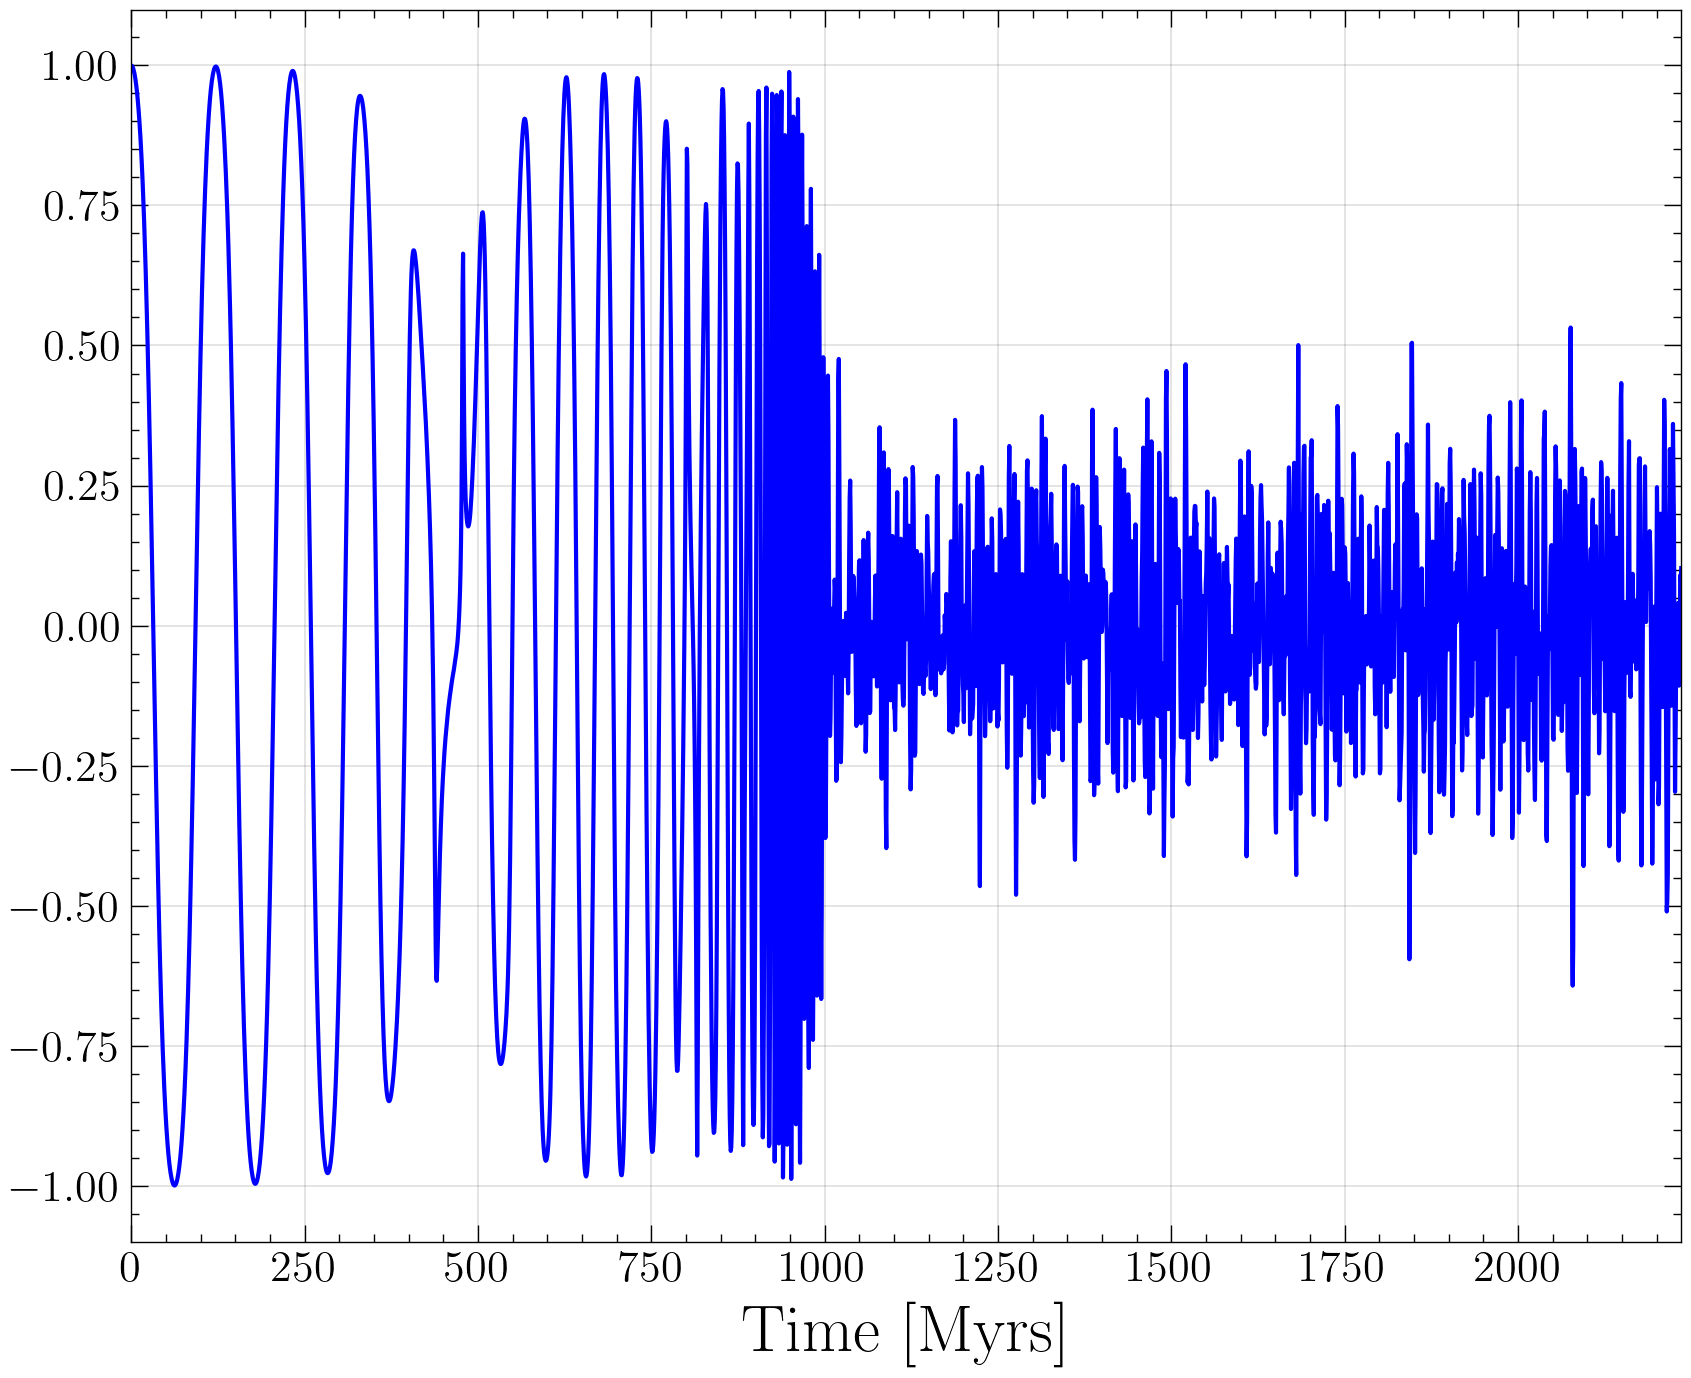

In [30]:
def Check_Coplanarity(x1, x2, v1, v2):
    coplanarity = np.zeros(len(time))

    for i in range(len(time)):
        v1_i = v1[:,i]
        v1_i = v1_i / np.linalg.norm(v1_i)

        v2_i = v2[:,i]
        v2_i = v2_i / np.linalg.norm(v2_i)

        r_rel_i = x1[:,i] - x2[:,i]
        r_rel_i = r_rel_i / np.linalg.norm(r_rel_i)

        coplanarity[i] = np.dot(v1_i, np.cross(v2_i, r_rel_i))
        
    return coplanarity
    
    
coplanarity = Check_Coplanarity(np.array([x[-1], y[-1], z[-1]]), 
                                np.array([x[-2], y[-2], z[-2]]), 
                                np.array([vx[-1], vy[-1], vz[-1]]), 
                                np.array([vx[-2], vy[-2], vz[-2]]))     
plt.plot(time, coplanarity, color='blue')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]');

# Binary reference frame

In [31]:
CMbinary_pos_vector = (np.array([x[-1], y[-1], z[-1]]) + np.array([x[-2], y[-2], z[-2]]))/2
CMbinary_v_vector = (np.array([vx[-1], vy[-1], vz[-1]]) + np.array([vx[-2], vy[-2], vz[-2]]))/2

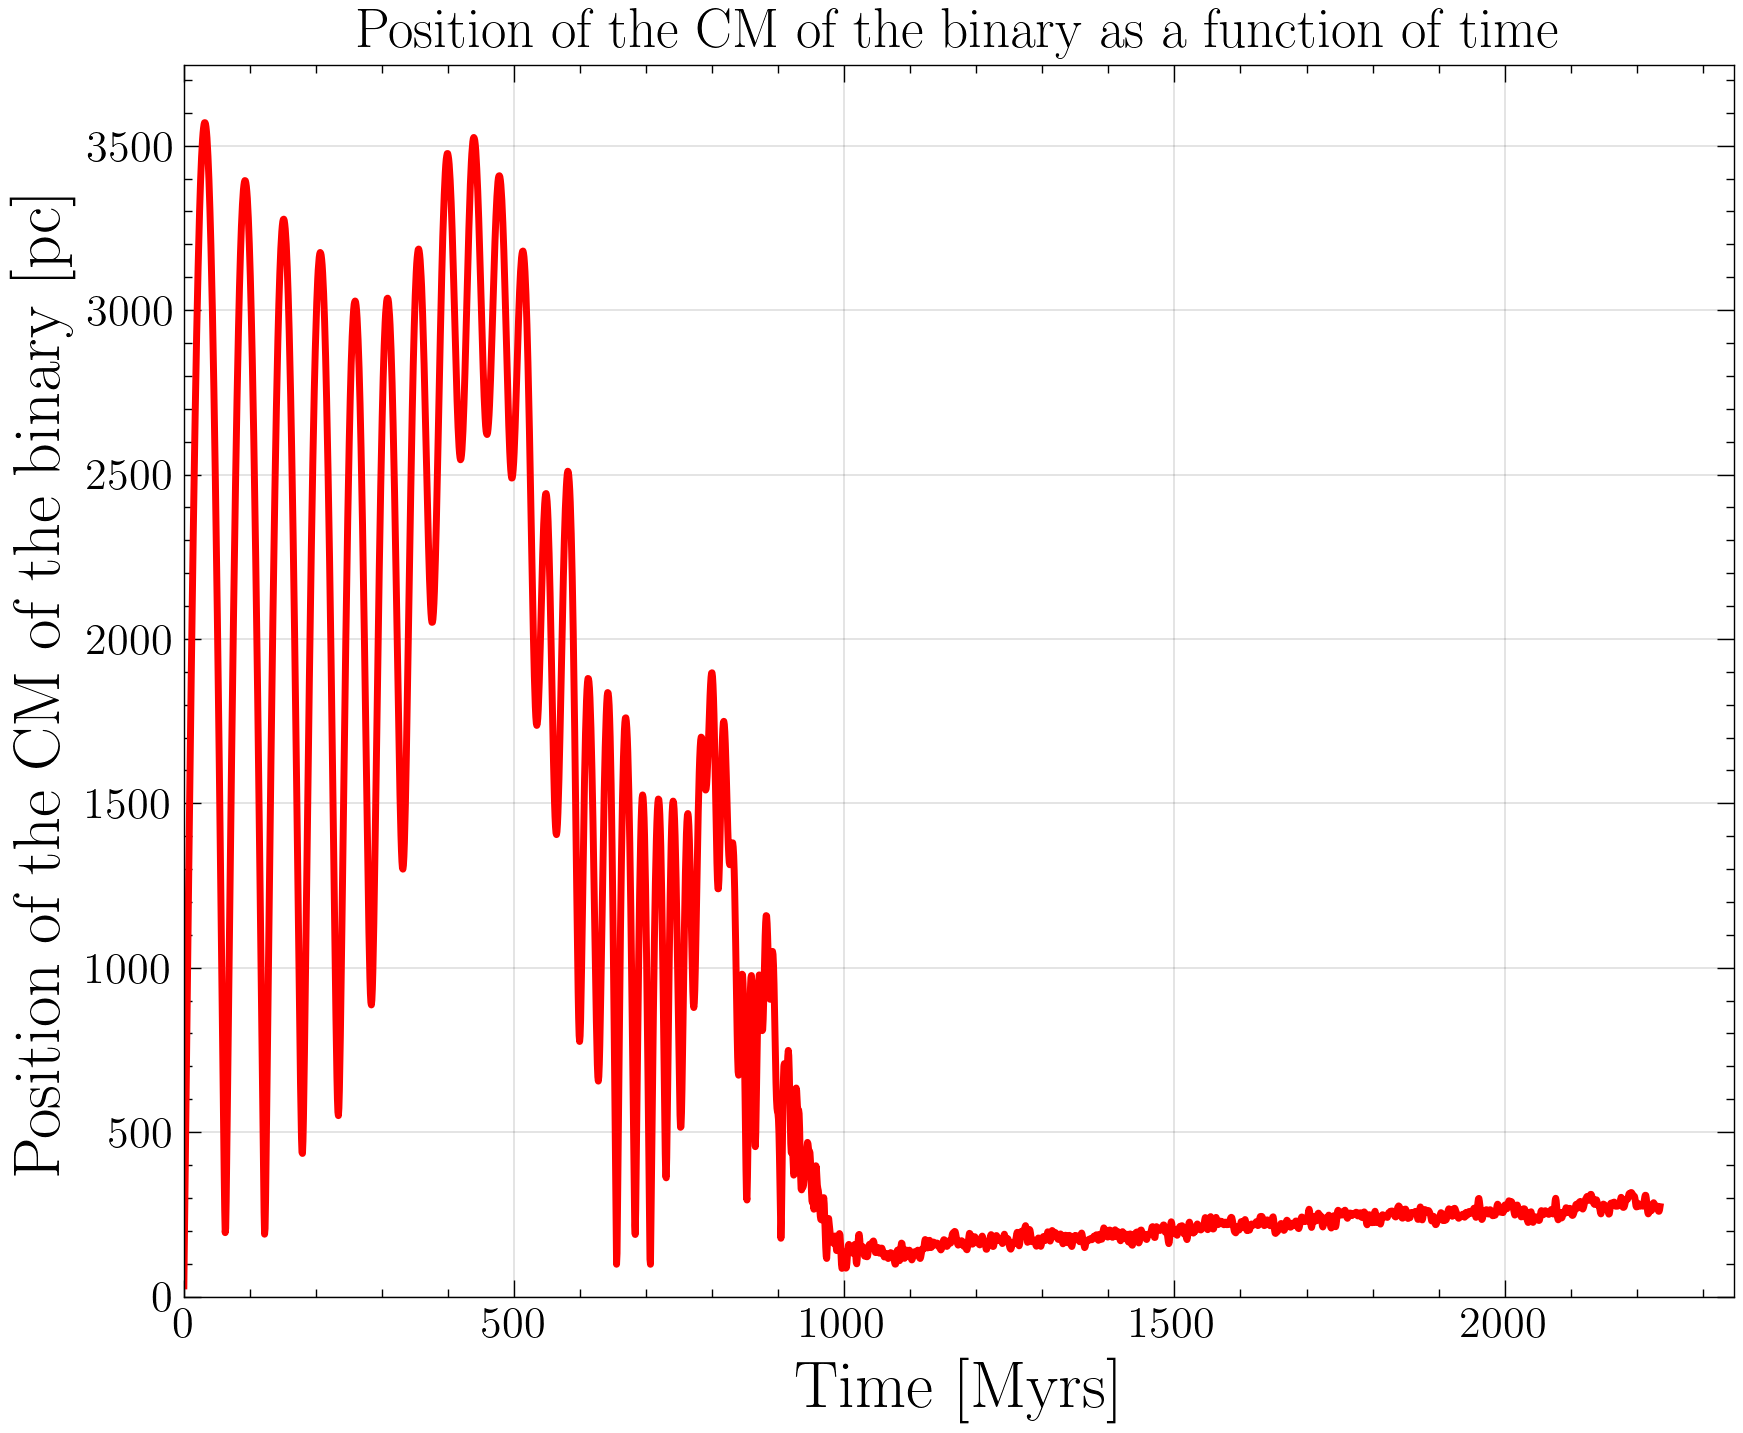

In [32]:
plt.plot(time, np.linalg.norm(CMbinary_pos_vector, axis=0), color='red', lw=2.5)
plt.xlim(0)
plt.ylim(0)
plt.title('Position of the CM of the binary as a function of time', fontsize=20)
plt.xlabel('Time [Myrs]')
plt.ylabel('Position of the CM of the binary [pc]');

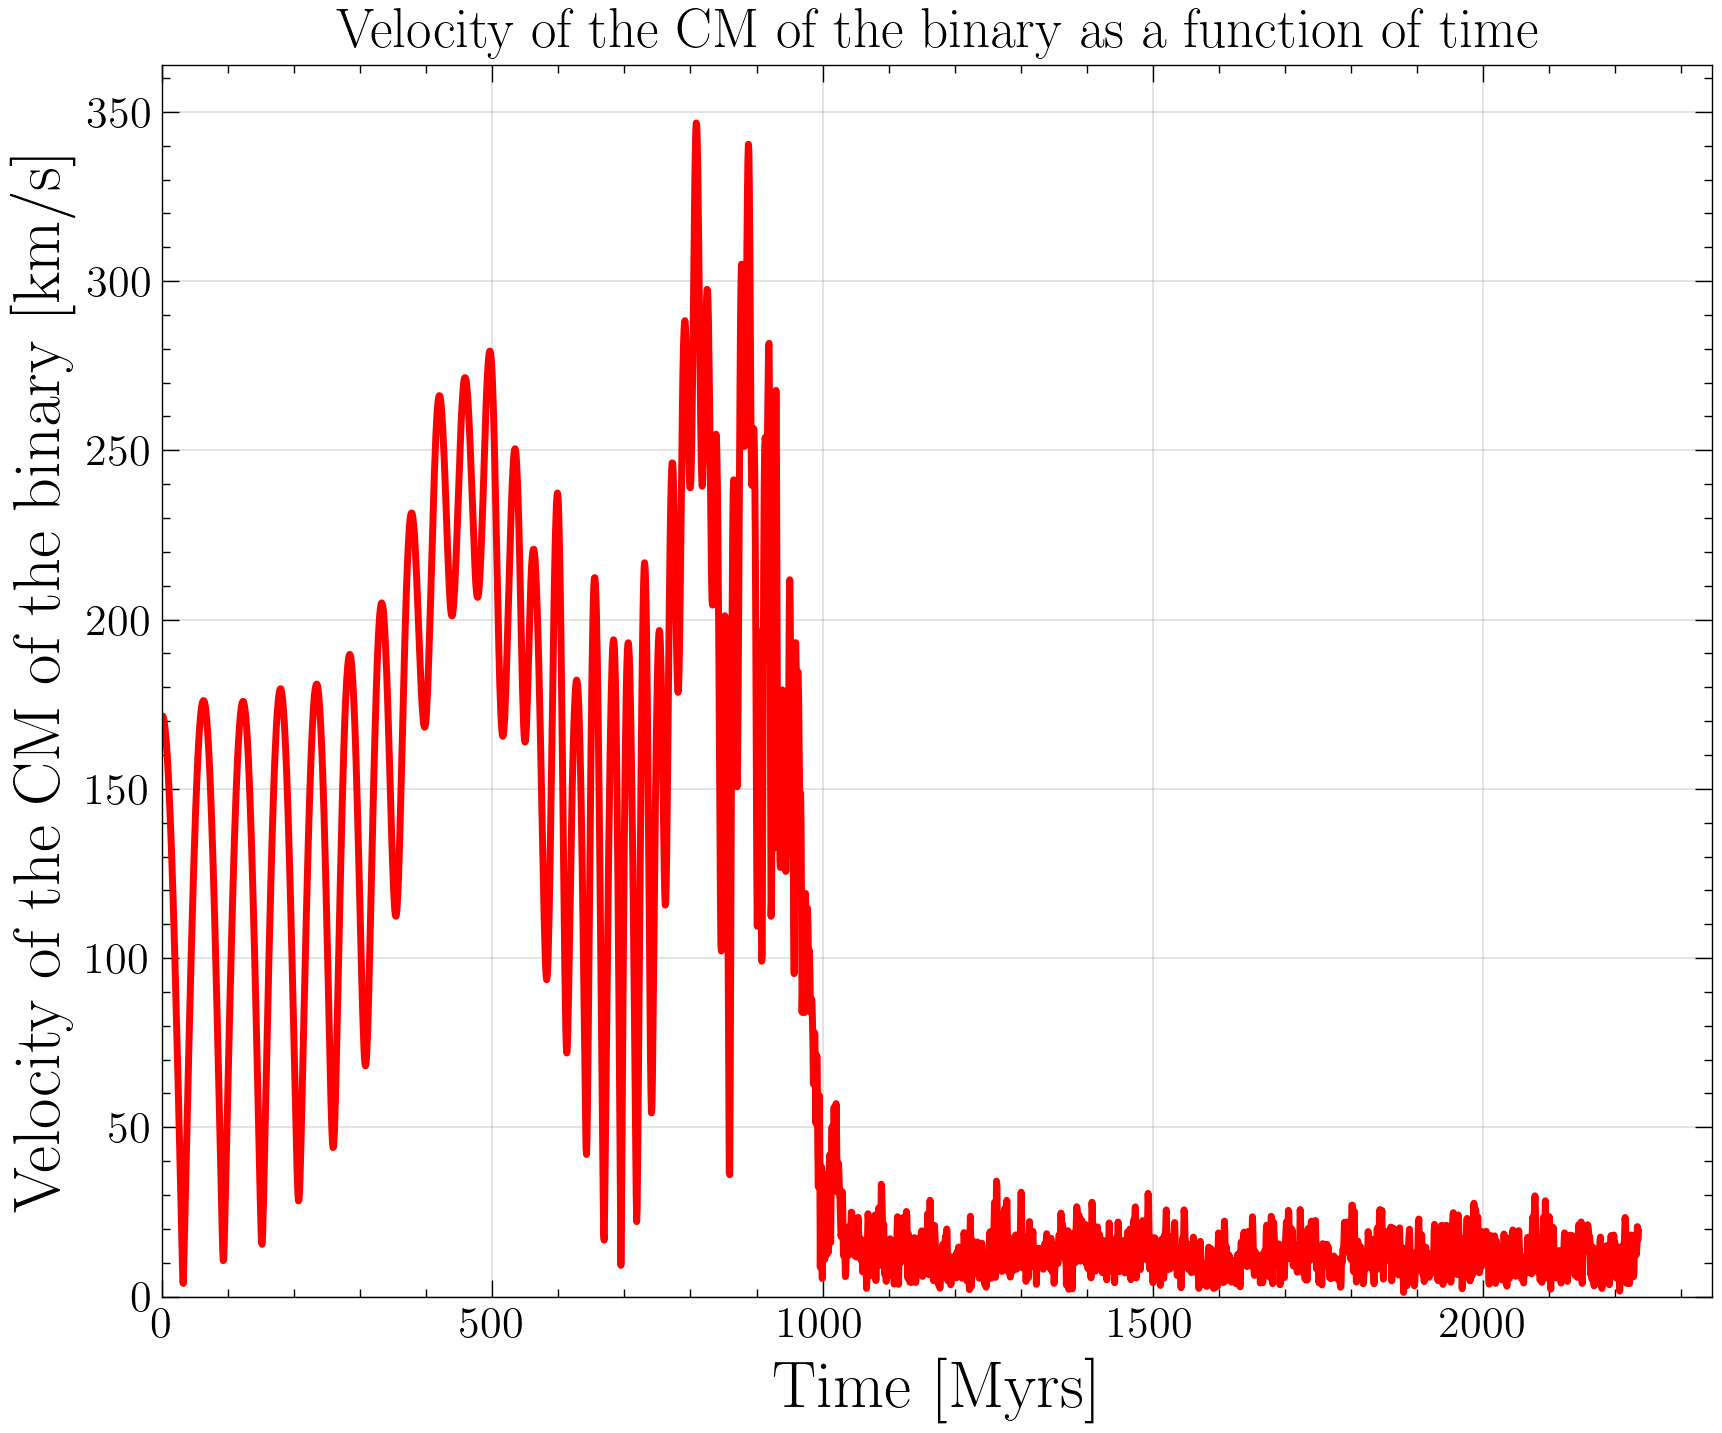

In [33]:
plt.plot(time, np.linalg.norm(CMbinary_v_vector, axis=0), color='red', lw=2.5)
plt.xlim(0)
plt.ylim(0)
plt.title('Velocity of the CM of the binary as a function of time', fontsize=20)
plt.xlabel('Time [Myrs]')
plt.ylabel('Velocity of the CM of the binary [km/s]');

In [34]:
pos_CMbinary_mbh1 = np.array([x[-1], y[-1], z[-1]]) - CMbinary_pos_vector
pos_CMbinary_mbh2 =  np.array([x[-2], y[-2], z[-2]]) - CMbinary_pos_vector
v_CMbinary_mbh1 = np.array([vx[-1], vy[-1], vz[-1]]) - CMbinary_v_vector
v_CMbinary_mbh2 = np.array([vx[-2], vy[-2], vz[-2]]) - CMbinary_v_vector

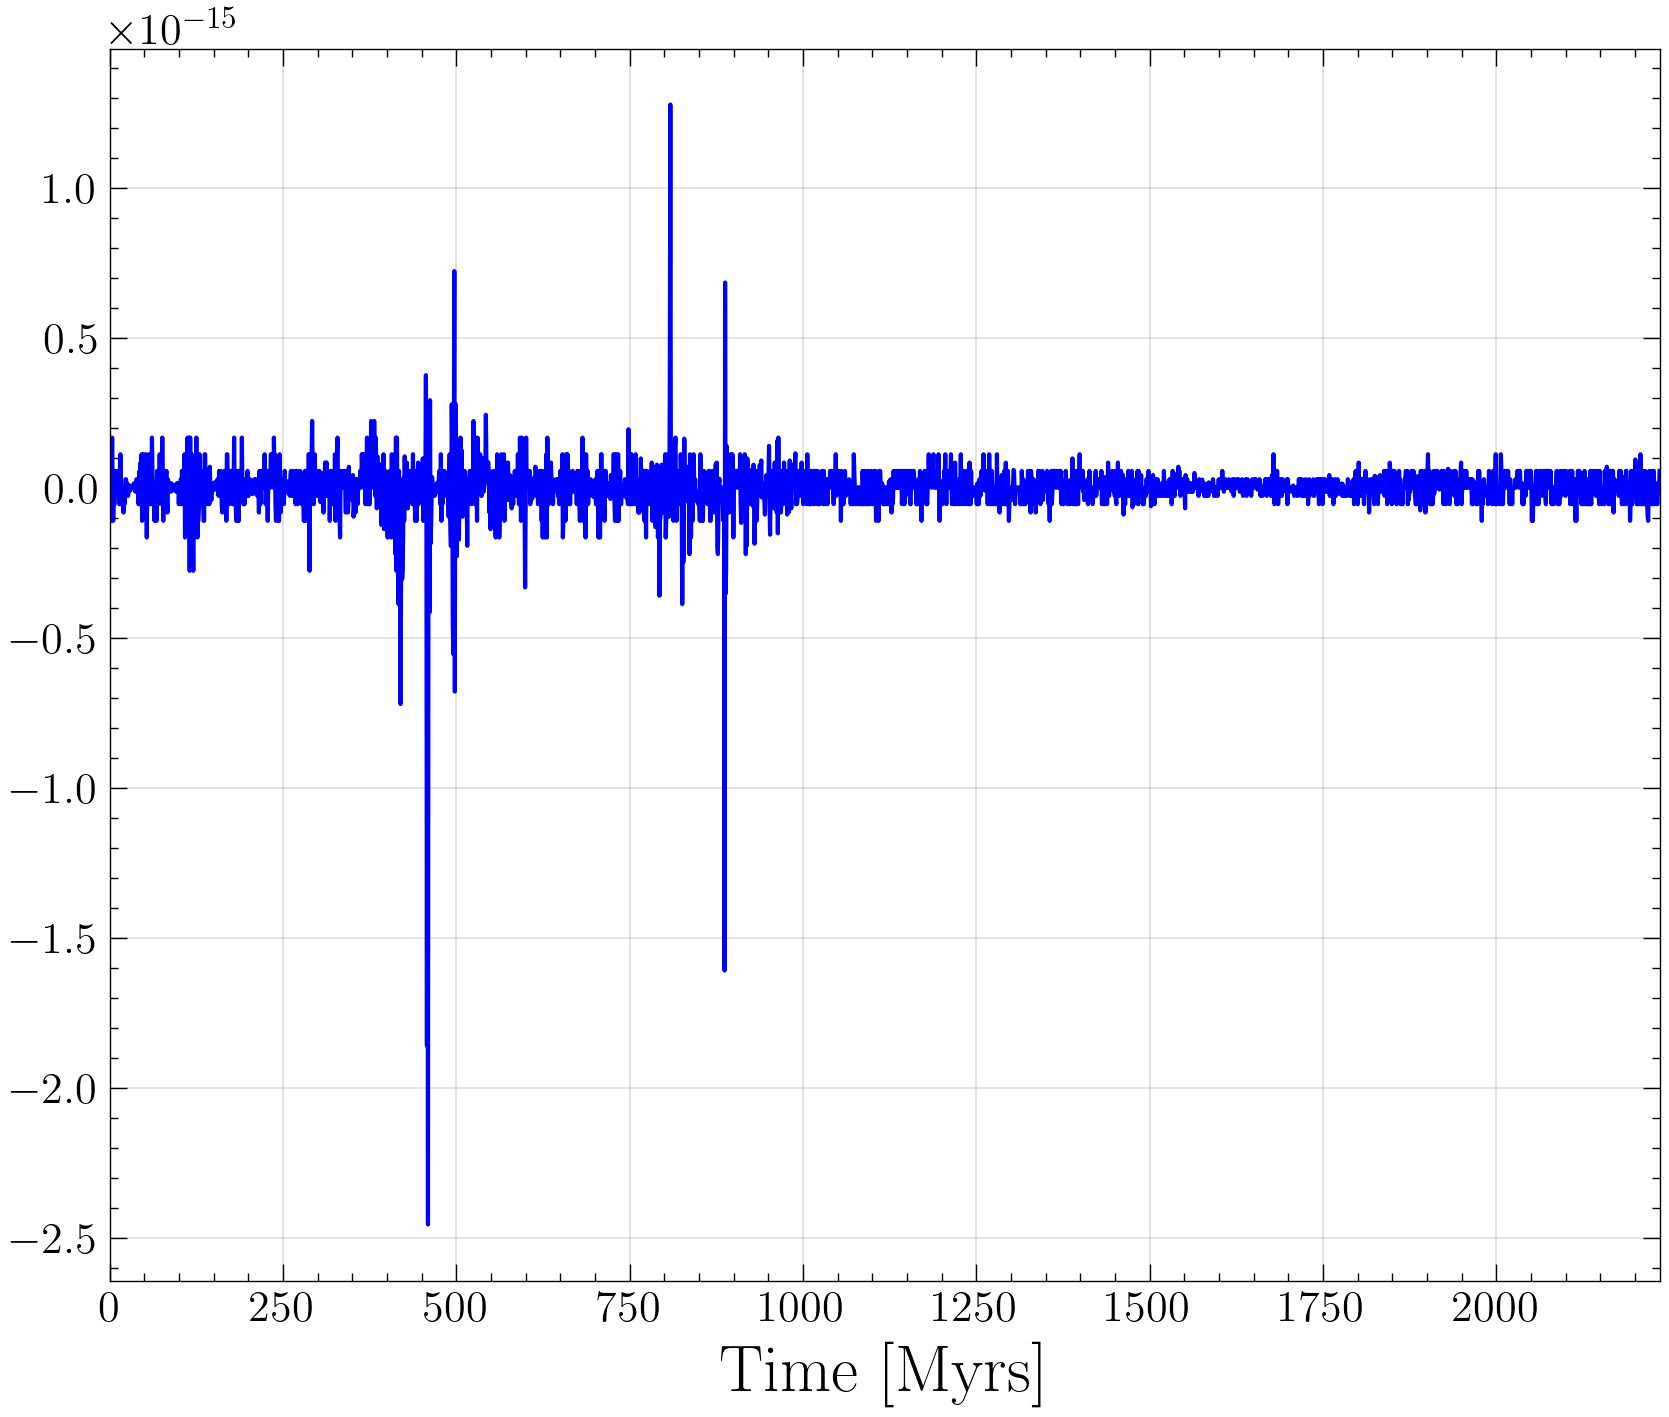

In [35]:
coplanarity = Check_Coplanarity(pos_CMbinary_mbh1, 
                                pos_CMbinary_mbh2, 
                                v_CMbinary_mbh1, 
                                v_CMbinary_mbh2)     
plt.plot(time, coplanarity, color='blue')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]');

In [36]:
angmom_CMbinary_mbh1 = np.cross(pos_CMbinary_mbh1.T, v_CMbinary_mbh1.T).T
angmom_CMbinary_mbh2 = np.cross(pos_CMbinary_mbh2.T, v_CMbinary_mbh2.T).T

angmom_binary = angmom_CMbinary_mbh1 + angmom_CMbinary_mbh2

del CMbinary_pos_vector, CMbinary_v_vector, coplanarity, angmom_CMbinary_mbh1, angmom_CMbinary_mbh2

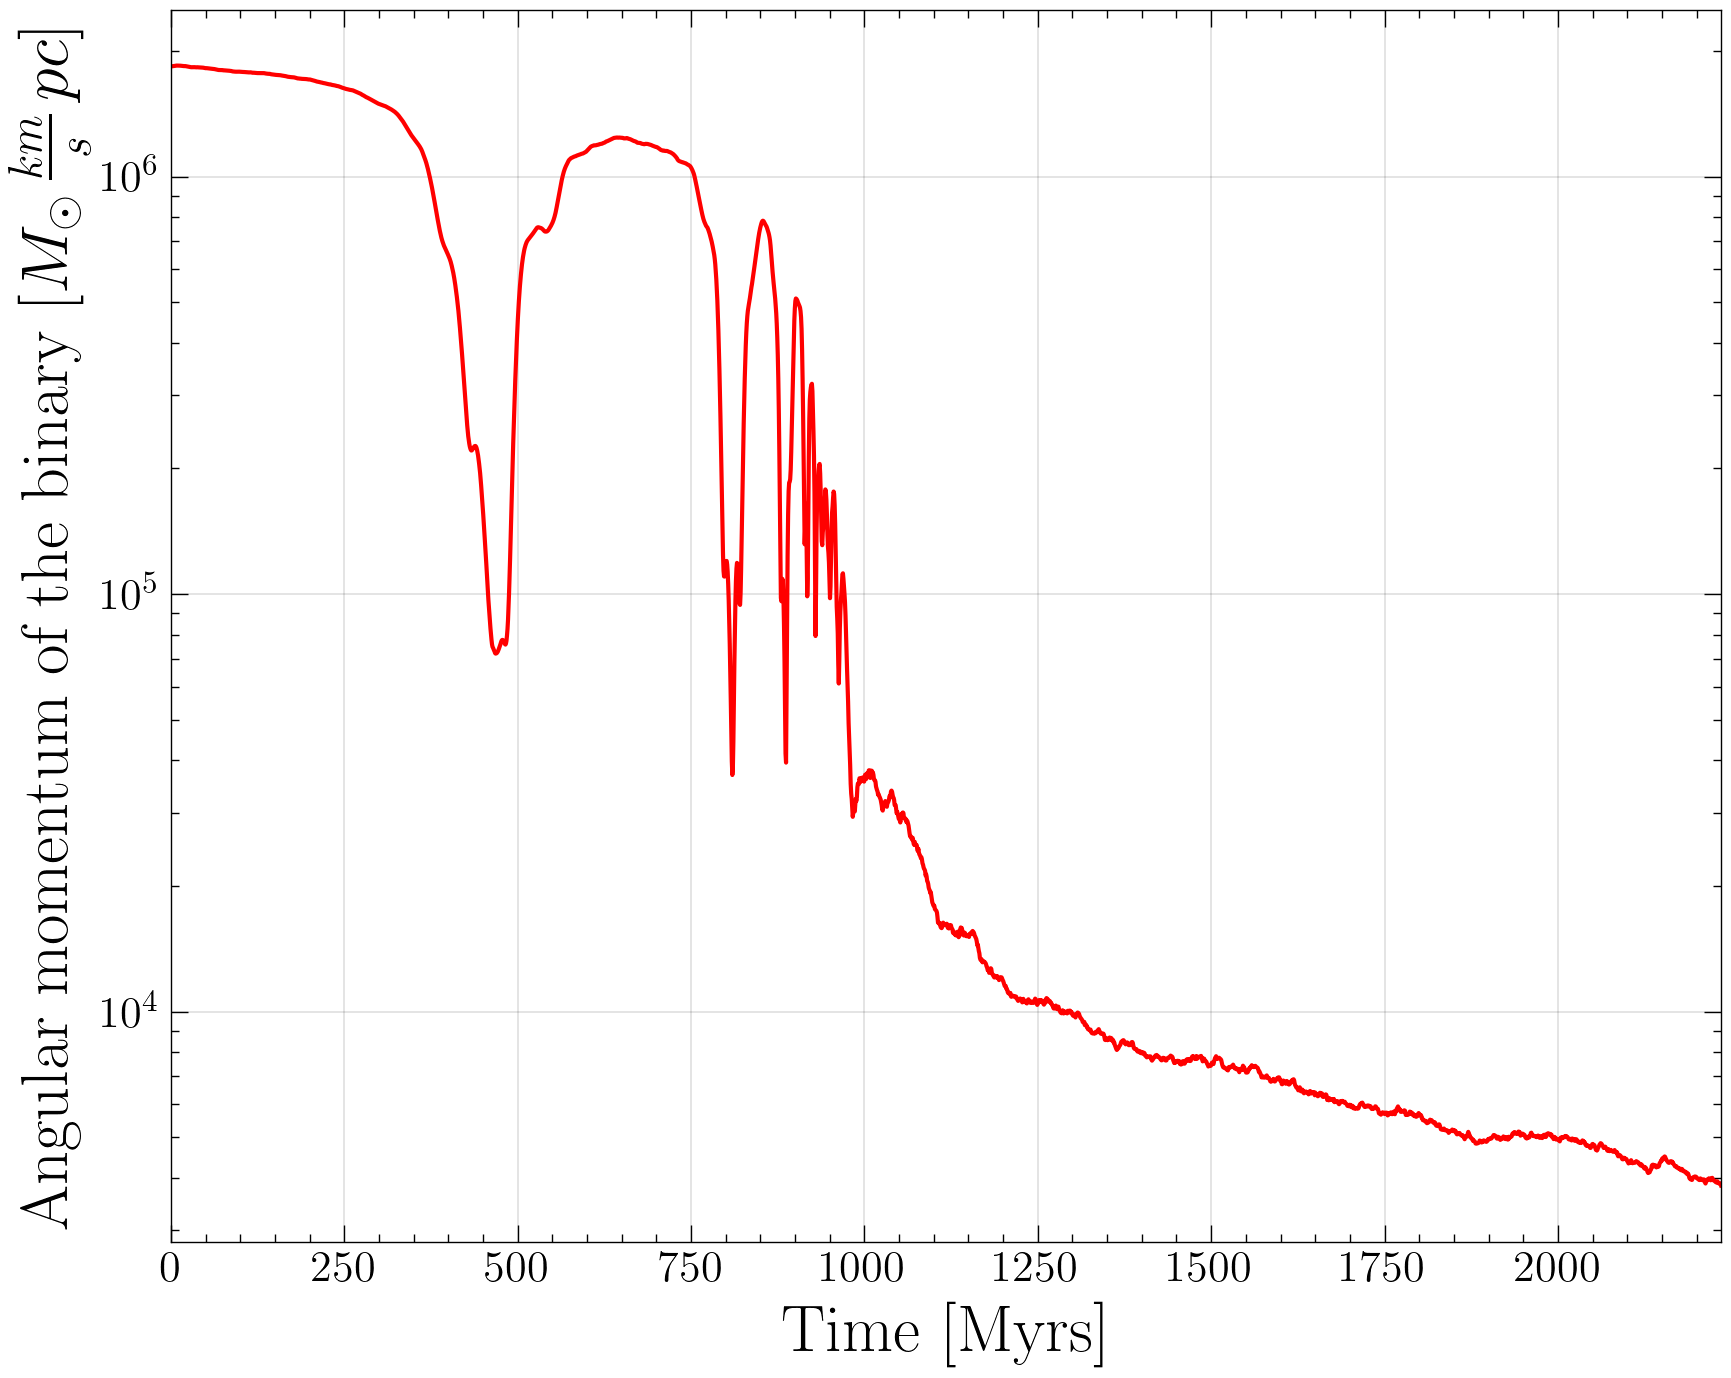

In [37]:
plt.plot(time, np.linalg.norm(angmom_binary, axis=0), color='red')
plt.xlim(0, time[-1])
plt.yscale('log')
plt.xlabel('Time [Myrs]')
plt.ylabel('Angular momentum of the binary $[M_\odot \, \\frac{km}{s} \, pc]$');

We can compute the critical radius $r_\text{crit}$ at which the energy of the binary becomes negative:

$E_\text{binary} (r_\text{crit}) \, = \, \dfrac{1}{2} M_\text{MBH} v^2_\text{MBH,1} + \dfrac{1}{2} M_\text{MBH} v^2_\text{MBH,2} - \dfrac{G M^2_\text{MBH}}{r_\text{crit}} = 0$

In [38]:
E_binary = 0.5*M_mbh*np.linalg.norm(v_CMbinary_mbh1, axis=0)**2 + 0.5*M_mbh*np.linalg.norm(v_CMbinary_mbh2, axis=0)**2 - G_pu*M_mbh**2/dist_mbhs

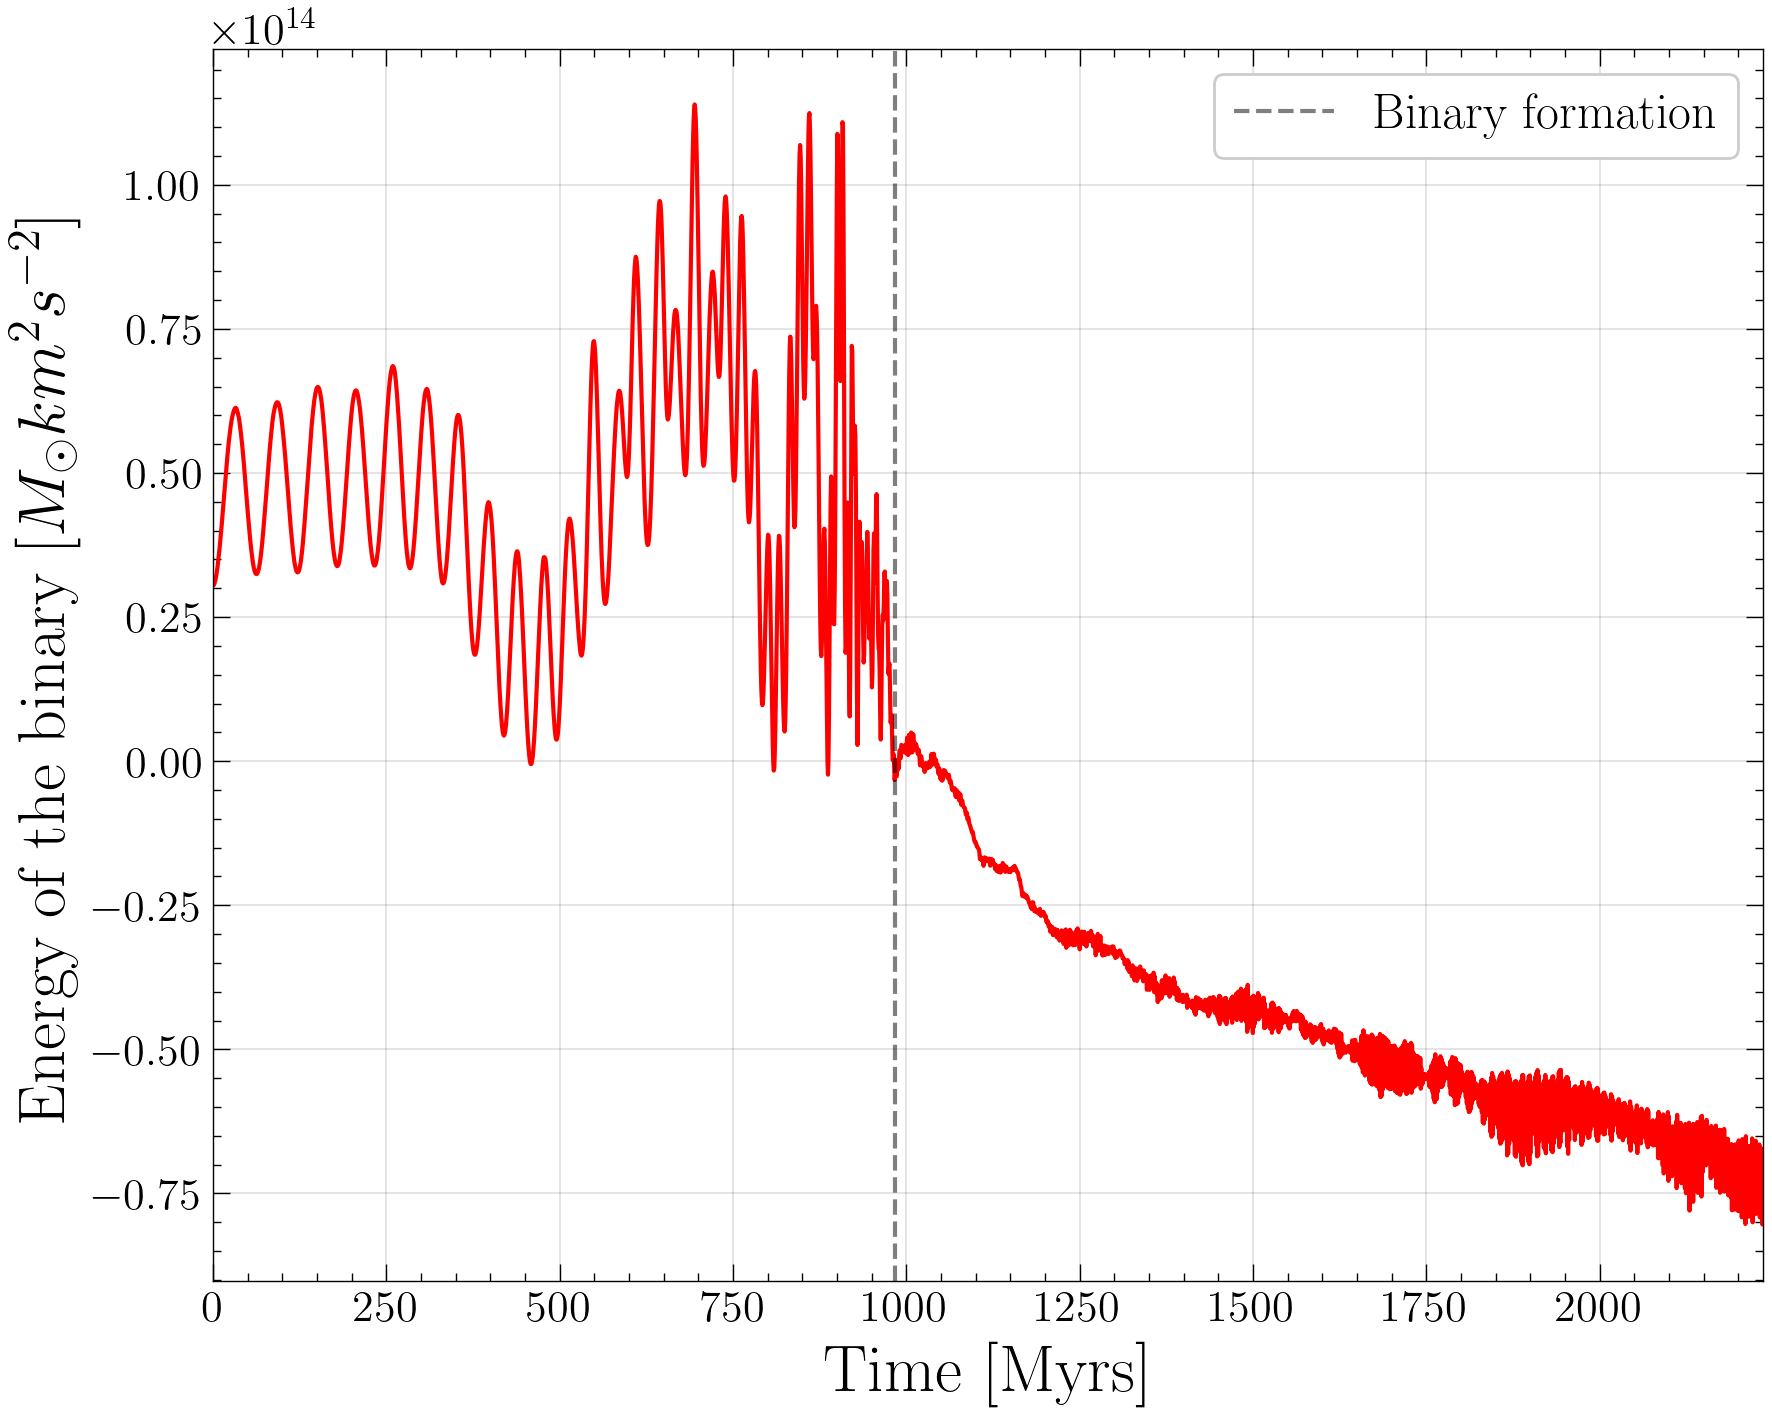

In [39]:
from scipy.interpolate import CubicSpline
from scipy.optimize import brentq

E_binary_interp = CubicSpline(time, E_binary)

time_binary_formation = brentq(lambda t: E_binary_interp(t), time[0], time[-1])
index_binary_formation = np.argmin(np.abs(time - time_binary_formation))

if name == 'RIS_50k_dt0005': index_binary_formation = 1595
elif name == 'K_50k_dt0005': index_binary_formation = 1136
elif name == 'H_50k_dt0005': index_binary_formation = 1320


plt.plot(time, E_binary, color='red')
plt.axvline(time[index_binary_formation], ls='--', color='black', alpha=0.5, label='Binary formation')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('Energy of the binary $[M_\odot km^2 s^{-2}]$')
plt.legend();

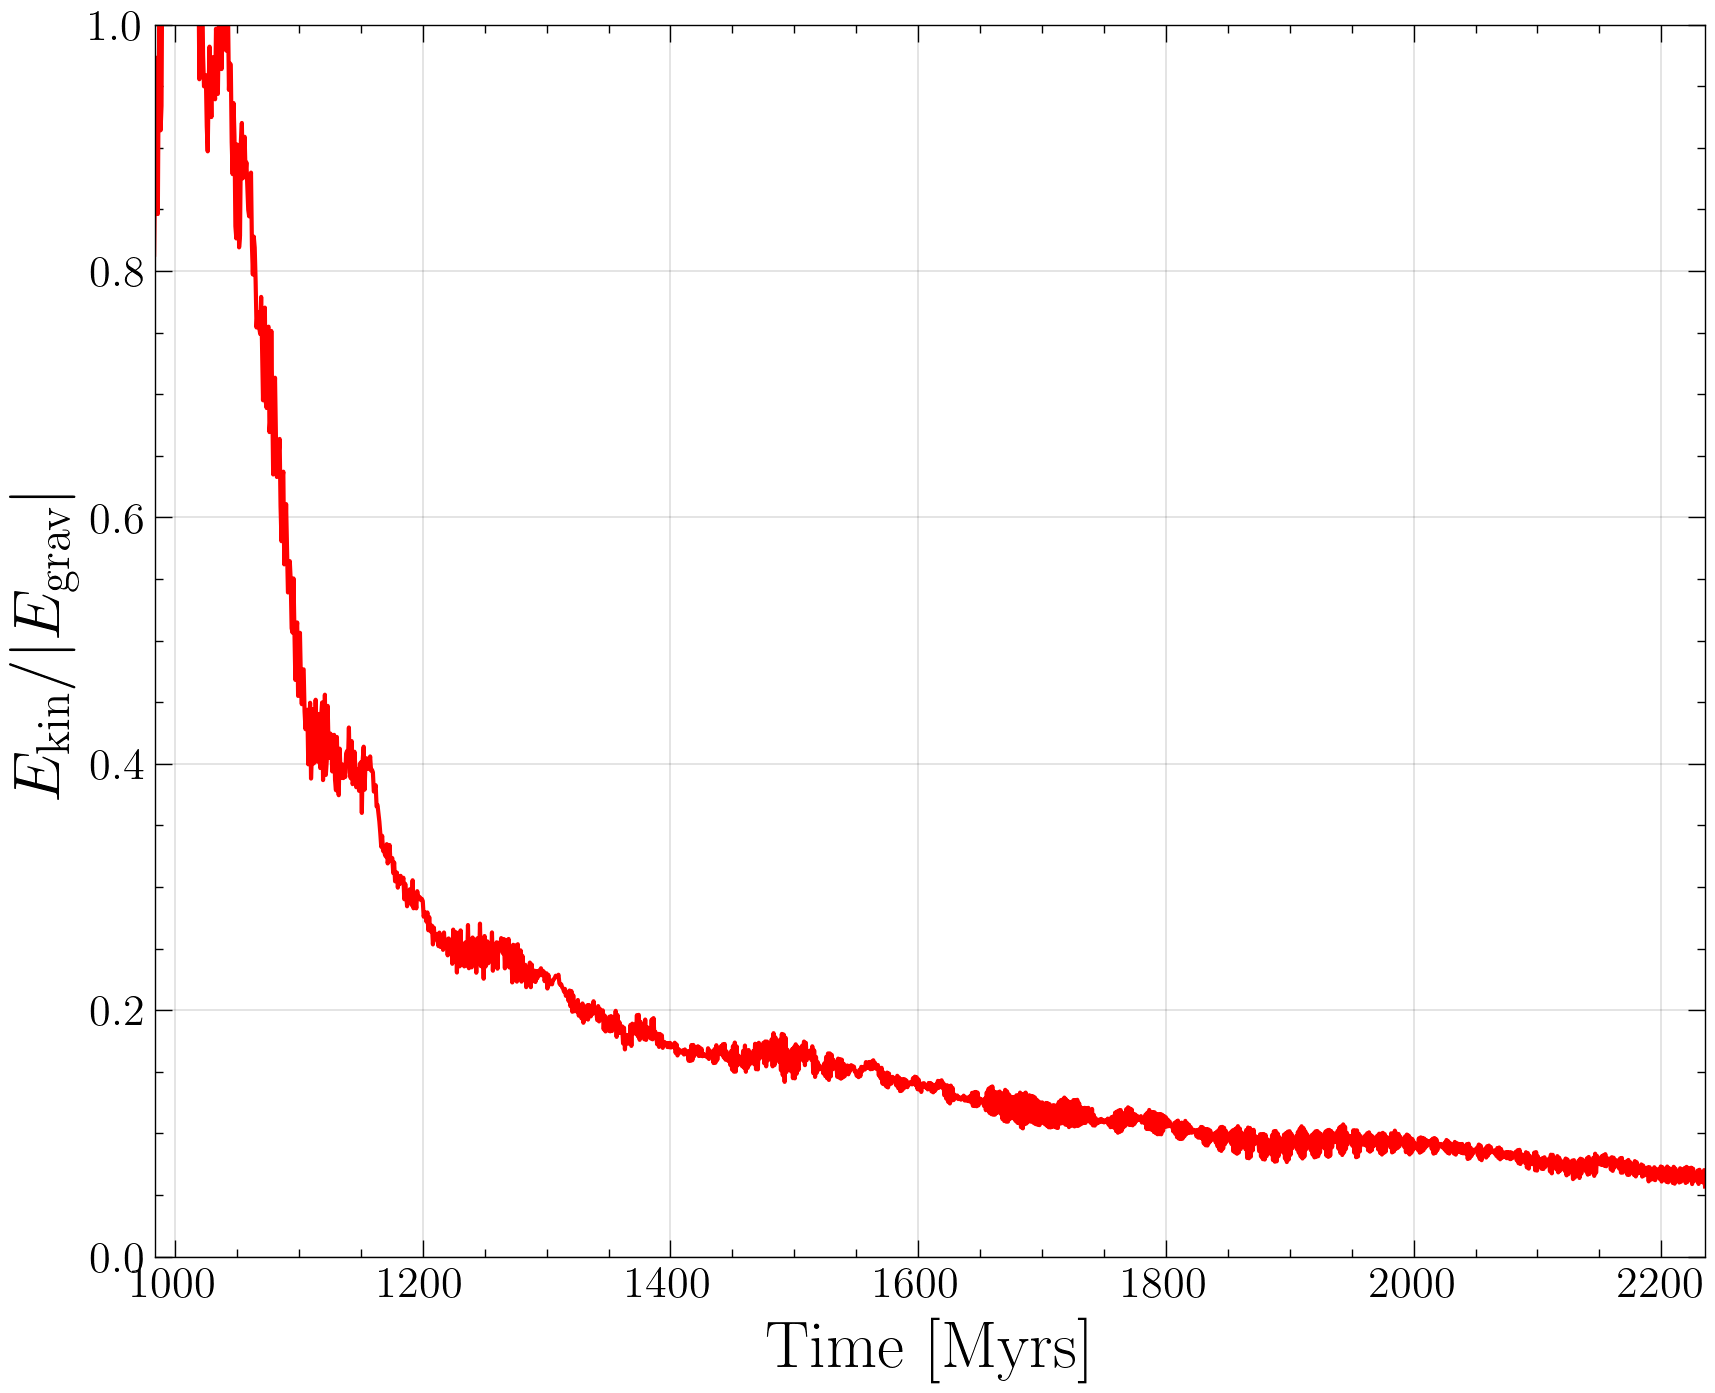

In [40]:
plt.plot(time, (0.5*M_mbh*np.linalg.norm(v_CMbinary_mbh1, axis=0)**2 + 0.5*M_mbh*np.linalg.norm(v_CMbinary_mbh2, axis=0)**2)/(G_pu*M_mbh**2/dist_mbhs), color='red')
plt.xlim(time[index_binary_formation], time[-1])
plt.ylim(0,1)
plt.xlabel('Time [Myrs]')
plt.ylabel('$E_\\text{kin}/|E_\\text{grav}|$');

In [41]:
r_crit = dist_mbhs[index_binary_formation]
print(f'The critical radius for the binary is: {r_crit:.2f} pc')

The critical radius for the binary is: 237.82 pc


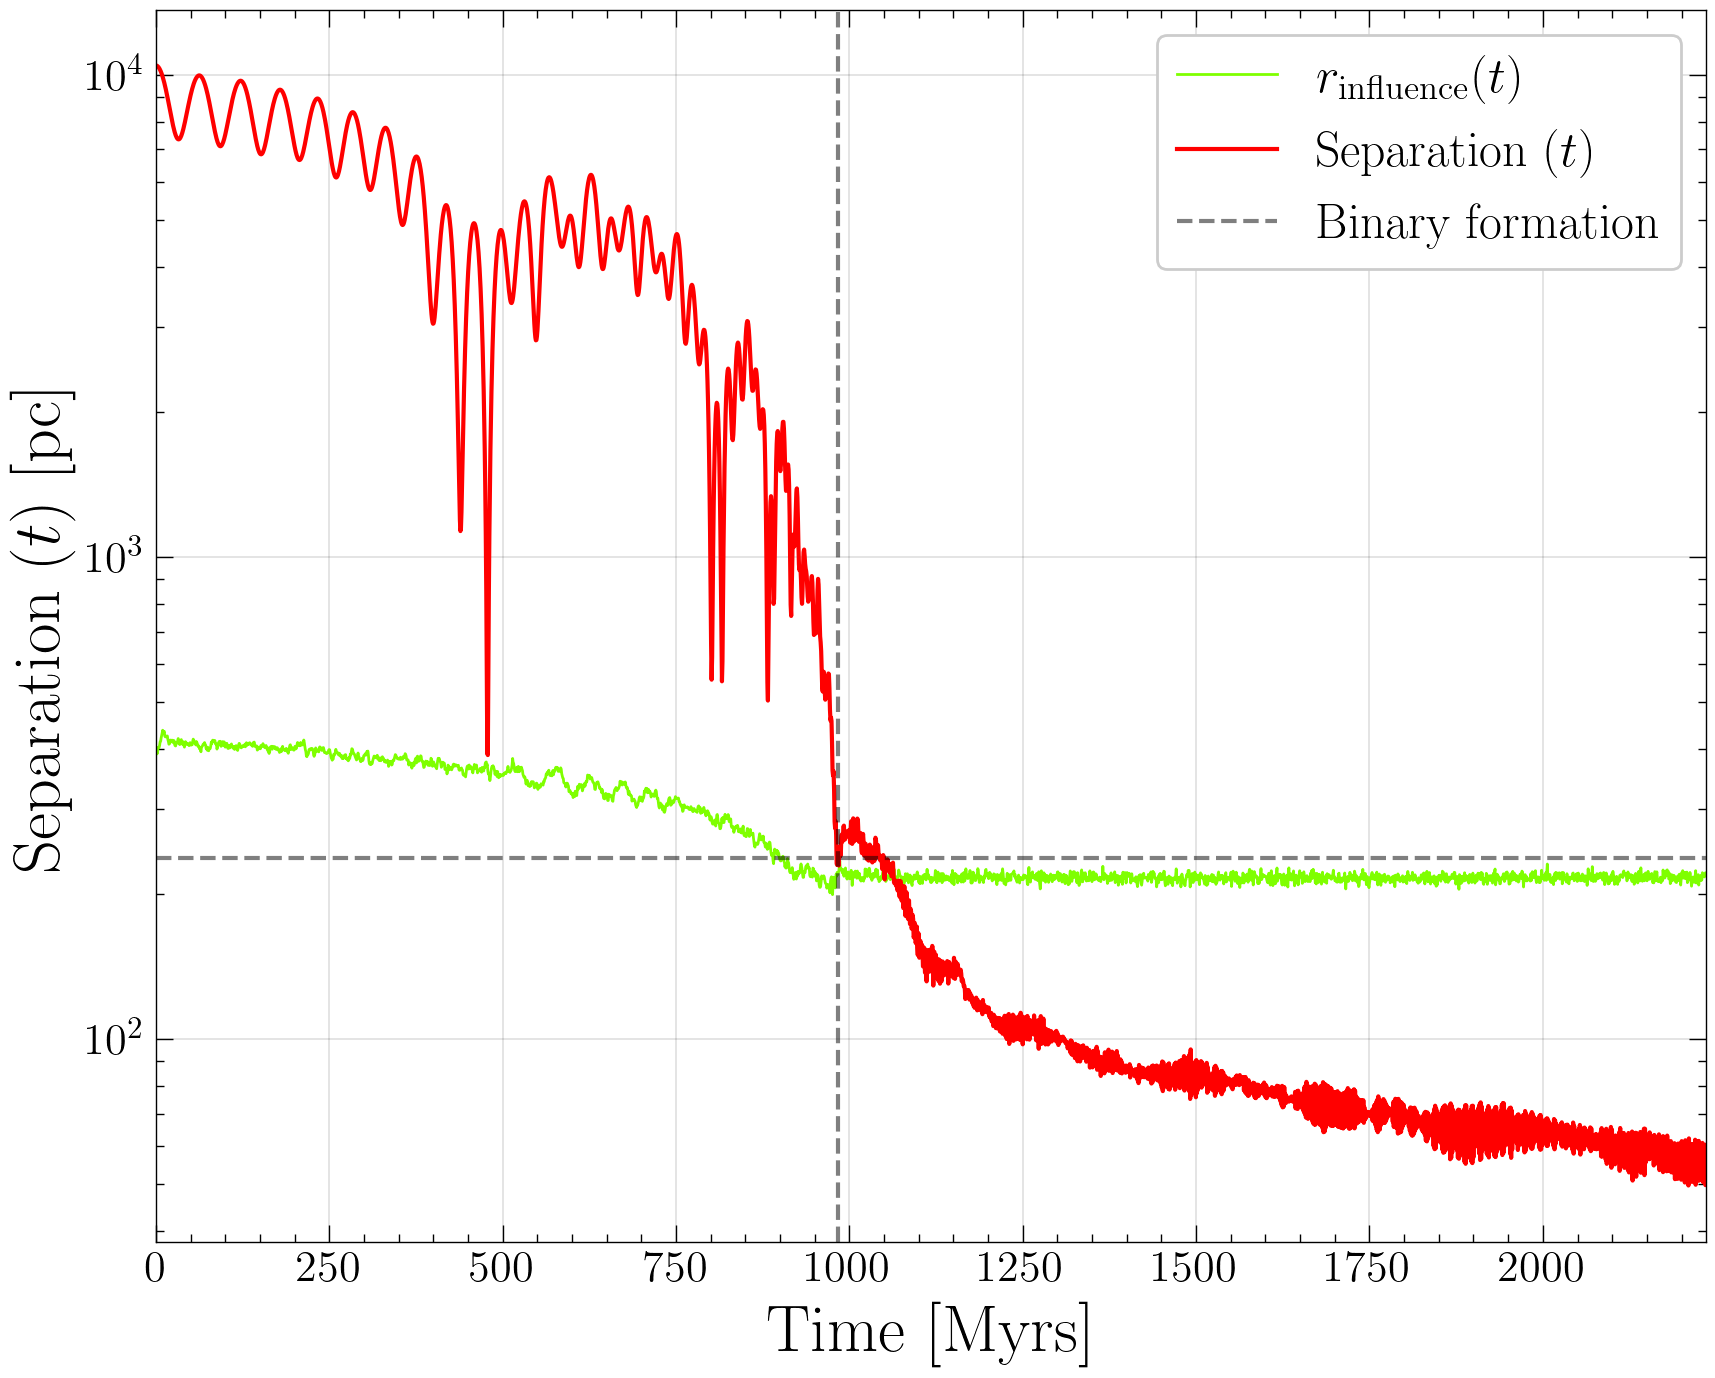

In [42]:
plt.plot(time, r_influence, color='chartreuse', lw=1, label='$r_{\\text{influence}}(t)$')
plt.plot(time, dist_mbhs, color='red', label='Separation $(t)$')
plt.axvline(time[index_binary_formation], ls='--', color='black', alpha=0.5, label='Binary formation')
plt.axhline(r_crit, ls='--', color='black', alpha=0.5)
plt.xlim(0, time[-1])
plt.yscale('log')
#plt.title('Distance of the two MBHs as a function of time')
plt.xlabel('Time [Myrs]')
plt.ylabel('Separation $(t)$ [pc]')
plt.legend();
#plt.text(-1.17, 1.6, 'Hernquist', transform=ax.transAxes, fontsize=40, verticalalignment='top');

In [43]:
def Rotate_Frame(pos_CMbinary_mbh1, pos_CMbinary_mbh2, v_CMbinary_mbh1, v_CMbinary_mbh2):
    # Define the relative position and velocity vectors
    r_rel = pos_CMbinary_mbh1 - pos_CMbinary_mbh2 # shape [3, N]      
    v_rel = v_CMbinary_mbh1 - v_CMbinary_mbh2  


    # Define the versors in the frame of the binary
    angmom_rel = np.cross(r_rel.T, v_rel.T).T
    z_BF_hat = angmom_rel/np.linalg.norm(angmom_rel, axis=0)

    x_BF_hat = np.tile(r_rel[:,0]/np.linalg.norm(r_rel[:,0], axis=0), (pos_CMbinary_mbh1.shape[1], 1)).T

    y_BF_hat = np.cross(z_BF_hat.T, x_BF_hat.T).T
    y_BF_hat = y_BF_hat/np.linalg.norm(y_BF_hat, axis=0)

    x_BF_hat = np.cross(y_BF_hat.T, z_BF_hat.T).T #re-orthogonalize x_BF_hat


    # Define the transformation matrix
    Rot = np.stack([x_BF_hat, y_BF_hat, z_BF_hat], axis=1)  # shape [3, 3, N]


    # Apply the transformation to the position and velocity vectors
    pos_BF_mbh1 = np.zeros_like(pos_CMbinary_mbh1)
    pos_BF_mbh2 = np.zeros_like(pos_CMbinary_mbh2)
    v_BF_mbh1 = np.zeros_like(v_CMbinary_mbh1)
    v_BF_mbh2 = np.zeros_like(v_CMbinary_mbh2)

    for i in range(len(time)):
        pos_BF_mbh1[:, i] = Rot[:, :, i].T @ pos_CMbinary_mbh1[:, i]
        pos_BF_mbh2[:, i] = Rot[:, :, i].T @ pos_CMbinary_mbh2[:, i]
        v_BF_mbh1[:, i] = Rot[:, :, i].T @ v_CMbinary_mbh1[:, i]
        v_BF_mbh2[:, i] = Rot[:, :, i].T @ v_CMbinary_mbh2[:, i]
        
    return pos_BF_mbh1, pos_BF_mbh2, v_BF_mbh1, v_BF_mbh2

pos_BF_mbh1, pos_BF_mbh2, v_BF_mbh1, v_BF_mbh2 = Rotate_Frame(pos_CMbinary_mbh1, pos_CMbinary_mbh2, v_CMbinary_mbh1, v_CMbinary_mbh2)

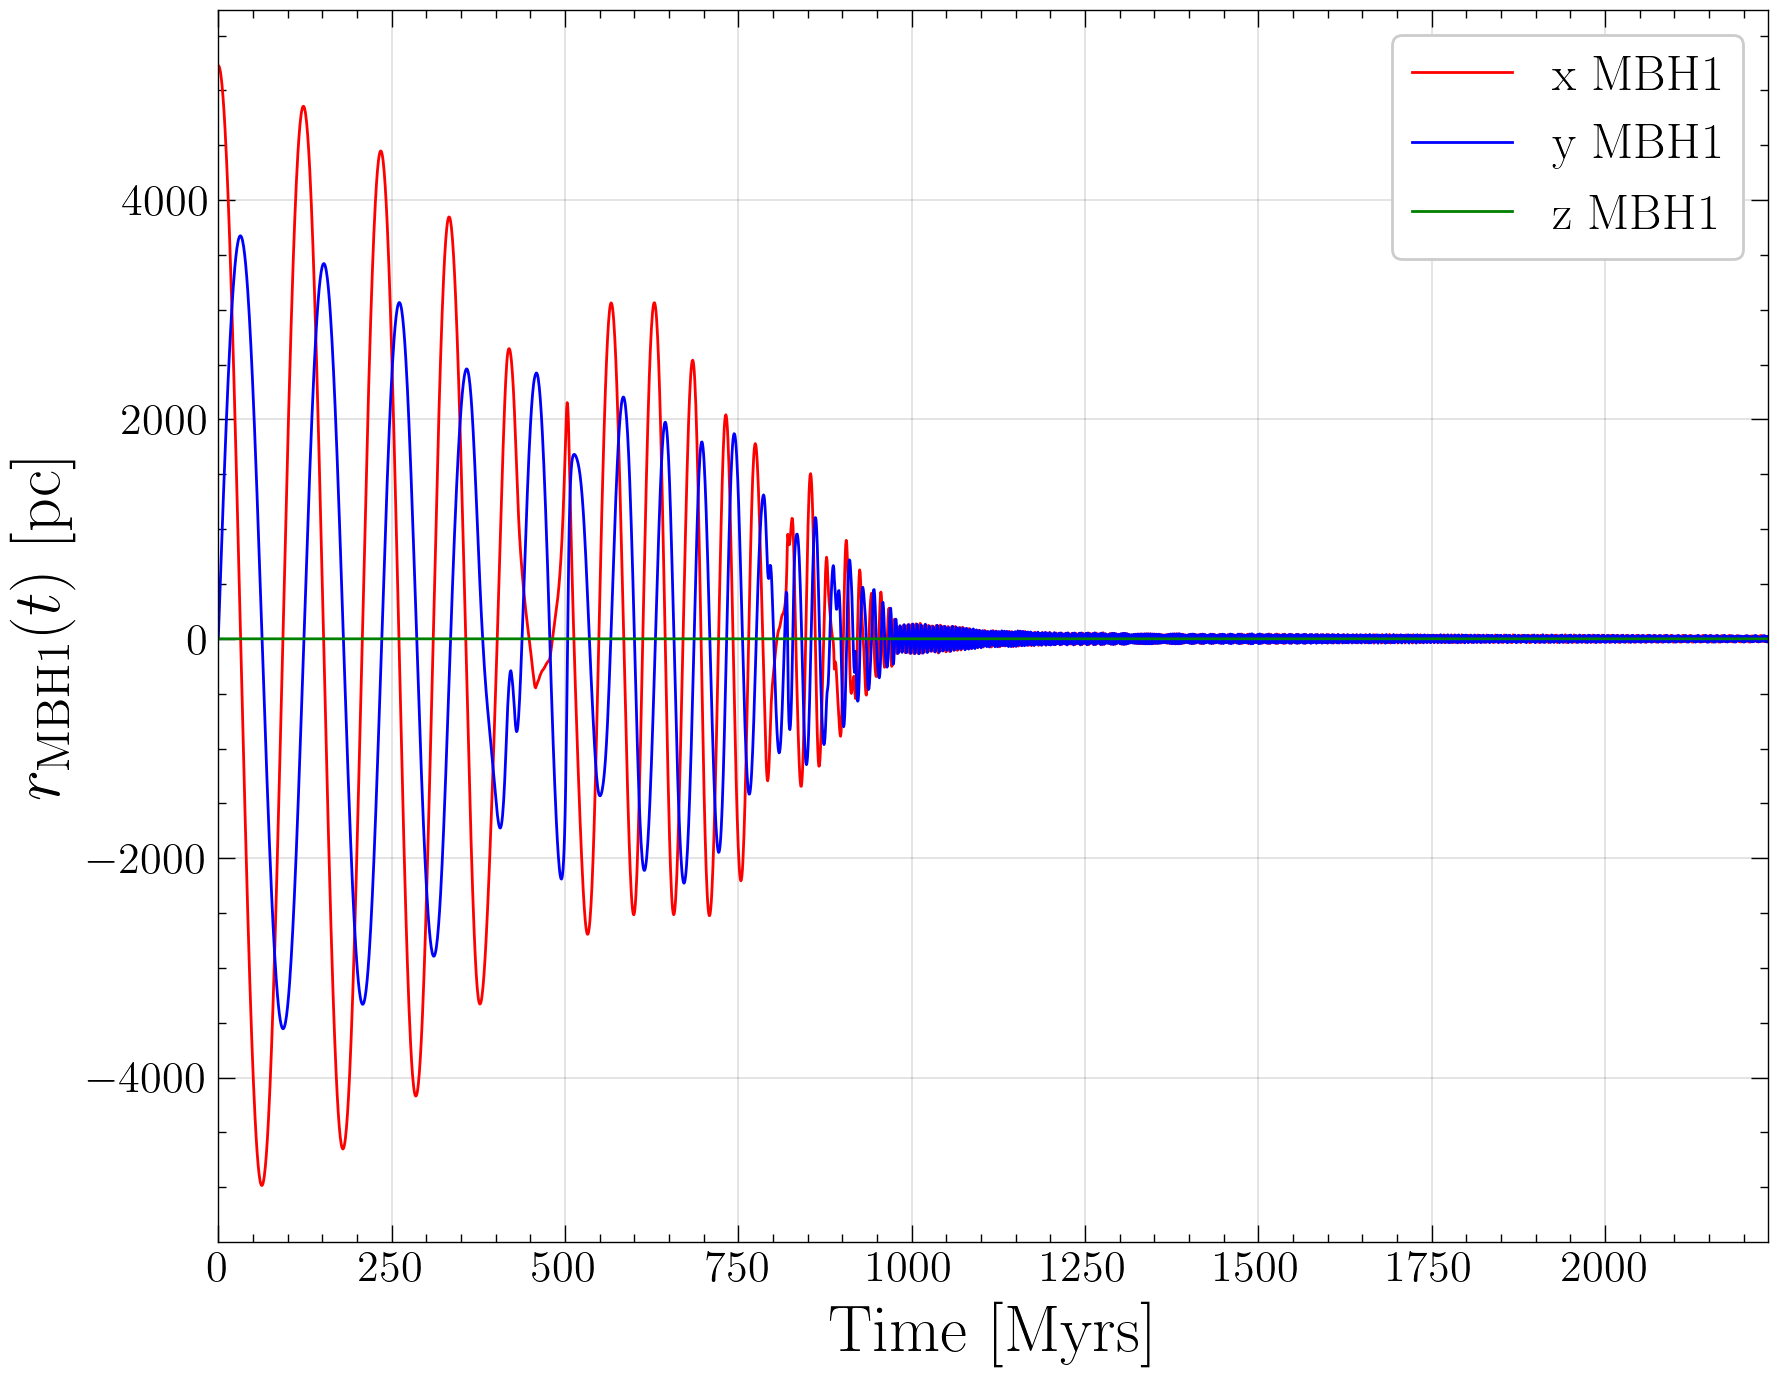

In [44]:
plt.plot(time, pos_BF_mbh1[0], color='red', lw=1, label='x MBH1')
plt.plot(time, pos_BF_mbh1[1], color='blue', lw=1, label='y MBH1')
plt.plot(time, pos_BF_mbh1[2], color='green', lw=1, label='z MBH1')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('$r_{\\rm{MBH1}} (t)$ [pc]')
plt.legend();

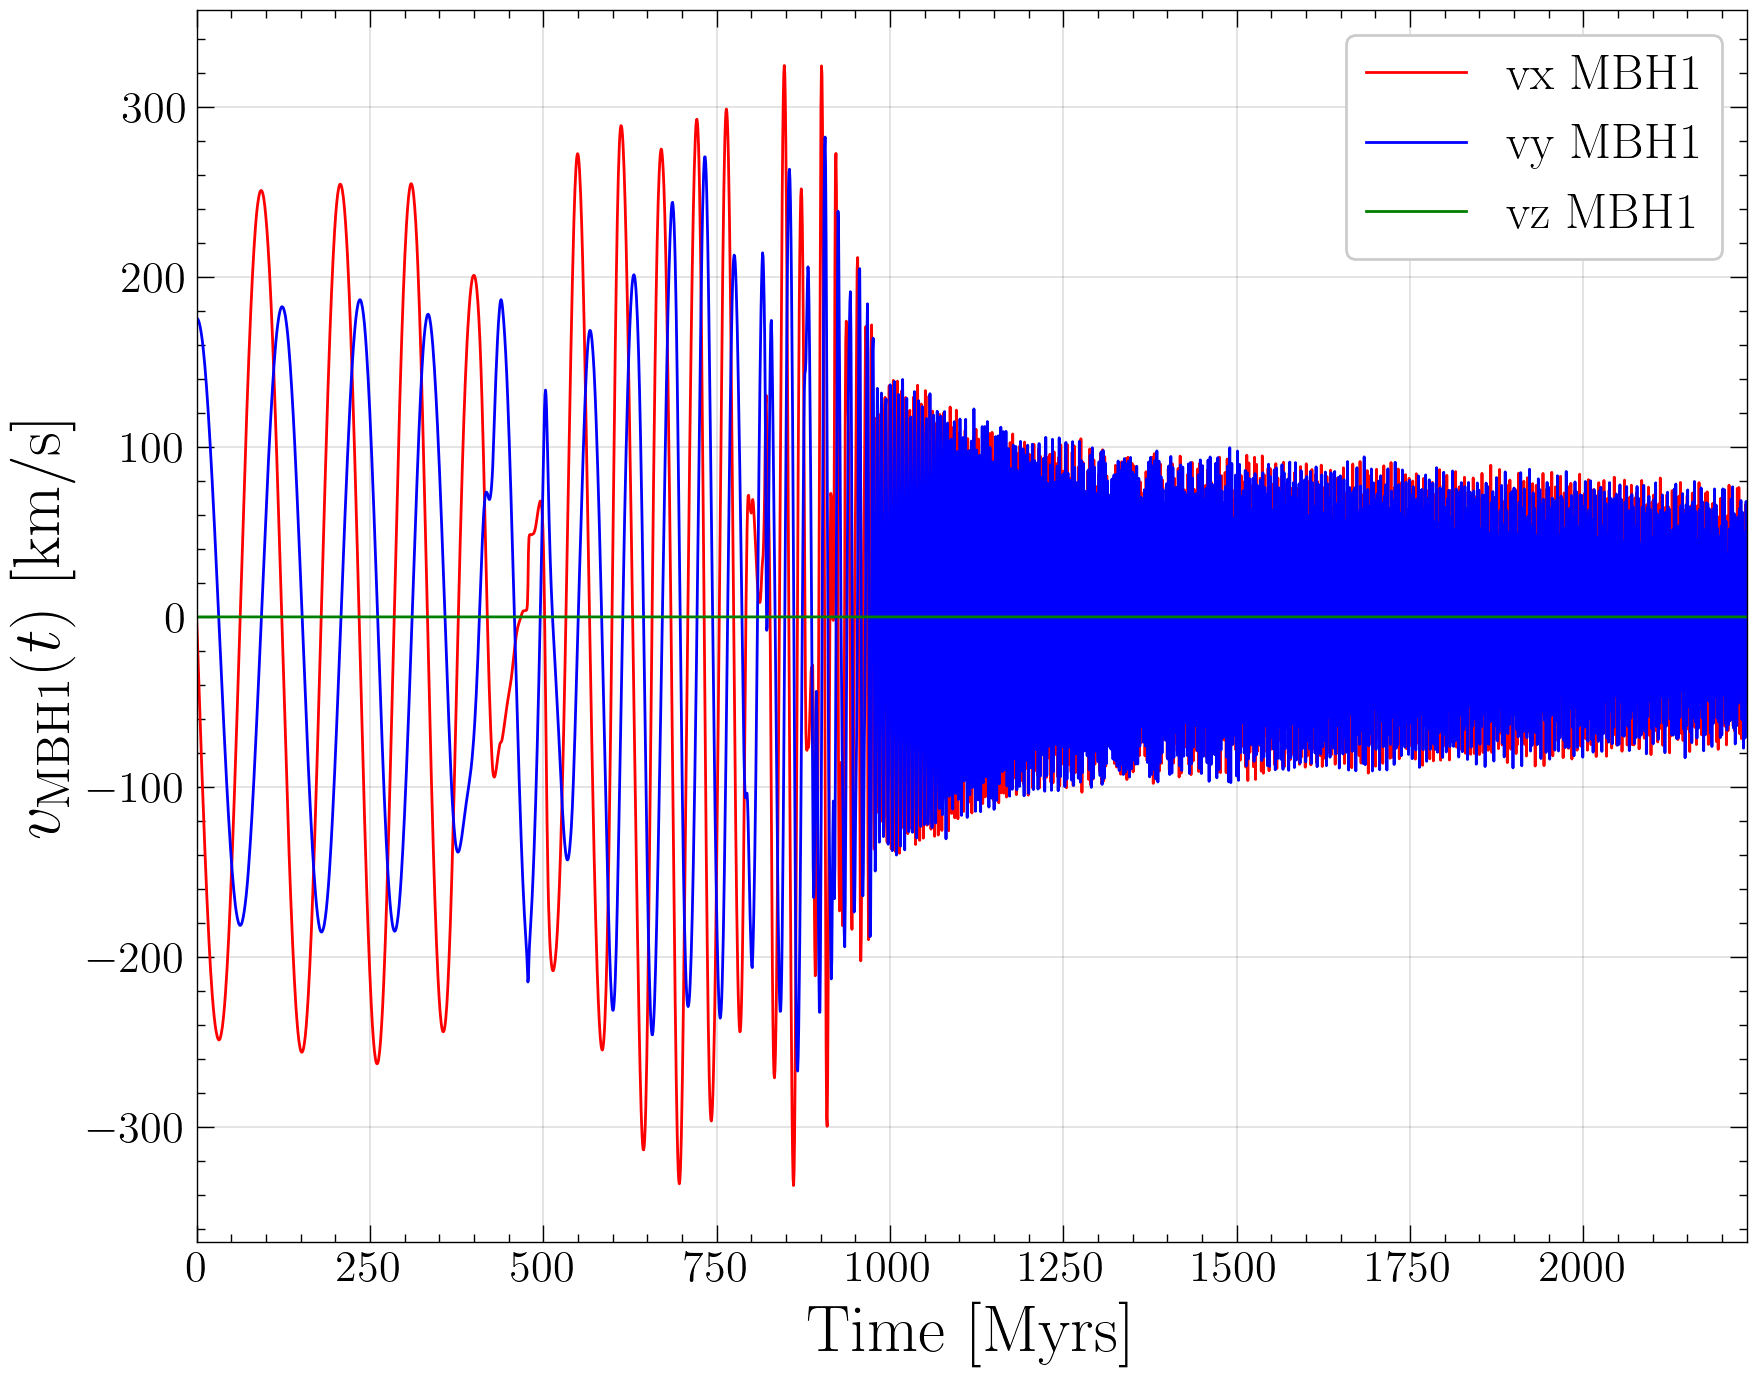

In [45]:
plt.plot(time, v_BF_mbh1[0], color='red', lw=1, label='vx MBH1')
plt.plot(time, v_BF_mbh1[1], color='blue', lw=1, label='vy MBH1')
plt.plot(time, v_BF_mbh1[2], color='green', lw=1, label='vz MBH1')
plt.xlim(0, time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('$v_{\\rm{MBH1}} (t)$ [km/s]')
plt.legend();

Now, we want to define the Laplace-Runge-Lenz (LRL) vector, which is aligned to the major axis

$\vec{LRL} = \vec{v_\text{rel}} \times \vec{L_\text{rel}} - GM \dfrac{\vec{r_\text{rel}}}{|\vec{r_\text{rel}}|}$

In [46]:
#LRL = np.cross(v_rel.T, angmom_rel.T).T - (M_mbh+M_mbh) * (r_rel / np.linalg.norm(r_rel, axis=0))
#
## x_BF is the normalized LRL vector (major axis)
#x_BF_hat = LRL / np.linalg.norm(LRL, axis=0)
#
## y_BF is perpendicular to both z and x (minor axis)
#y_BF_hat = np.cross(z_BF_hat.T, x_BF_hat.T).T
#y_BF_hat = y_BF_hat / np.linalg.norm(y_BF_hat, axis=0)
#
## Re-orthogonalize x_BF just to be safe
#x_BF_hat = np.cross(y_BF_hat.T, z_BF_hat.T).T
#
## Stack rotation matrix
#Rot = np.stack([x_BF_hat, y_BF_hat, z_BF_hat], axis=1)  # shape [3, 3, N]
#
## Apply transformation
#for i in range(len(time)):
#    pos_BF_mbh1[:, i] = Rot[:, :, i].T @ pos_CMbinary_mbh1[:, i]
#    pos_BF_mbh2[:, i] = Rot[:, :, i].T @ pos_CMbinary_mbh2[:, i]
#    v_BF_mbh1[:, i] = Rot[:, :, i].T @ v_CMbinary_mbh1[:, i]
#    v_BF_mbh2[:, i] = Rot[:, :, i].T @ v_CMbinary_mbh2[:, i]
#    
#    
#plt.plot(time, pos_BF_mbh1[0], color='red', lw=1, label='x MBH1')
#plt.plot(time, pos_BF_mbh1[1], color='blue', lw=1, label='y MBH1')
#plt.plot(time, pos_BF_mbh1[2], color='green', lw=1, label='z MBH1')
#plt.xlim(time[4000], time[4100])
#plt.ylim(-0.01, 0.001)
#plt.legend();

# Dynamical friction formula (only for Singular Isothermal Sphere)

In general, dynamical friction produces an acceleration that is given by Chandrasekhar's formula:

$$\dfrac{d\vec{v}_M}{dt} \, = \, -16 \pi^2 G^2 m \left(m+M\right) \ln \Lambda \left[\int^{v_M}_0 f(v_m) v_m^2 dv_m\right] \dfrac{\vec{v}_M}{v_M^3} \:\:,$$ 
where $M$ stands for the perturber and $m$ for a general background particle.\
$\ln \Lambda$ is a number called "Coulomb logarithm" and it can be safely approximated with $\approx 5-10$.

In the particular case of a singular isothermal sphere, this expression can be greatly simplified:

$$\dfrac{d\vec{v}_M}{dt} \, \simeq \, -0.428 \times 2 \pi G^2 n m M \ln \Lambda \dfrac{\hat{v}_M}{\sigma^2} \:\:,$$
where $n$ is the number density of particles around the perturber.

## Acceleration computed from the data

In [47]:
v_mbh1_vector = np.array([vx[-1], vy[-1], vz[-1]])
v_mbh2_vector = np.array([vx[-2], vy[-2], vz[-2]])

a_mbh1_vector = np.diff(v_mbh1_vector)/np.diff(time)
a_mbh1_vector = np.hstack([a_mbh1_vector, np.array([a_mbh1_vector[:,-1]]).T]) # to have the same length as time

a_mbh2_vector = np.diff(v_mbh2_vector)/np.diff(time)
a_mbh2_vector = np.hstack([a_mbh2_vector, np.array([a_mbh2_vector[:,-1]]).T])


#a_mbh1_vector = np.diff(v_mbh1_vector)/np.diff(time)                            # a[0] is a(t=dt/2)
#a_mbh1_vector = 0.5 * (a_mbh1_vector[:,1:] + a_mbh1_vector[:,:-1])              # a[0] is a(t=dt)
#a_mbh1_vector = np.hstack([np.array([a_mbh1_vector[:,0]]).T, a_mbh1_vector])    # a[0] is a(t=0), a[1] is a(t=dt)
#a_mbh1_vector = np.hstack([a_mbh1_vector, np.array([a_mbh1_vector[:,-1]]).T])   # make it the same length as time
#
#a_mbh2_vector = np.diff(v_mbh2_vector)/np.diff(time)                            # a[0] is a(t=dt/2)
#a_mbh2_vector = 0.5 * (a_mbh2_vector[:,1:] + a_mbh2_vector[:,:-1])              # a[0] is a(t=dt)
#a_mbh2_vector = np.hstack([np.array([a_mbh2_vector[:,0]]).T, a_mbh2_vector])    # a[0] is a(t=0), a[1] is a(t=dt)
#a_mbh2_vector = np.hstack([a_mbh2_vector, np.array([a_mbh2_vector[:,-1]]).T])   # make it the same length as time

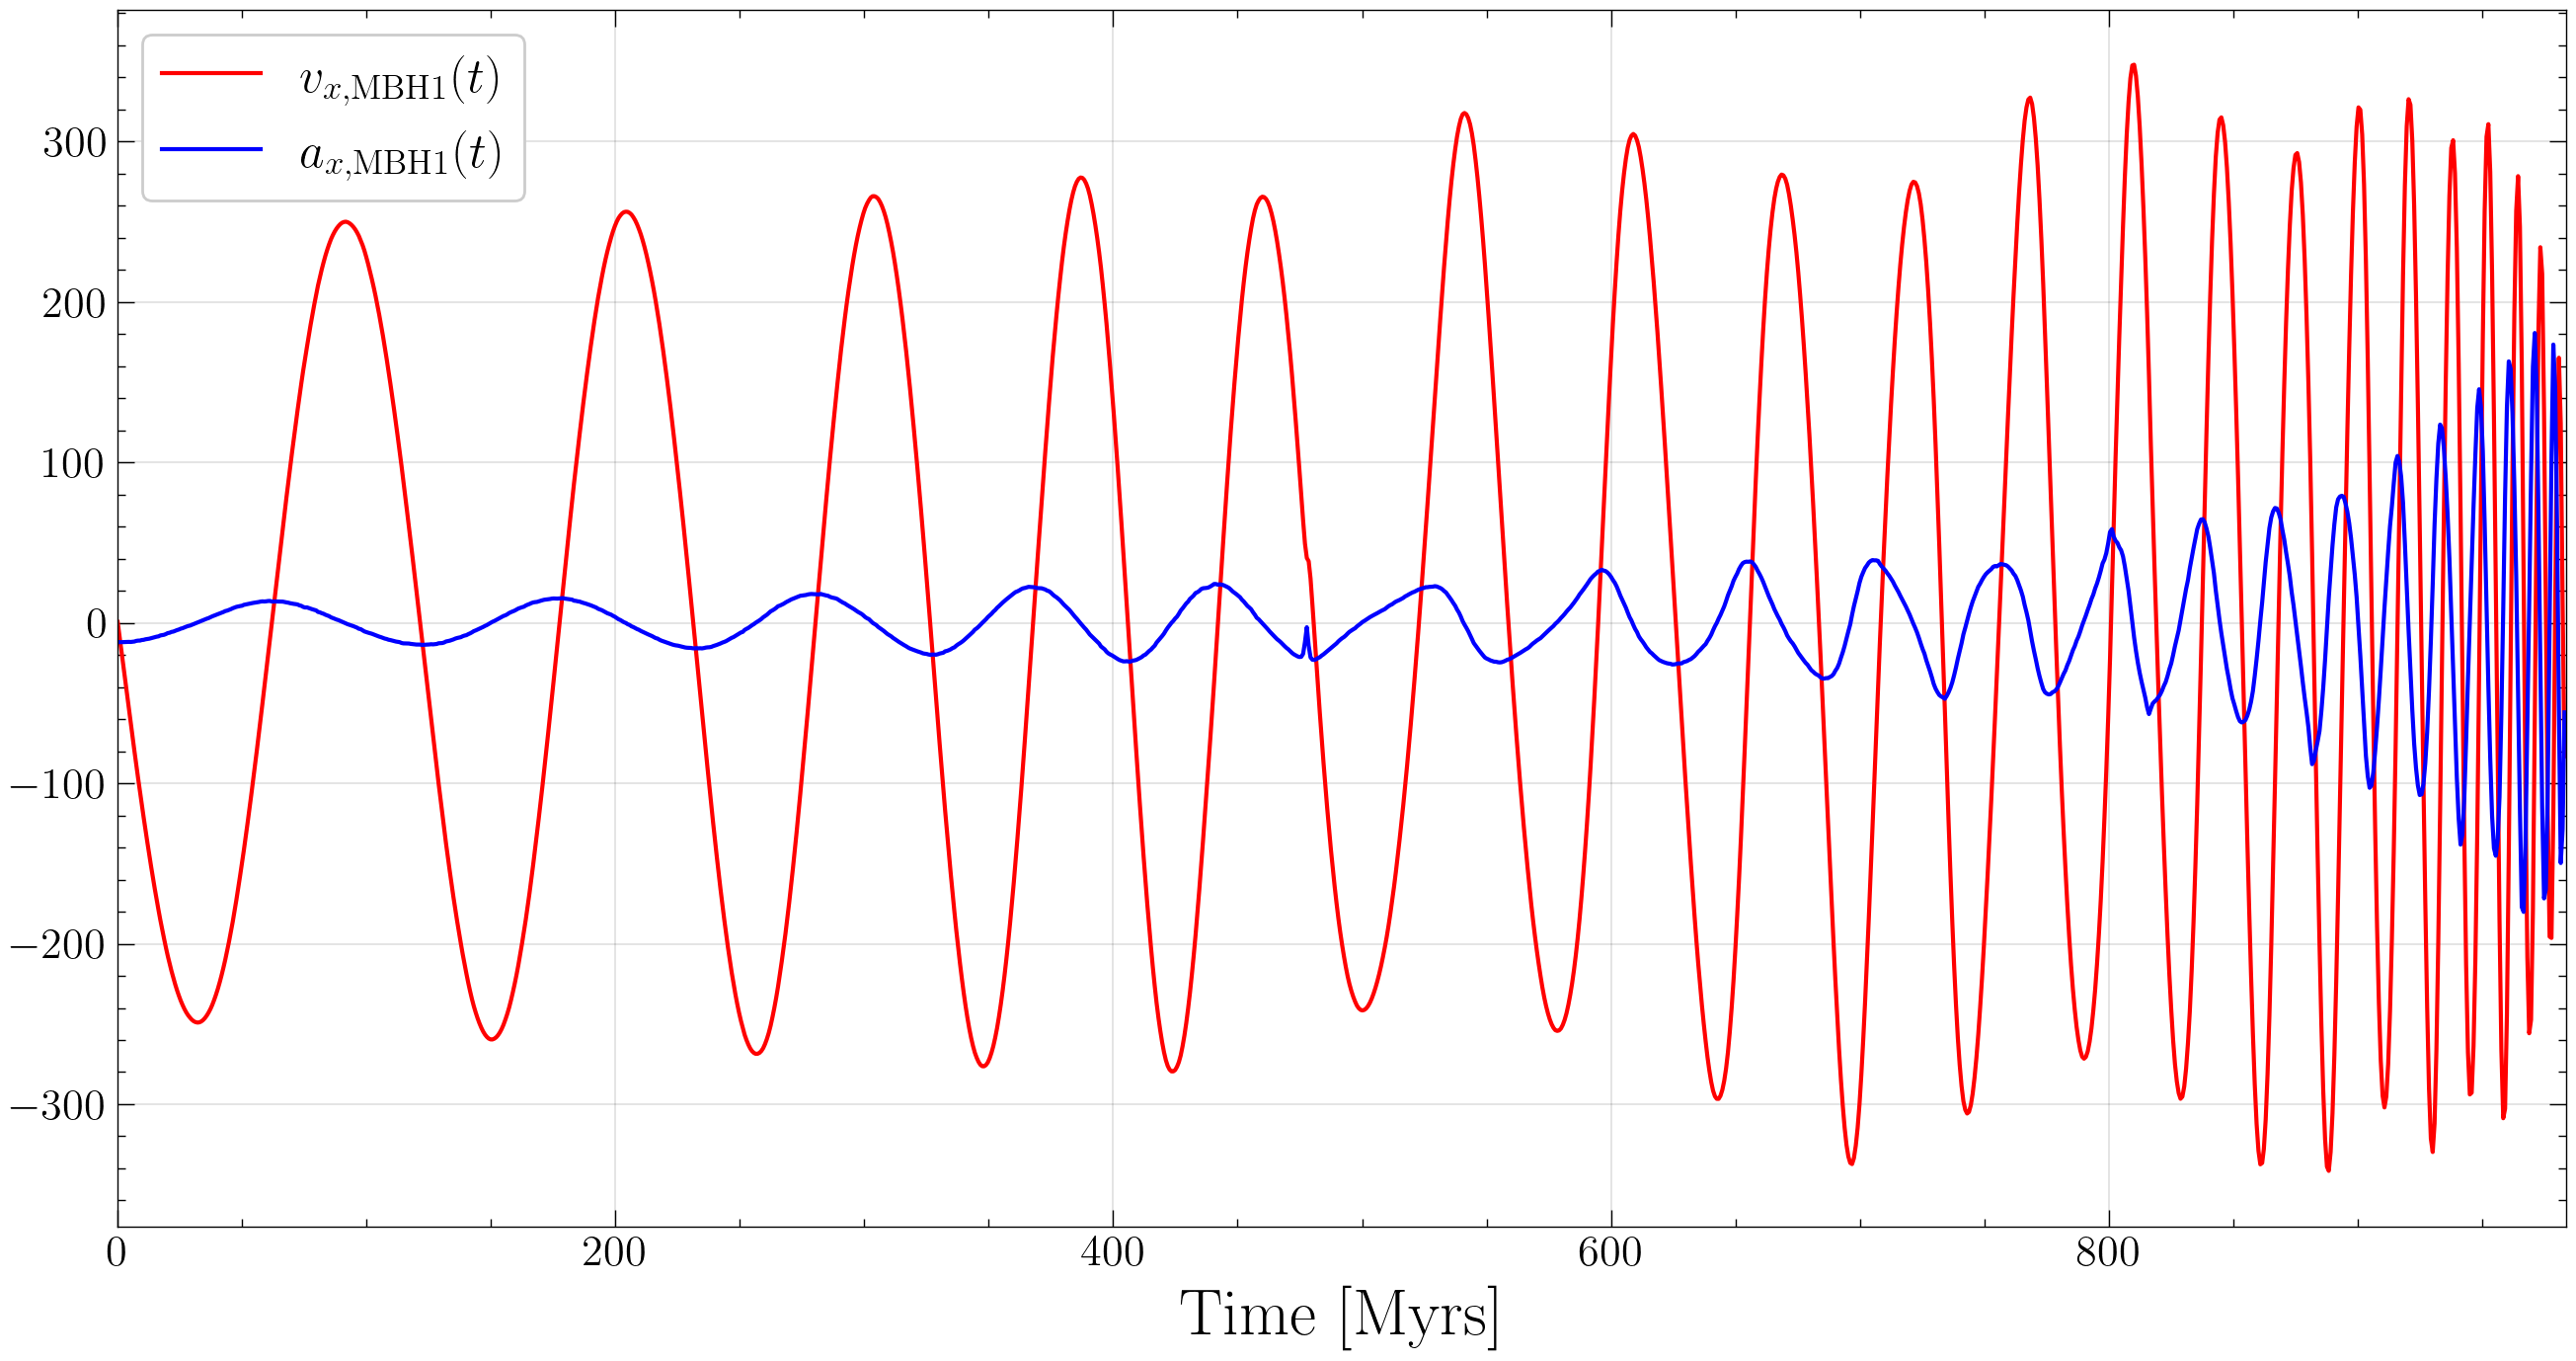

In [48]:
plt.figure(figsize=(16, 8))
plt.plot(time[:index_binary_formation], v_mbh1_vector[0,:index_binary_formation], color='red', label='$v_{x,\\rm{MBH1}}(t)$')
plt.plot(time[:index_binary_formation], a_mbh1_vector[0,:index_binary_formation], color='blue', label='$a_{x,\\rm{MBH1}}(t)$')
plt.xlim(0, time[index_binary_formation])
plt.xlabel('Time [Myrs]')
plt.legend();

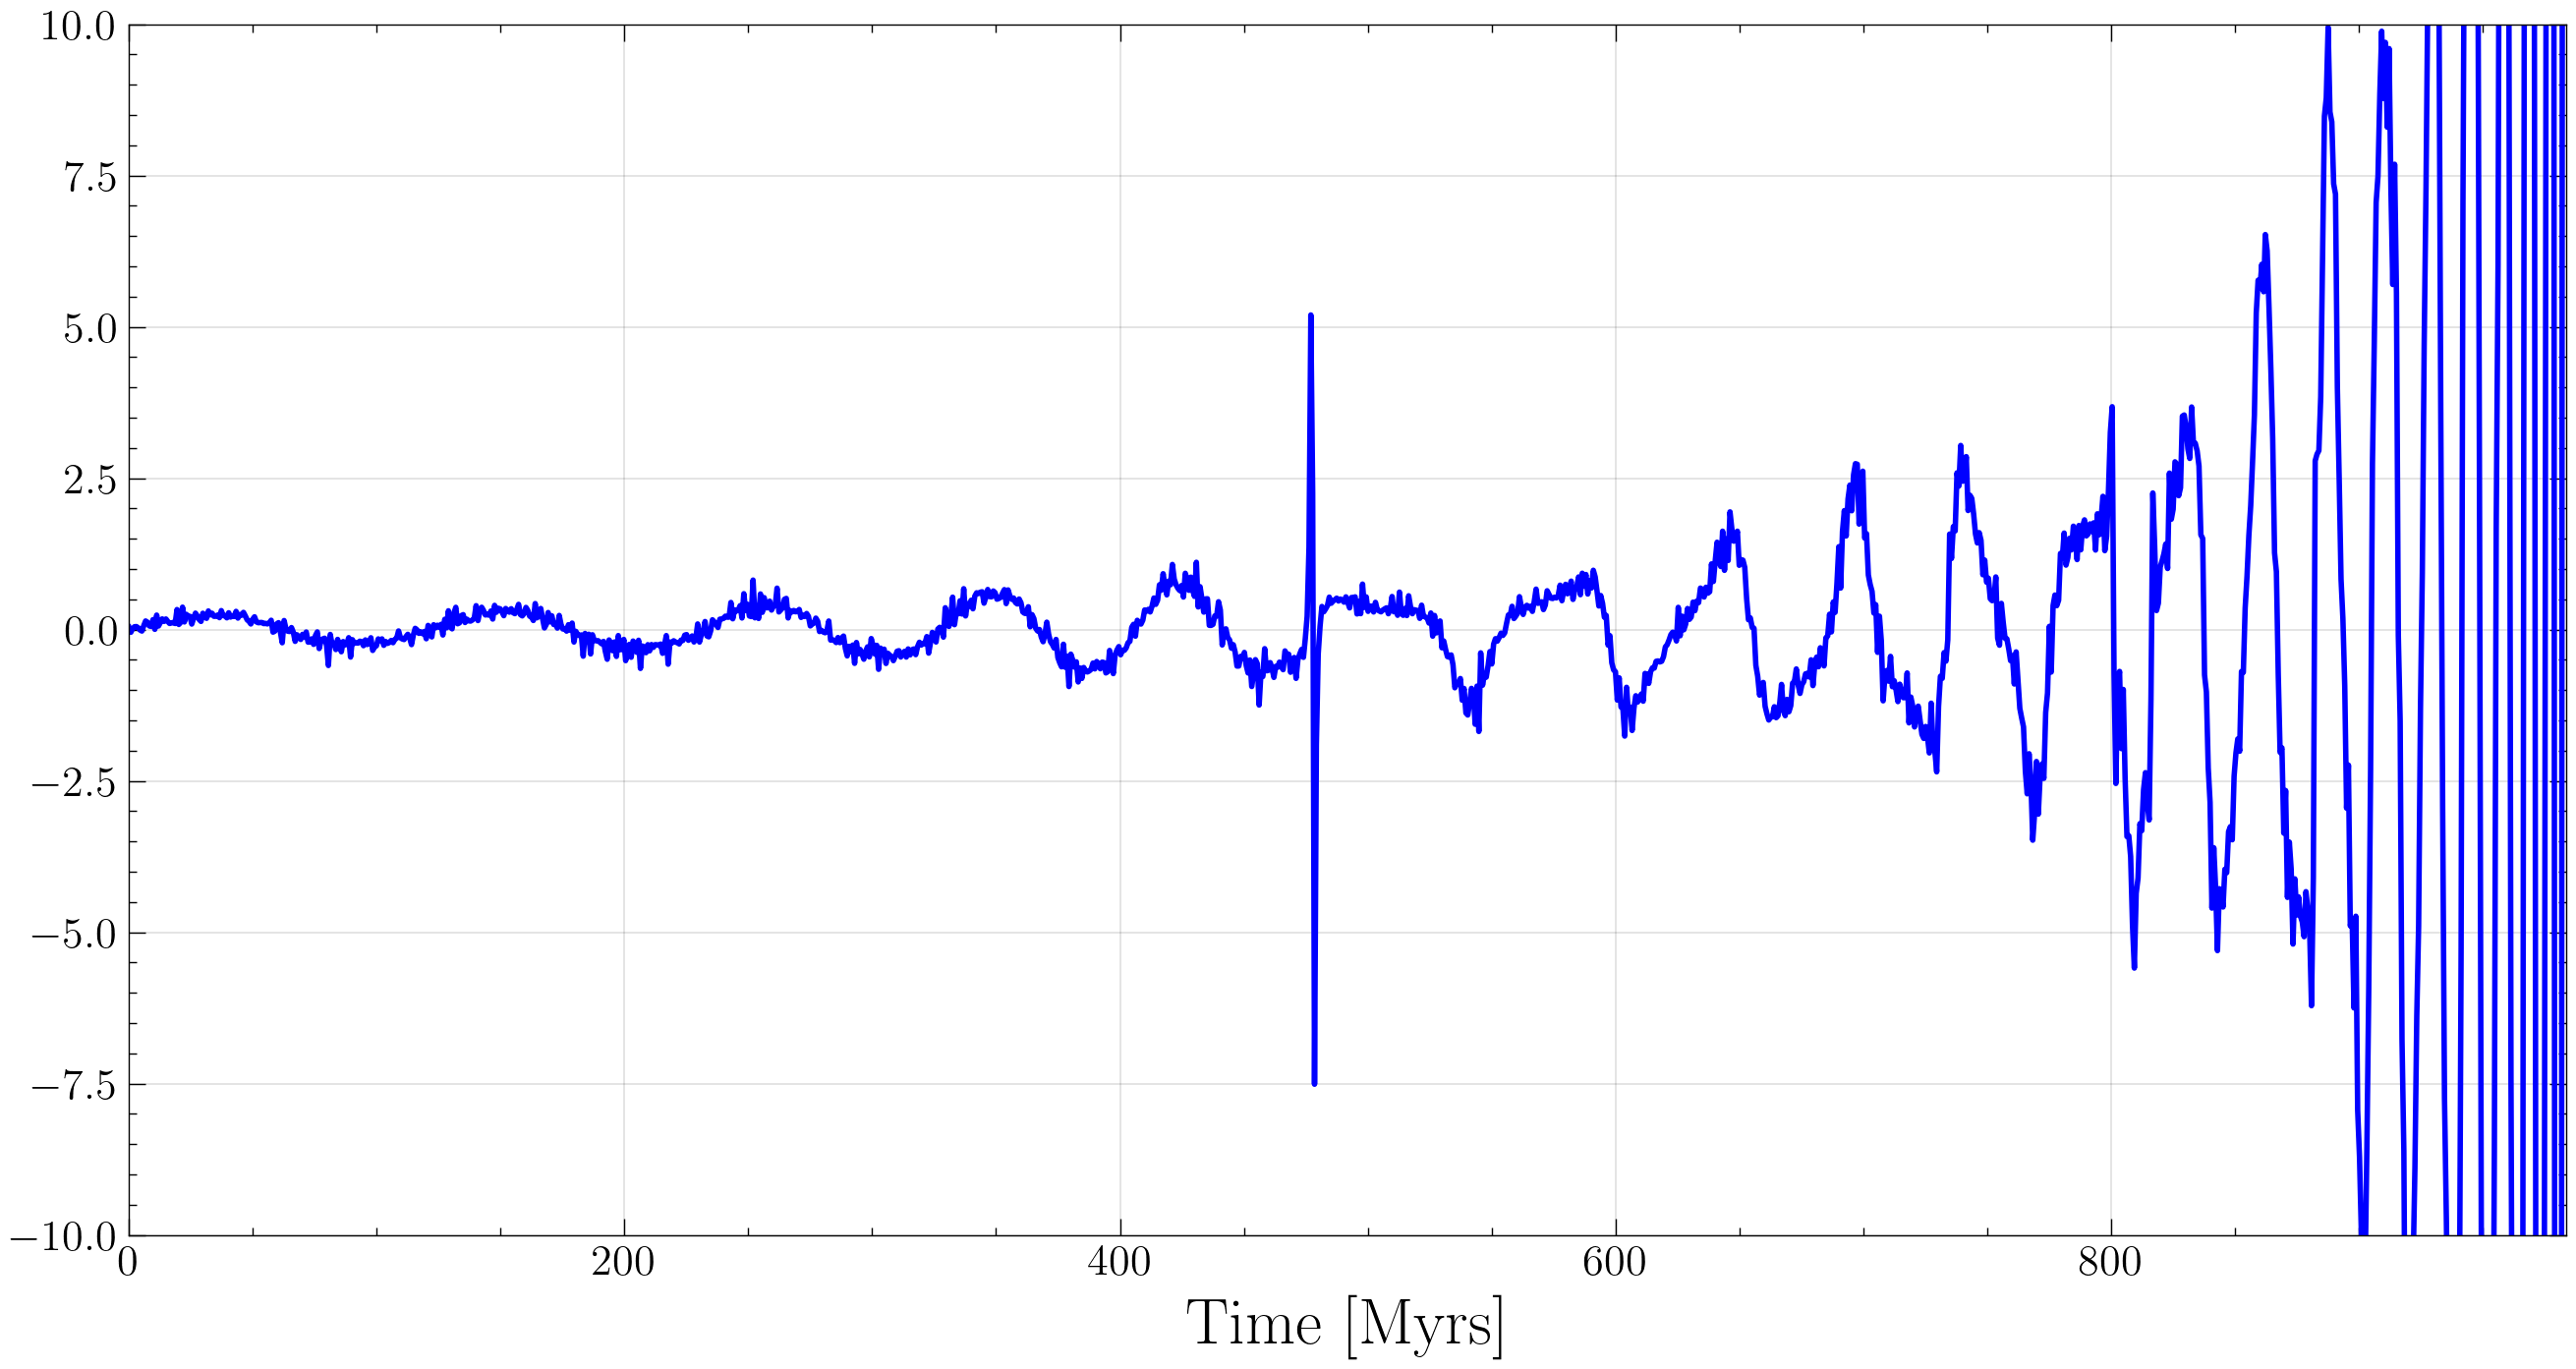

In [49]:
plt.figure(figsize=(16, 8))
plt.plot(time[:index_binary_formation], a_mbh1_vector[0,:index_binary_formation] - a_mbh1_vector_output[0,:index_binary_formation], color='blue', lw=2)
plt.xlim(0, time[index_binary_formation])
plt.ylim(-10, 10)
plt.xlabel('Time [Myrs]');

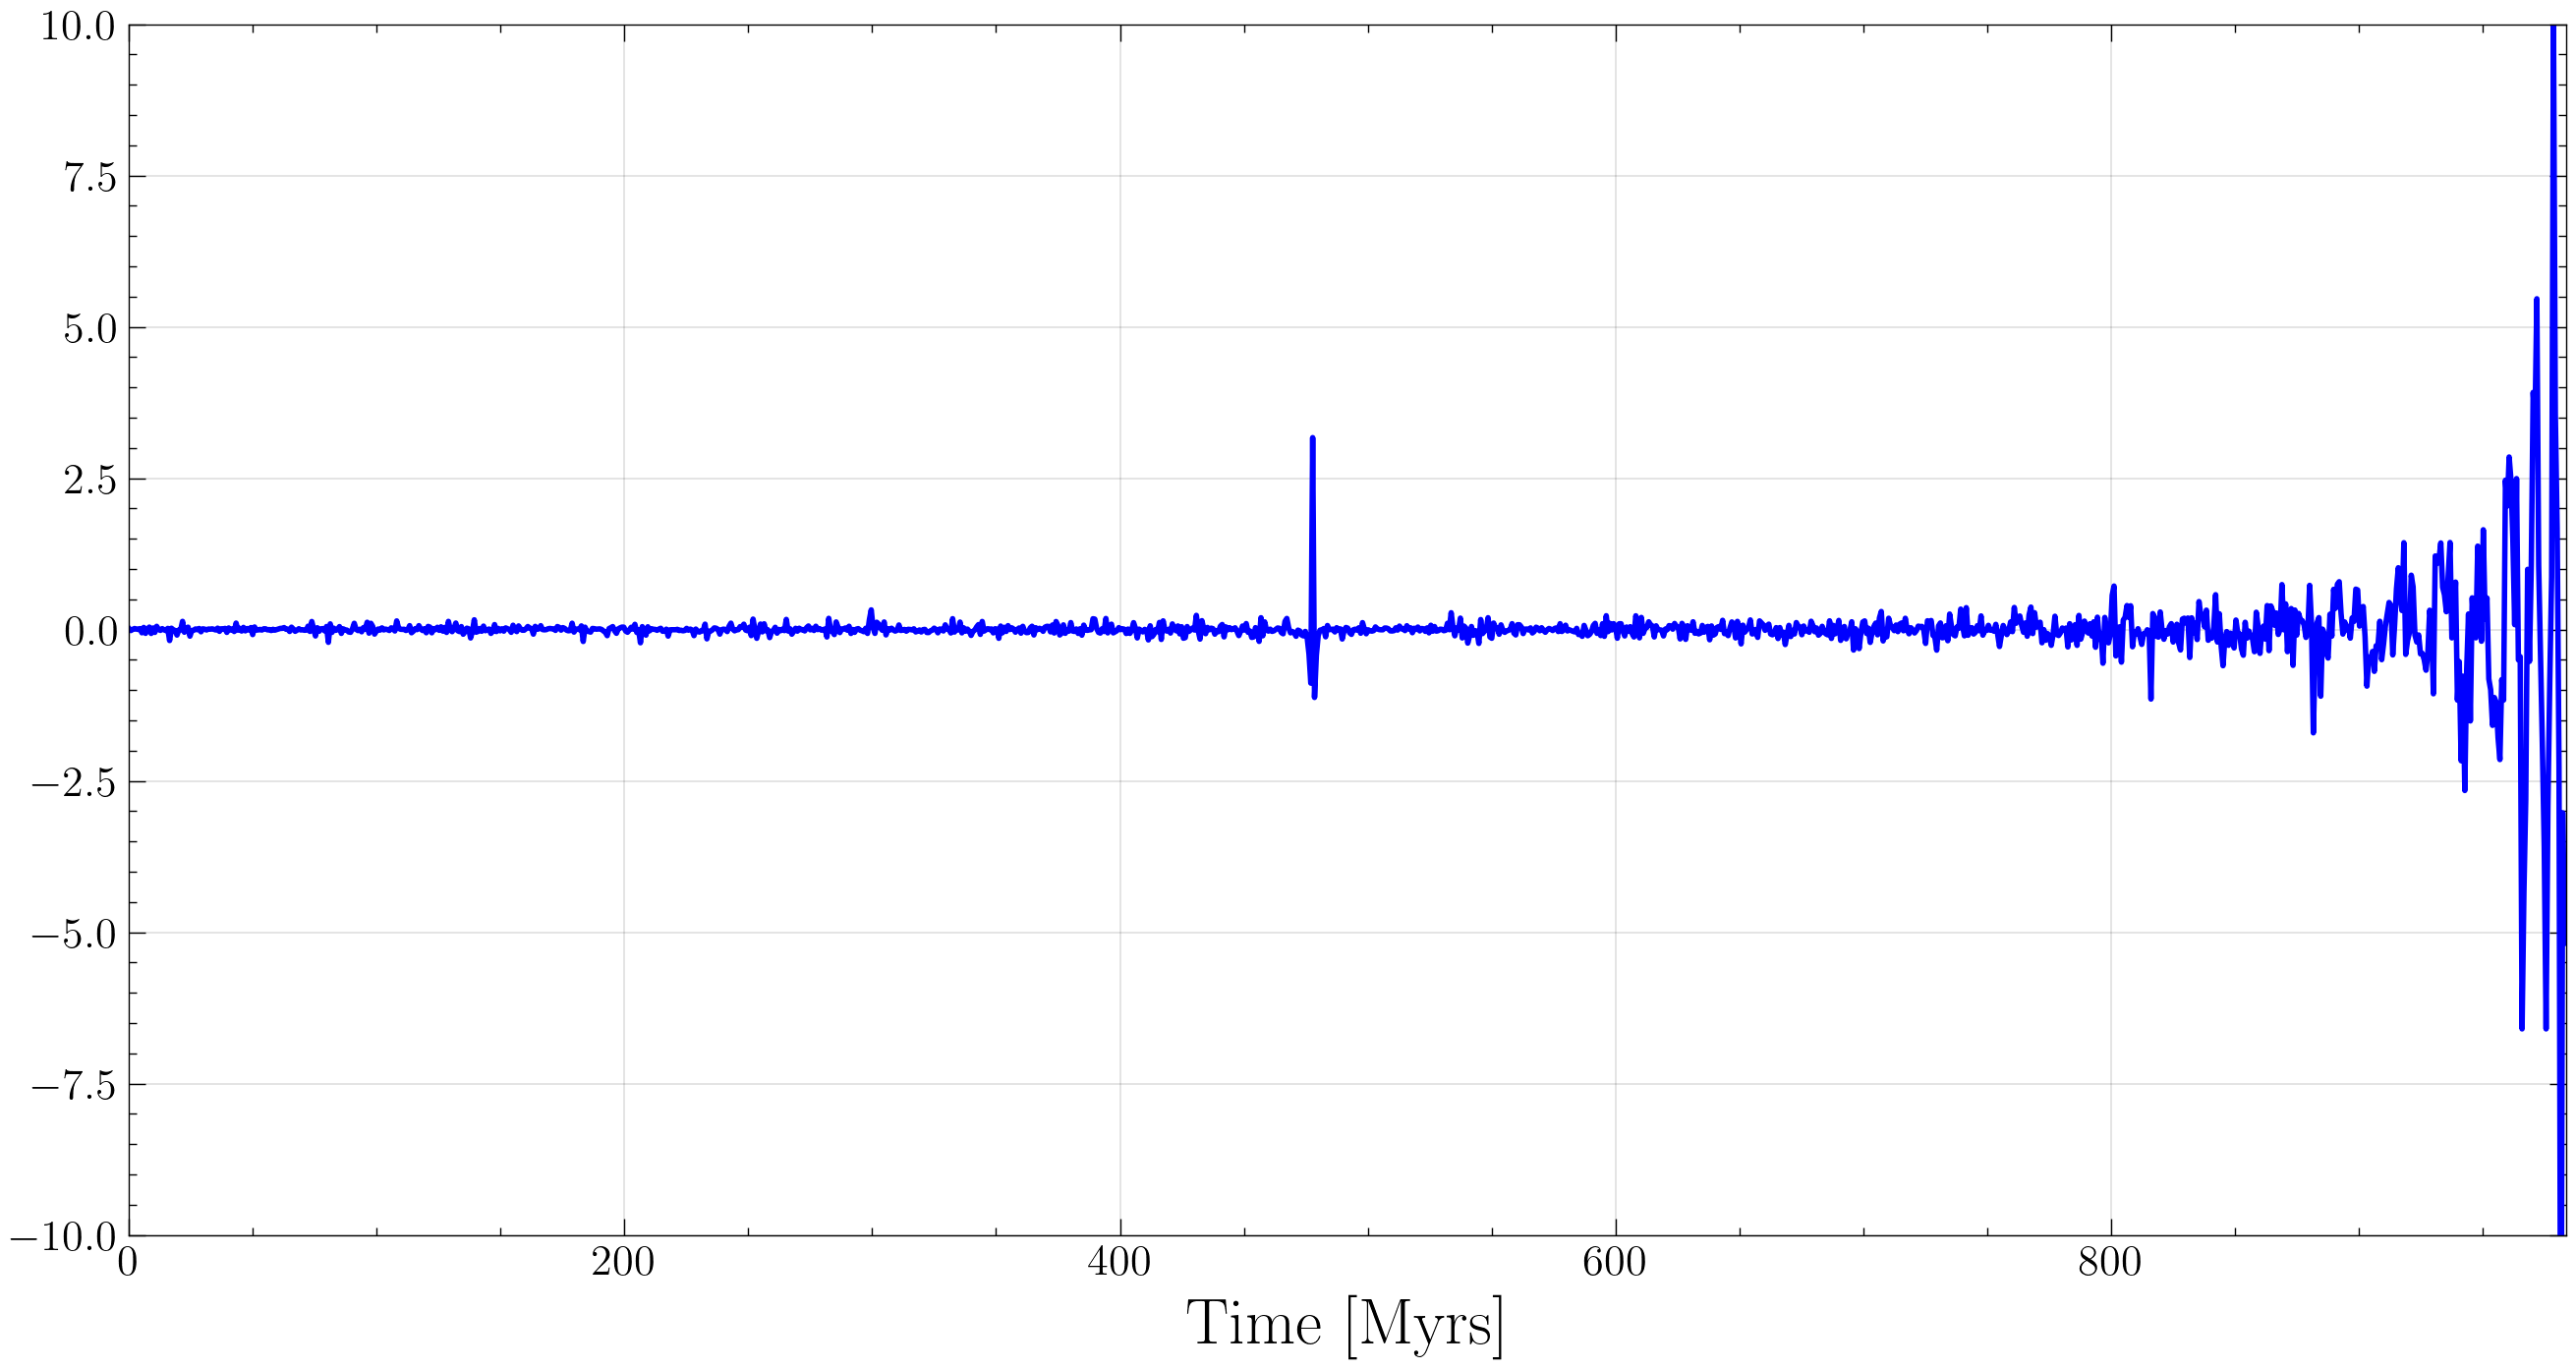

In [50]:
a_mbh1_vector_test = (a_mbh1_vector_output[:,:-1] + a_mbh1_vector_output[:,1:])/2
a_mbh1_vector_test = np.hstack([a_mbh1_vector_test, np.array([a_mbh1_vector_test[:,-1]]).T]) # to have the same length as time

plt.figure(figsize=(16, 8))
plt.plot(time[:index_binary_formation], a_mbh1_vector[0,:index_binary_formation] - a_mbh1_vector_test[0,:index_binary_formation], color='blue', lw=2)
plt.xlim(0, time[index_binary_formation])
plt.ylim(-10, 10)
plt.xlabel('Time [Myrs]');

So far we computed the total acceleration of the black holes, which includes also the centripetal acceleration of Keplerian motion.\
We have to remove this in order to isolate the dynamical-friction component.

$\vec{a}_\text{Kepler} \, = \, - \dfrac{G M(r_\text{MBH})}{r_\text{MBH}^3} \vec{r}_\text{MBH}$

In [51]:
def Inner_Mass(dist_particle, time, dist_mbh):
    inner_particles = np.zeros(len(time))
    
    for i in tqdm(range(len(time))):
        mask = dist_particle[:,i]<dist_mbh[i]
        inner_particles[i] = np.sum(mask)
        
    return inner_particles * m_particle

inner_mass_mbh1 = Inner_Mass(dist_particle, time, dist_mbh1)
inner_mass_mbh2 = Inner_Mass(dist_particle, time, dist_mbh2)

100%|██████████| 3000/3000 [00:00<00:00, 26813.51it/s]


In [52]:
r_mbh1_vector = np.array([x[-1], y[-1], z[-1]])
r_mbh2_vector = np.array([x[-2], y[-2], z[-2]])

a_kepler_mbh1 = -G_pu*inner_mass_mbh1*r_mbh1_vector/dist_mbh1**3
a_kepler_mbh2 = -G_pu*inner_mass_mbh2*r_mbh2_vector/dist_mbh2**3

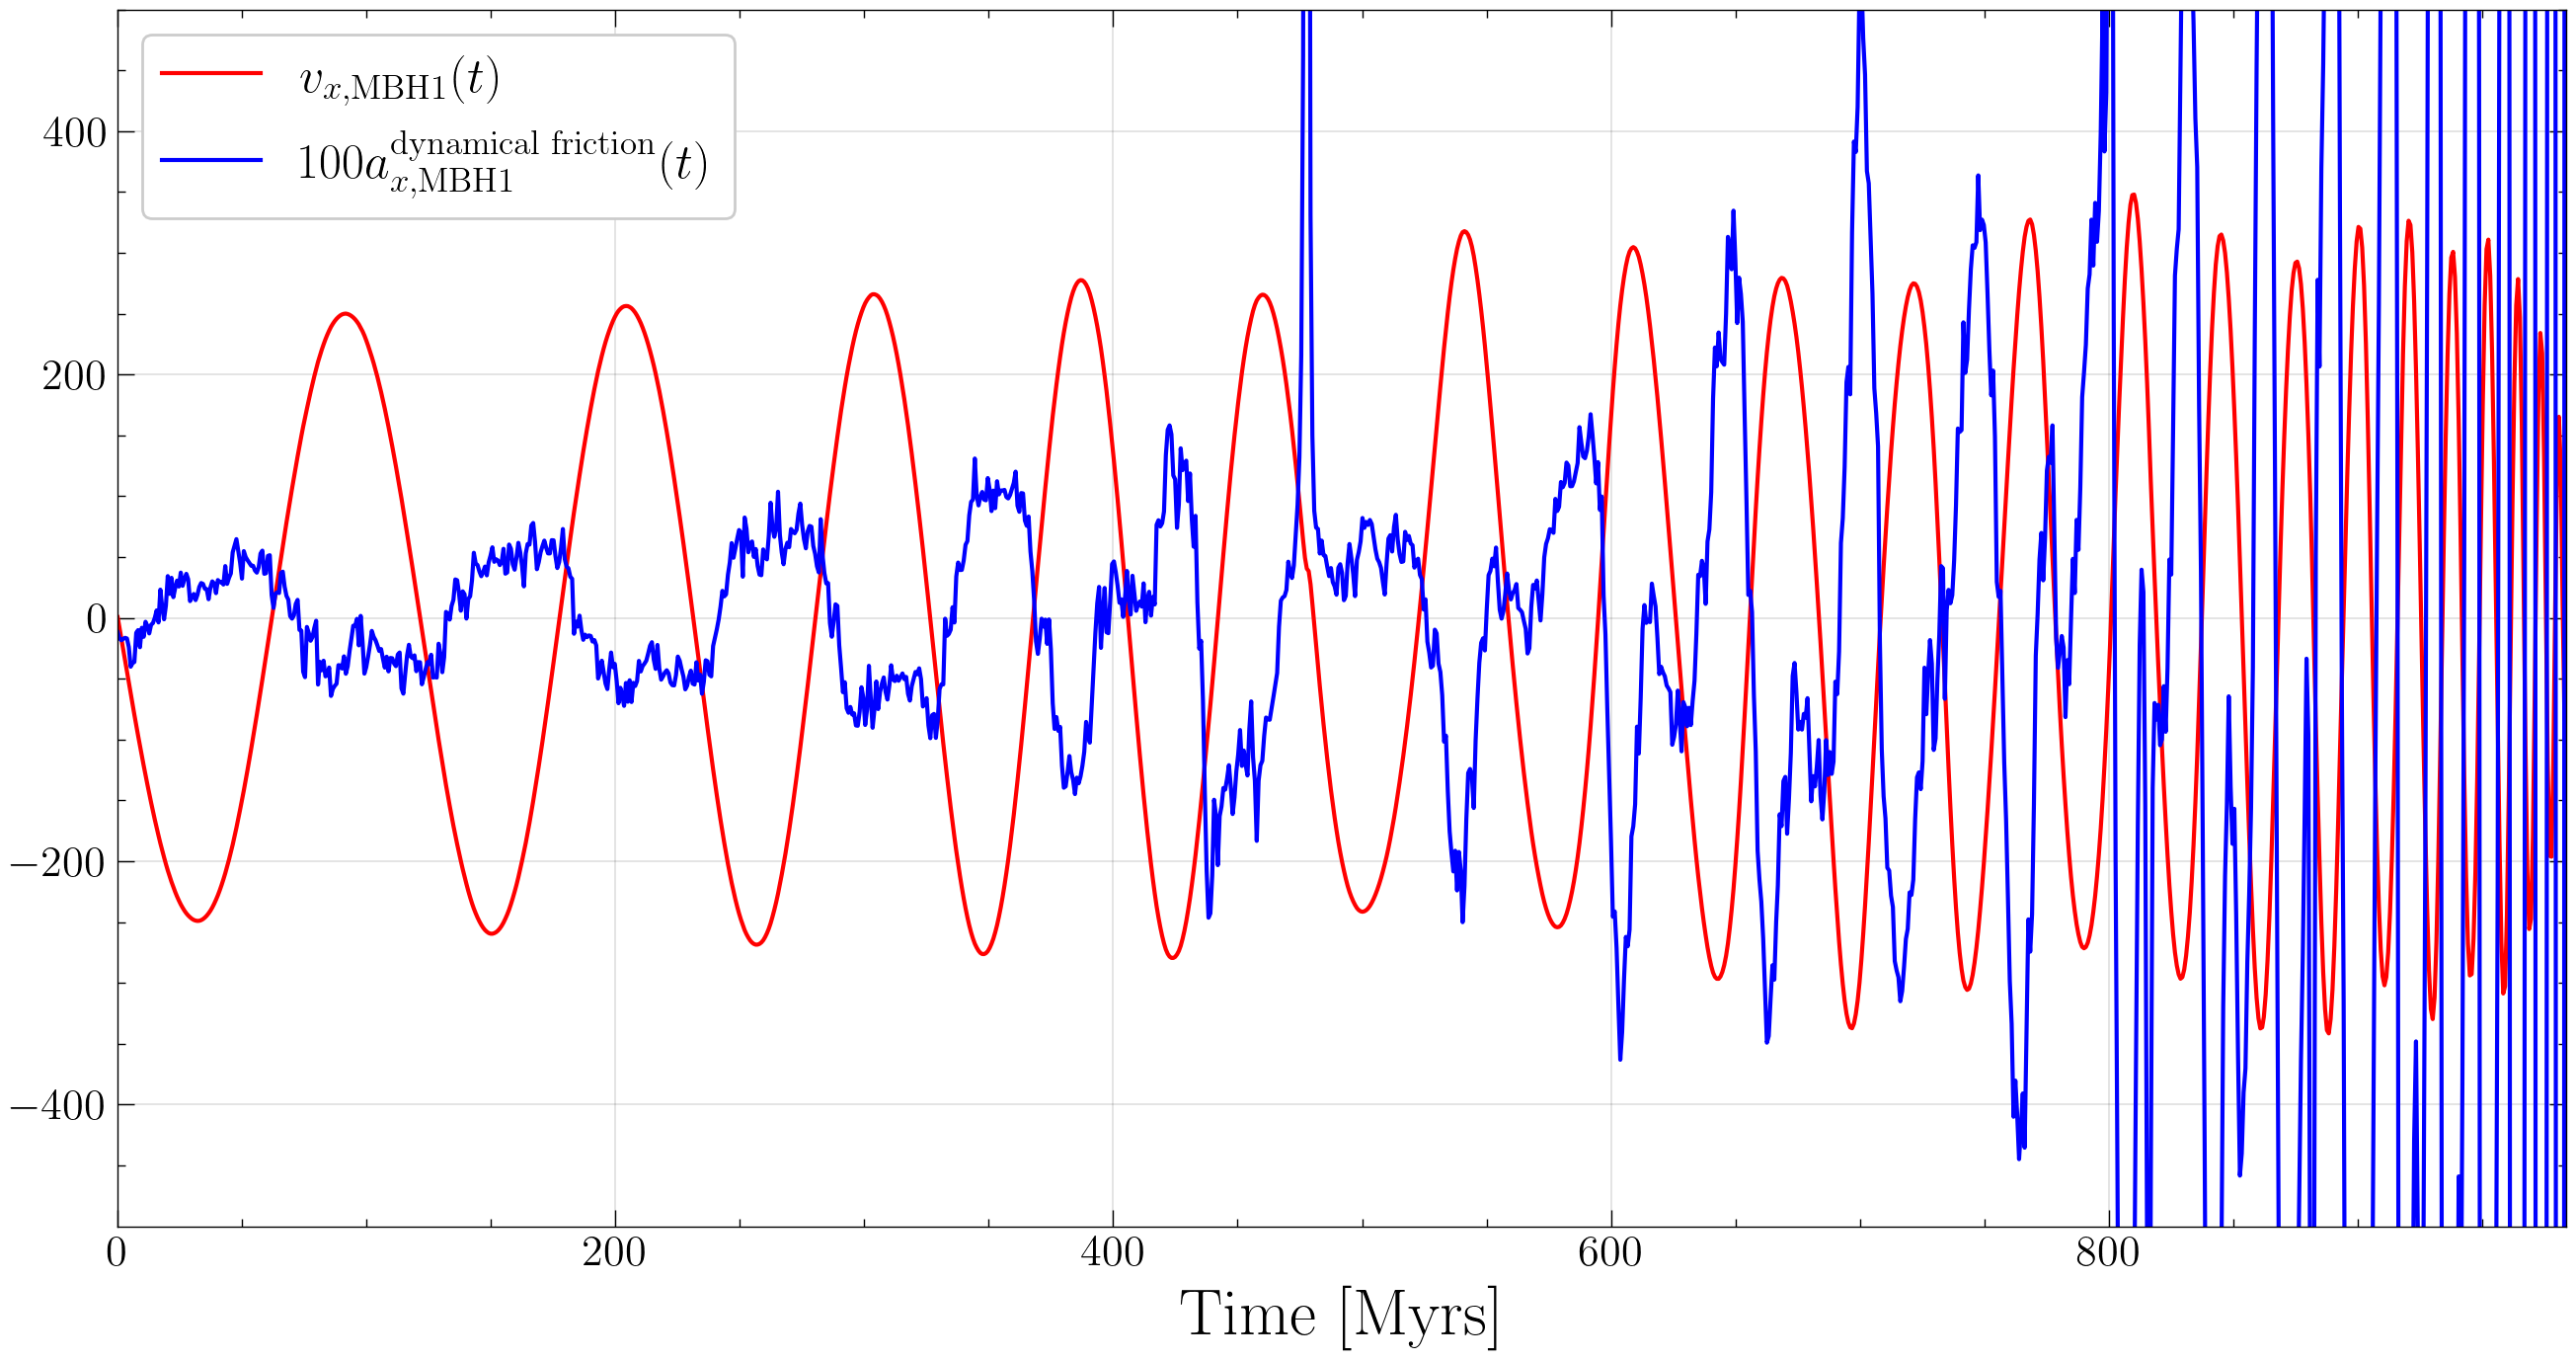

In [53]:
a_DF_mbh1 = a_mbh1_vector - a_kepler_mbh1 # Somehow, the result is better if = a_mbh1_vector[:,1:] - a_kepler_mbh1[:,:-1]
a_DF_mbh2 = a_mbh2_vector - a_kepler_mbh2

plt.figure(figsize=(16, 8))
plt.plot(time[:index_binary_formation], v_mbh1_vector[0,:index_binary_formation], color='red', label='$v_{x,\\rm{MBH1}}(t)$')
plt.plot(time[:index_binary_formation], 100*a_DF_mbh1[0,:index_binary_formation], color='blue', label='$100a_{x,\\rm{MBH1}}^\\text{dynamical friction}(t)$')
plt.xlim(0, time[index_binary_formation])
plt.ylim(-500, 500)
plt.xlabel('Time [Myrs]')
plt.legend();

## Acceleration computed from the dynamical friction formula

The cell below contains a function that computes the dynamical-friction acceleration according to the general Chandrasekhar's formula.\
However, it does not take into account the density increase due to the infall of the perturber towards the center of the distribution, since Chandrasekhar's derivation assumes motion within a homogeneous and isotropic background.\
On the contrary, the density explicitly appears in the approximated formula for the singular isothermal sphere scenario, resulting in a much better match to the data, even when considering Hernquist and King distributions.

def Compute_DF_acceleration(vx, vy, vz, v_mbh, v_mbh_vector, ln_lambda=5):
    
    result = np.zeros((3, len(time)))
    
    for i in tqdm(range(len(time))):
        # Define the velocities with respect to the MBH
        v_rel = np.sqrt((vx[:-2,i] - v_mbh_vector[0,i])**2 + (vy[:-2,i] - v_mbh_vector[1,i])**2 + (vz[:-2,i] - v_mbh_vector[2,i])**2)

        # Compute the velocity distribution function
        p_of_v, v_bins_edges = np.histogram(v_rel, bins=100, density=True)
        v_bins_centers = (v_bins_edges[:-1]+v_bins_edges[1:])/2
        
        # Consider only the particles with velocities smaller than the MBH velocity
        mask = v_bins_centers <= v_mbh[i]

        # Compute the integral
        integral = np.trapz(p_of_v[mask], v_bins_centers[mask]) 
        
        result[:,i] = integral * v_mbh_vector[:,i] / v_mbh[i]**3
        
    
    # Notice that one "4pi" goes into the normalization of the velocity distribution function
    C_norm = -4 * np.pi * G_pu_primed**2 * m_particle * (m_particle + M_mbh) * ln_lambda

    return C_norm * result

We have already computed the number density around the black holes at each time step

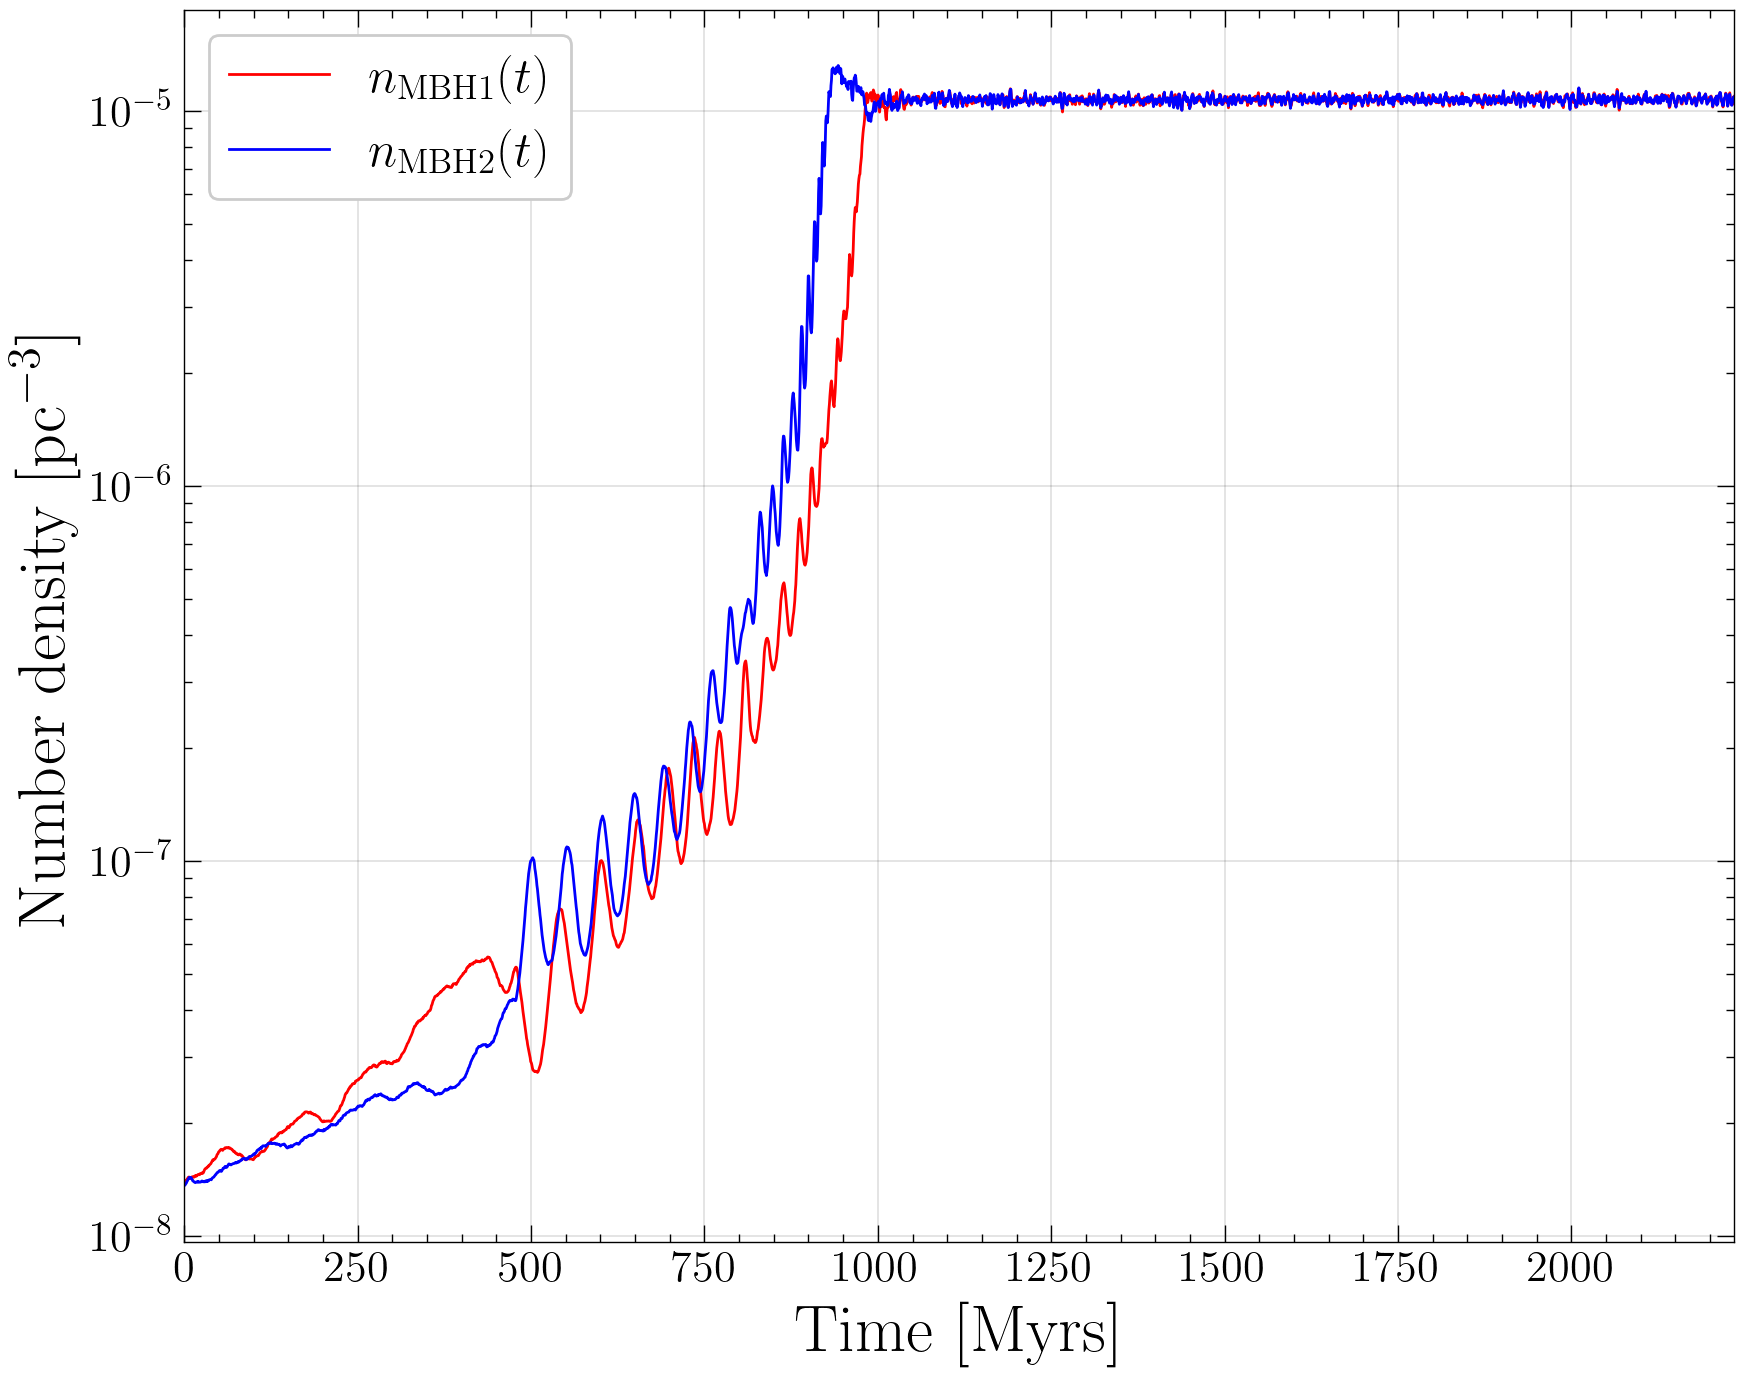

In [54]:
plt.plot(time, number_density_mbh1, color='red', lw=1, label='$n_{\\rm{MBH1}}(t)$')
plt.plot(time, number_density_mbh2, color='blue', lw=1, label='$n_{\\rm{MBH2}}(t)$')
plt.xlim(0, time[-1])
plt.yscale('log')
plt.xlabel('Time [Myrs]')
plt.ylabel('Number density [pc$^{-3}$]')
plt.legend();

We only have to apply the formula, assuming $\ln \Lambda = 3$

In [55]:
# sqrt(pc^2 km^4 M_sun^-2 s^-4)  -->  sqrt(pc^3 km^3 M_sun^-2 s^-4)
G_pu_primed = G_pu*np.sqrt(1e5/(3.08567758128e18))
# sqrt(pc^3 km^3 M_sun^-2 s^-4)  -->  sqrt(pc^3 km^3 M_sun^-2 s^-3 Myrs-1)
G_pu_primed = G_pu_primed*np.sqrt(1e6*(3.156e7))

ln_lambda = 3
Constant = -0.428*2*np.pi*G_pu_primed**2*m_particle*(m_particle+M_mbh)*ln_lambda
a_mbh1_expected = Constant*number_density_mbh1*(v_mbh1_vector/v_mbh1)/(sigma_mbh1**2)
a_mbh2_expected = Constant*number_density_mbh2*(v_mbh2_vector/v_mbh2)/(sigma_mbh2**2)

#del v_mbh1_vector, v_mbh2_vector, a_mbh1_vector, a_mbh2_vector, inner_mass_mbh1, inner_mass_mbh2, r_mbh1_vector, r_mbh2_vector, a_kepler_mbh1, a_kepler_mbh2

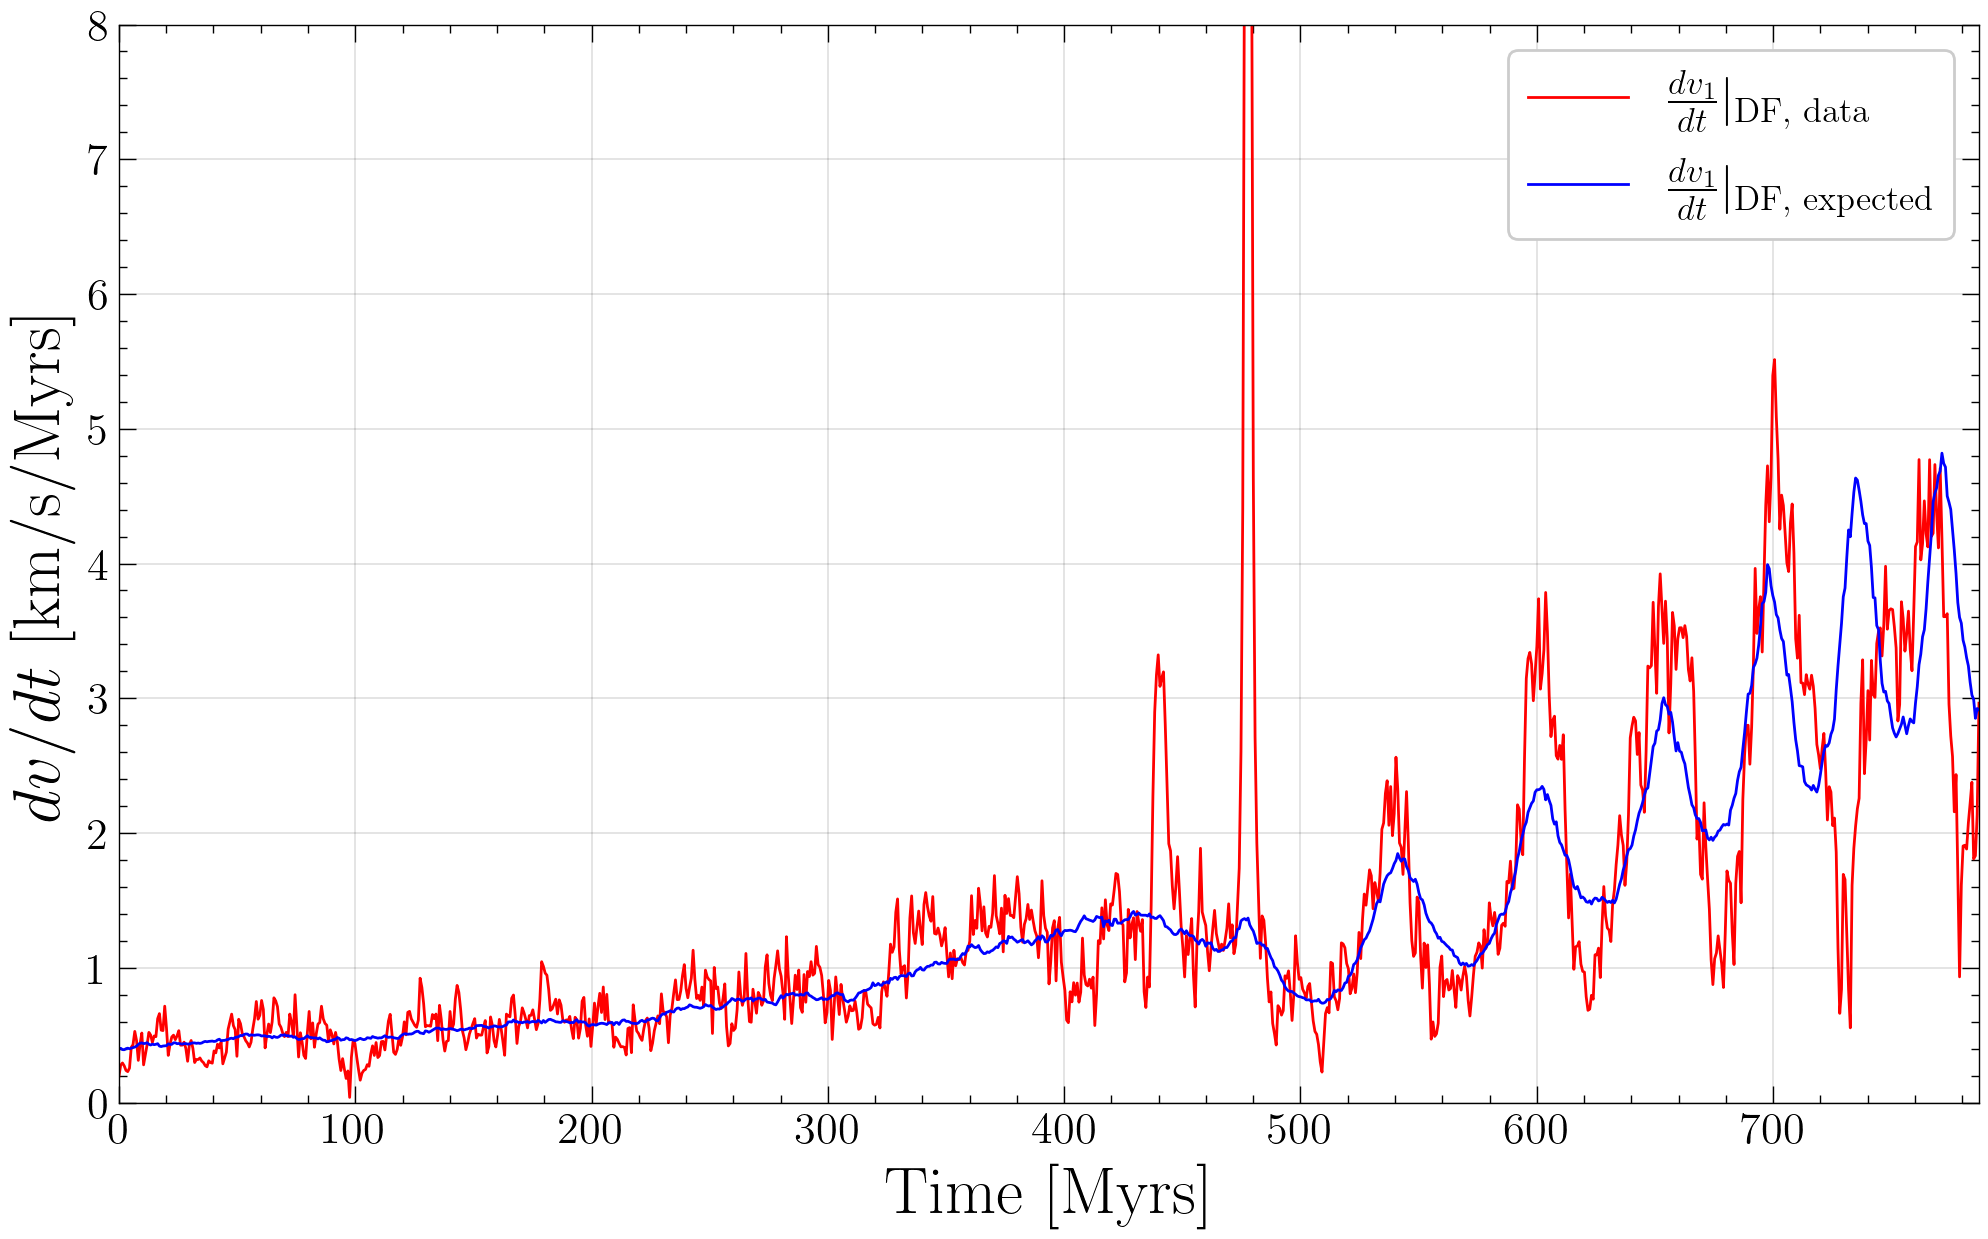

In [56]:
plt.figure(figsize=(12, 7))
plt.plot(time[:index_binary_formation], np.linalg.norm(a_DF_mbh1, axis=0)[:index_binary_formation], color='red', lw=1, label='$\\frac{dv_1}{dt} |_\\text{DF, data}$')
plt.plot(time[:index_binary_formation], np.linalg.norm(a_mbh1_expected, axis=0)[:index_binary_formation], color='blue', lw=1, label='$\\frac{dv_1}{dt} |_\\text{DF, expected}$')
plt.xlim(0, 4/5*time[index_binary_formation])
plt.ylim(0, 8)
plt.xlabel('Time [Myrs]')
plt.ylabel('$dv/dt$ [km/s/Myrs]')
plt.legend();
#plt.text(-2.55, 1.4, 'RIS', transform=ax.transAxes, fontsize=40, verticalalignment='top');

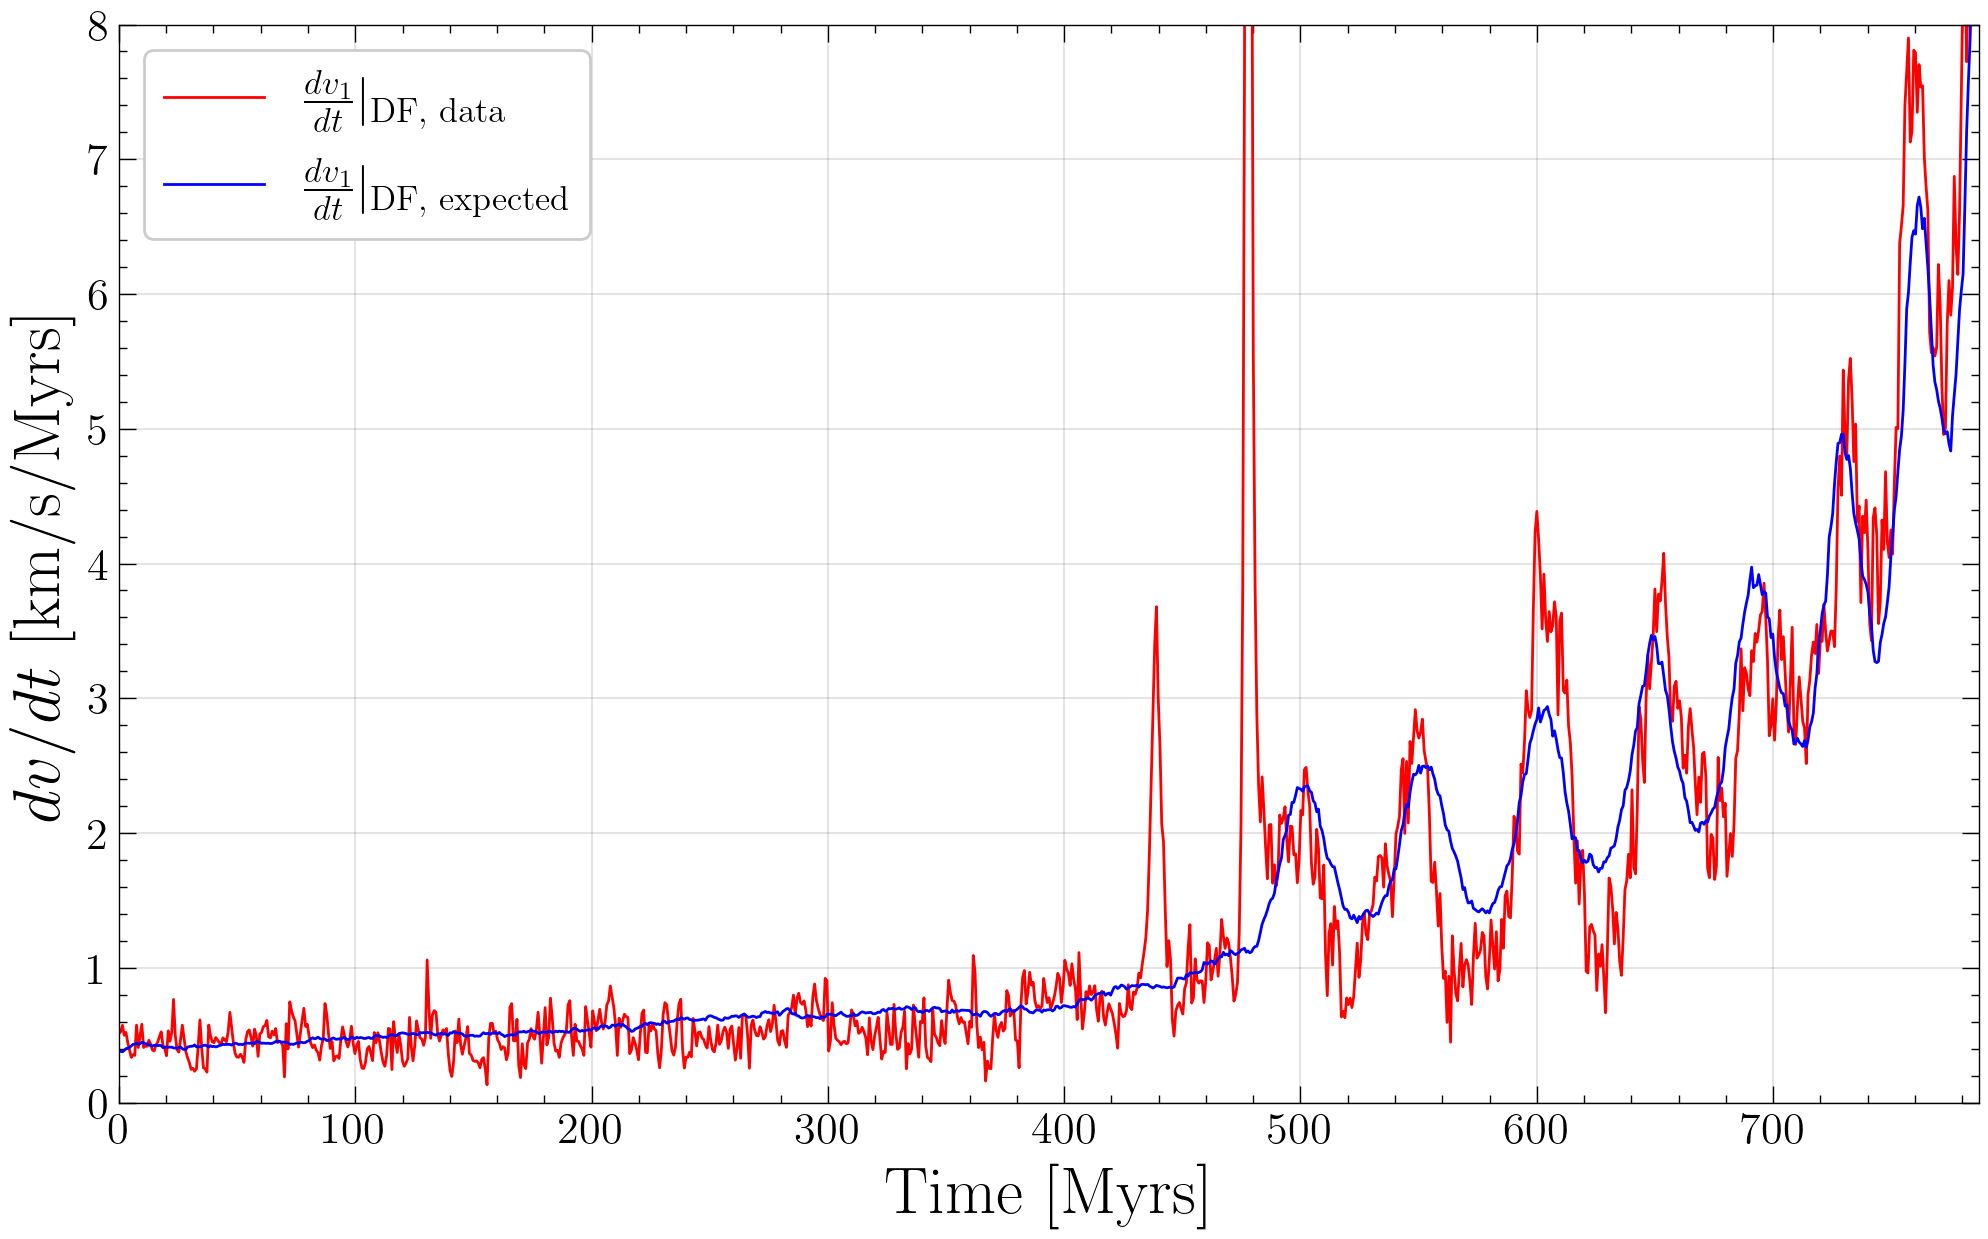

In [57]:
plt.figure(figsize=(12, 7))
plt.plot(time[:index_binary_formation], np.linalg.norm(a_DF_mbh2, axis=0)[:index_binary_formation], color='red', lw=1, label='$\\frac{dv_1}{dt} |_\\text{DF, data}$')
plt.plot(time[:index_binary_formation], np.linalg.norm(a_mbh2_expected, axis=0)[:index_binary_formation], color='blue', lw=1, label='$\\frac{dv_1}{dt} |_\\text{DF, expected}$')
plt.xlim(0, 4/5*time[index_binary_formation])
plt.ylim(0, 8)
plt.xlabel('Time [Myrs]')
plt.ylabel('$dv/dt$ [km/s/Myrs]')
plt.legend();
#plt.text(-2.55, 1.4, 'RIS', transform=ax.transAxes, fontsize=40, verticalalignment='top');

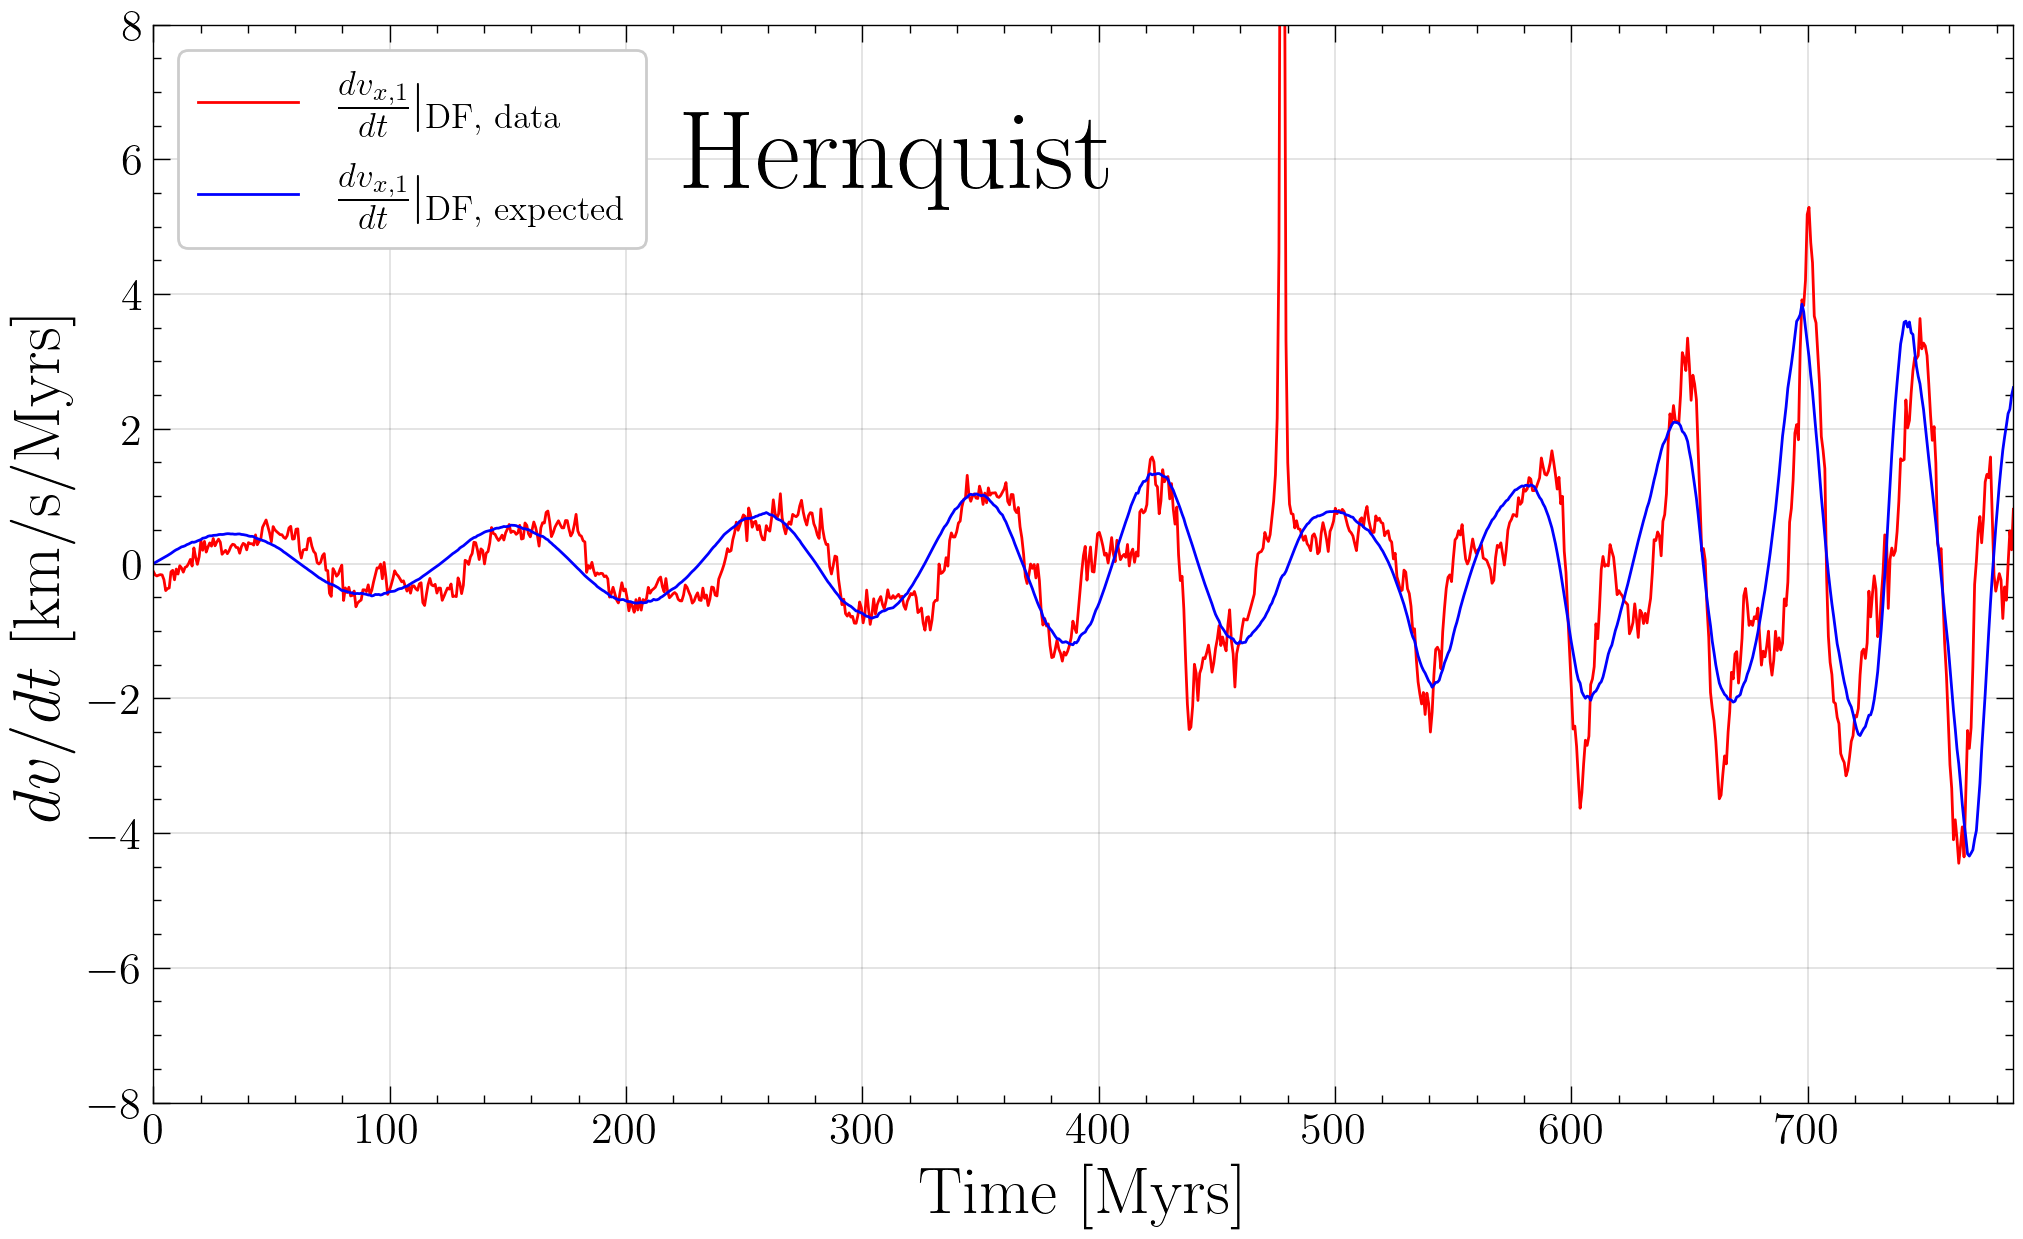

In [58]:
coord_index = 0

plt.figure(figsize=(12, 7))
plt.plot(time[:index_binary_formation], a_DF_mbh1[coord_index, :index_binary_formation], color='red', lw=1, label='$\\frac{dv_{x,1}}{dt} |_\\text{DF, data}$')
plt.plot(time[:index_binary_formation], a_mbh1_expected[coord_index, :index_binary_formation], color='blue', lw=1, label='$\\frac{dv_{x,1}}{dt} |_\\text{DF, expected}$')
plt.xlim(0, 4/5*time[index_binary_formation])
plt.ylim(-8, 8)
plt.xlabel('Time [Myrs]')
plt.ylabel('$dv/dt$ [km/s/Myrs]')
plt.legend()
plt.text(-1.95, 1.7, 'Hernquist', transform=ax.transAxes, fontsize=40, verticalalignment='top');

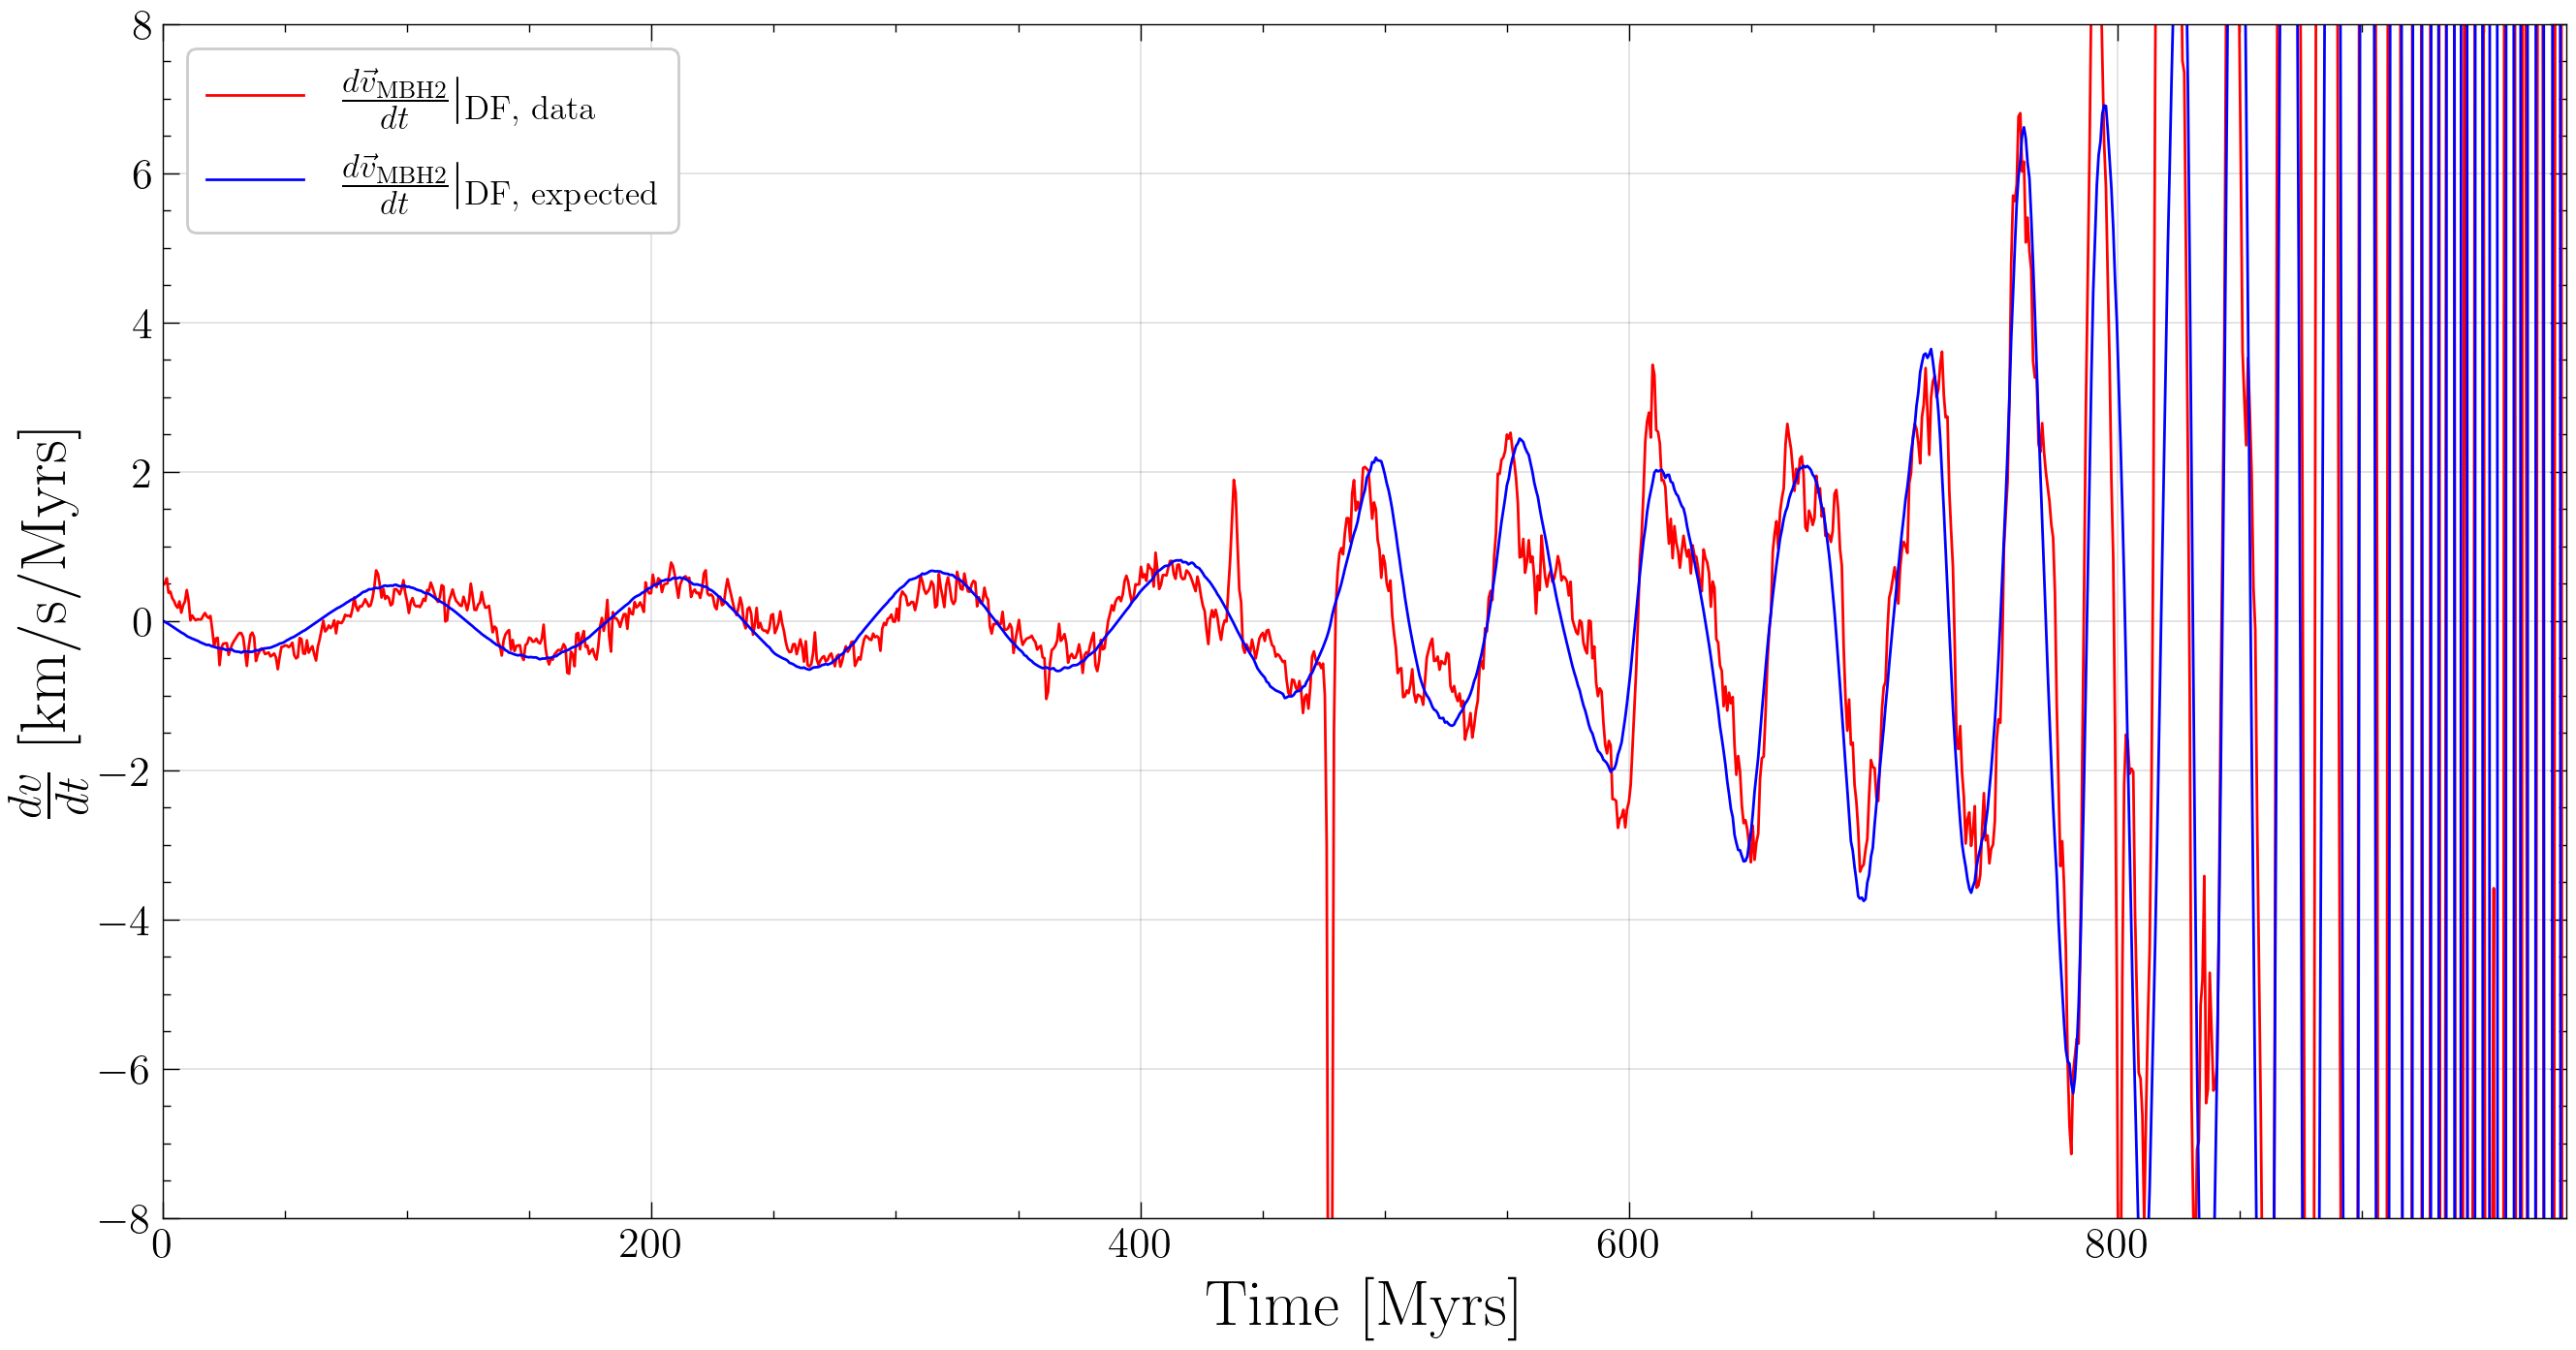

In [59]:
coord_index = 0

plt.figure(figsize=(16, 8))
plt.plot(time[:index_binary_formation], a_DF_mbh2[coord_index, :index_binary_formation], color='red', lw=1, label='$\\frac{d\\vec{v}_{\\rm{MBH2}}}{dt} |_\\text{DF, data}$')
plt.plot(time[:index_binary_formation], a_mbh2_expected[coord_index, :index_binary_formation], color='blue', lw=1, label='$\\frac{d\\vec{v}_{\\rm{MBH2}}}{dt} |_\\text{DF, expected}$')
plt.xlim(0, time[index_binary_formation])
plt.ylim(-8, 8)
plt.xlabel('Time [Myrs]')
plt.ylabel('$\\frac{d v}{dt}$ [km/s/Myrs]')
plt.legend();

# Study of Stellar Hardening

Stellar hardening is described by the following formula:

$\dfrac{da}{dt} \, = \, - H \dfrac{G \rho(r_\text{influence}) a^2}{\sigma(r_\text{influence})} \:\:,$

where $H$ is the hardening rate and $a$ is the separation.

$\dfrac{pc}{\text{Myr}} = {\color{lime} \dfrac{pc^2 km}{M_\odot s \text{Myr}}} \dfrac{M_\odot}{pc^3} pc^2 \dfrac{s}{km}$

In [60]:
# sqrt(pc^3 km^3 M_sun^-2 s^-3 Myrs-1)  -->  sqrt(pc^4 km^2 M_sun^-2 s^-2 Myrs-2)
G_pu_primed = G_pu_primed*np.sqrt(1e6*(3.156e7))*np.sqrt(1e5/(3.08567758128e18))

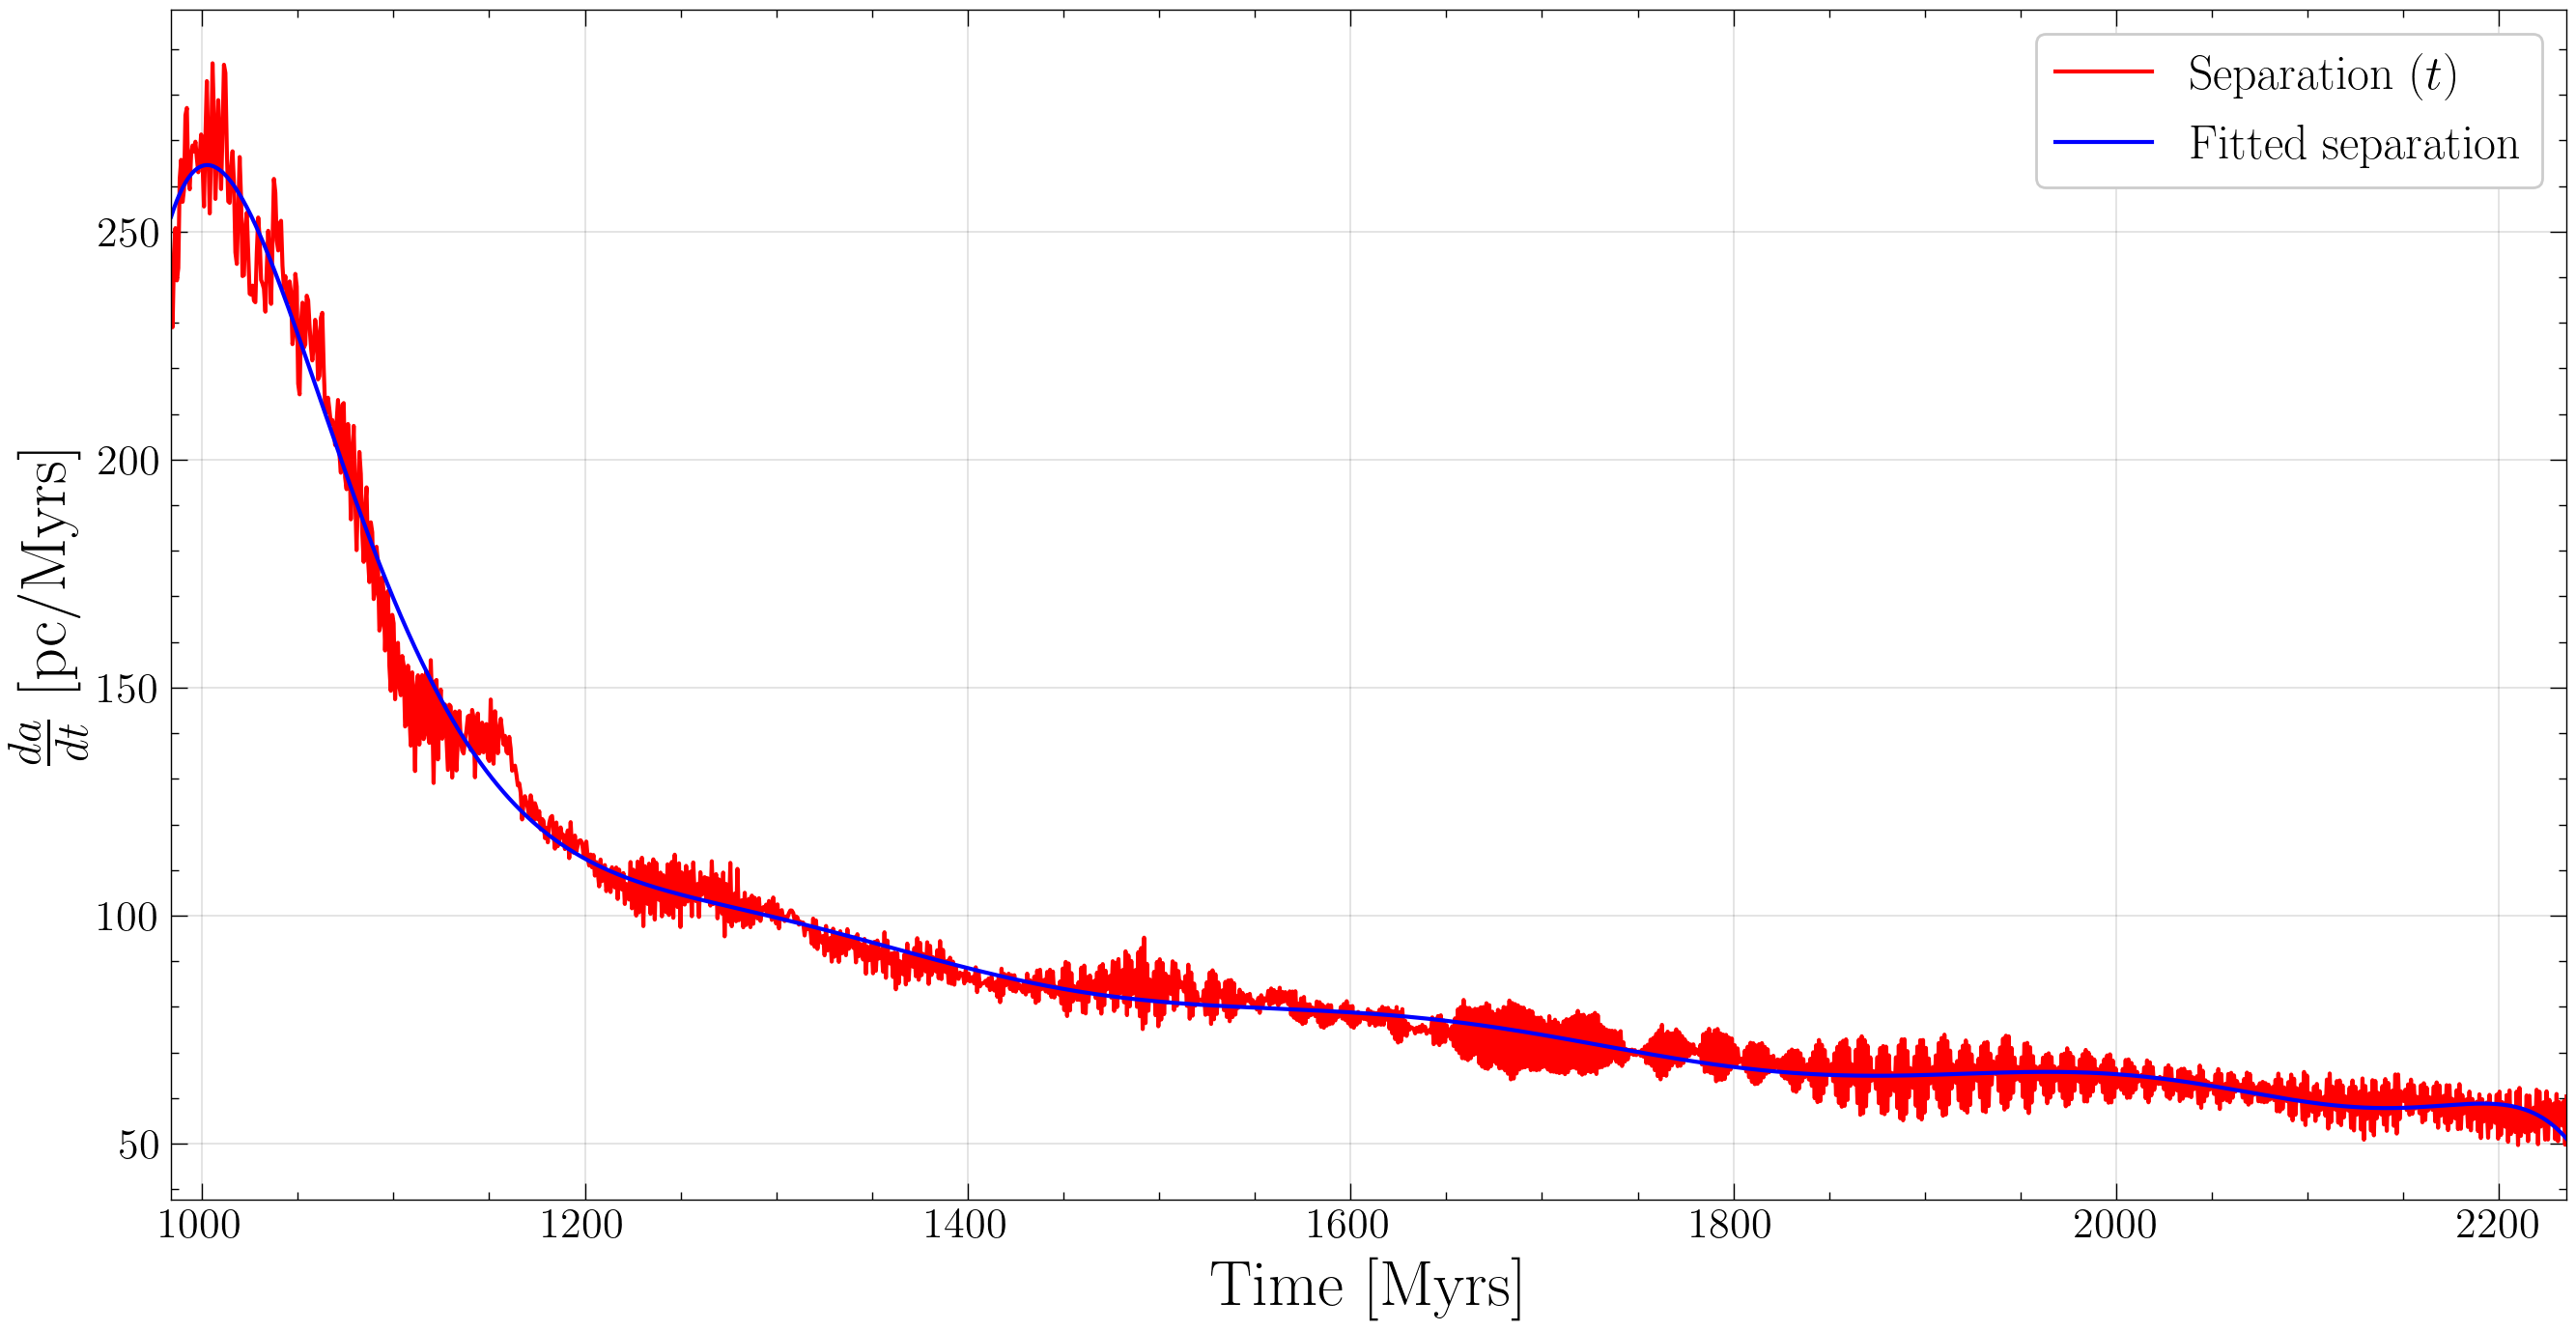

In [ ]:
dist_mbhs_fit_params = np.polyfit(time[index_binary_formation:], dist_mbhs[index_binary_formation:], deg=10)
dist_mbhs_fit = np.polyval(dist_mbhs_fit_params, time[index_binary_formation:])

plt.figure(figsize=(16, 8))
plt.plot(time[index_binary_formation:], dist_mbhs[index_binary_formation:], color='red', label='Separation $(t)$')
plt.plot(time[index_binary_formation:], dist_mbhs_fit, color='blue', label='Fitted separation')
plt.xlim(time[index_binary_formation], time[-1])
#plt.ylim(-10, 10)
plt.xlabel('Time [Myrs]')
plt.ylabel('Separation (t) [pc]')
plt.legend();

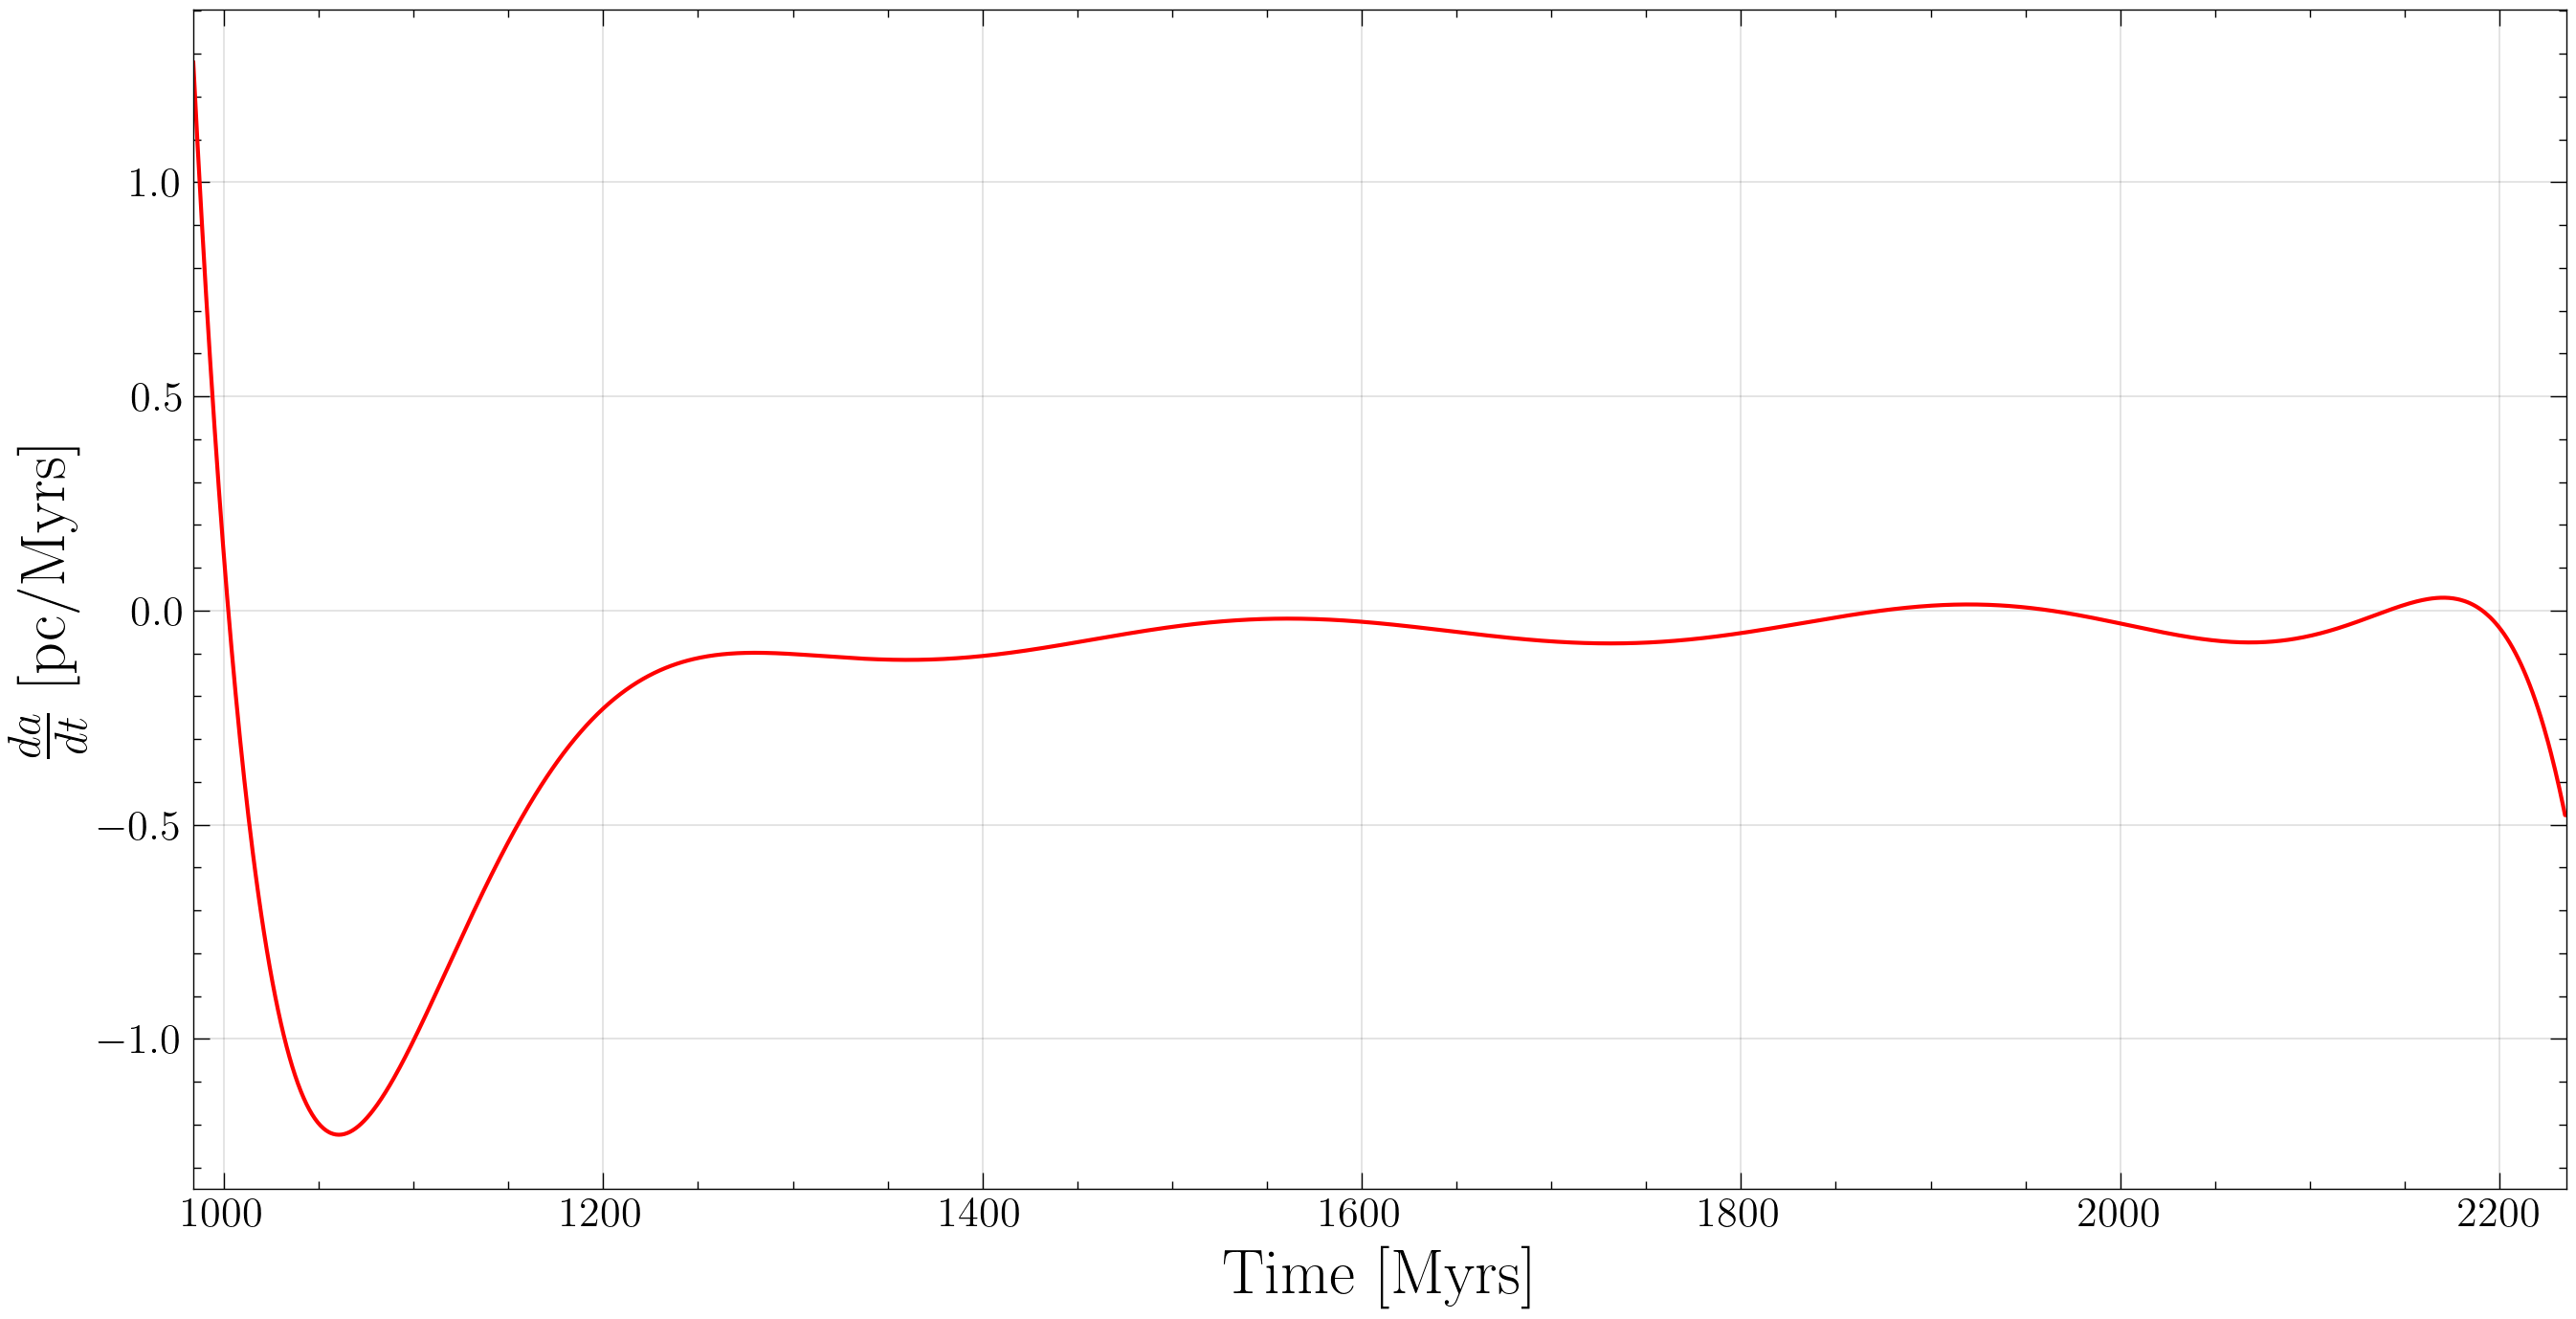

In [62]:
delta_separation = np.diff(dist_mbhs_fit)/np.diff(time[index_binary_formation:])
delta_separation = np.hstack([delta_separation, np.array([delta_separation[-1]])])  # to have the same length as time

plt.figure(figsize=(16, 8))
plt.plot(time[index_binary_formation:], delta_separation, color='red')
plt.xlim(time[index_binary_formation], time[-1])
#plt.ylim(-10, 10)
plt.xlabel('Time [Myrs]')
plt.ylabel('$\\frac{da}{dt}$ [pc/Myrs]');


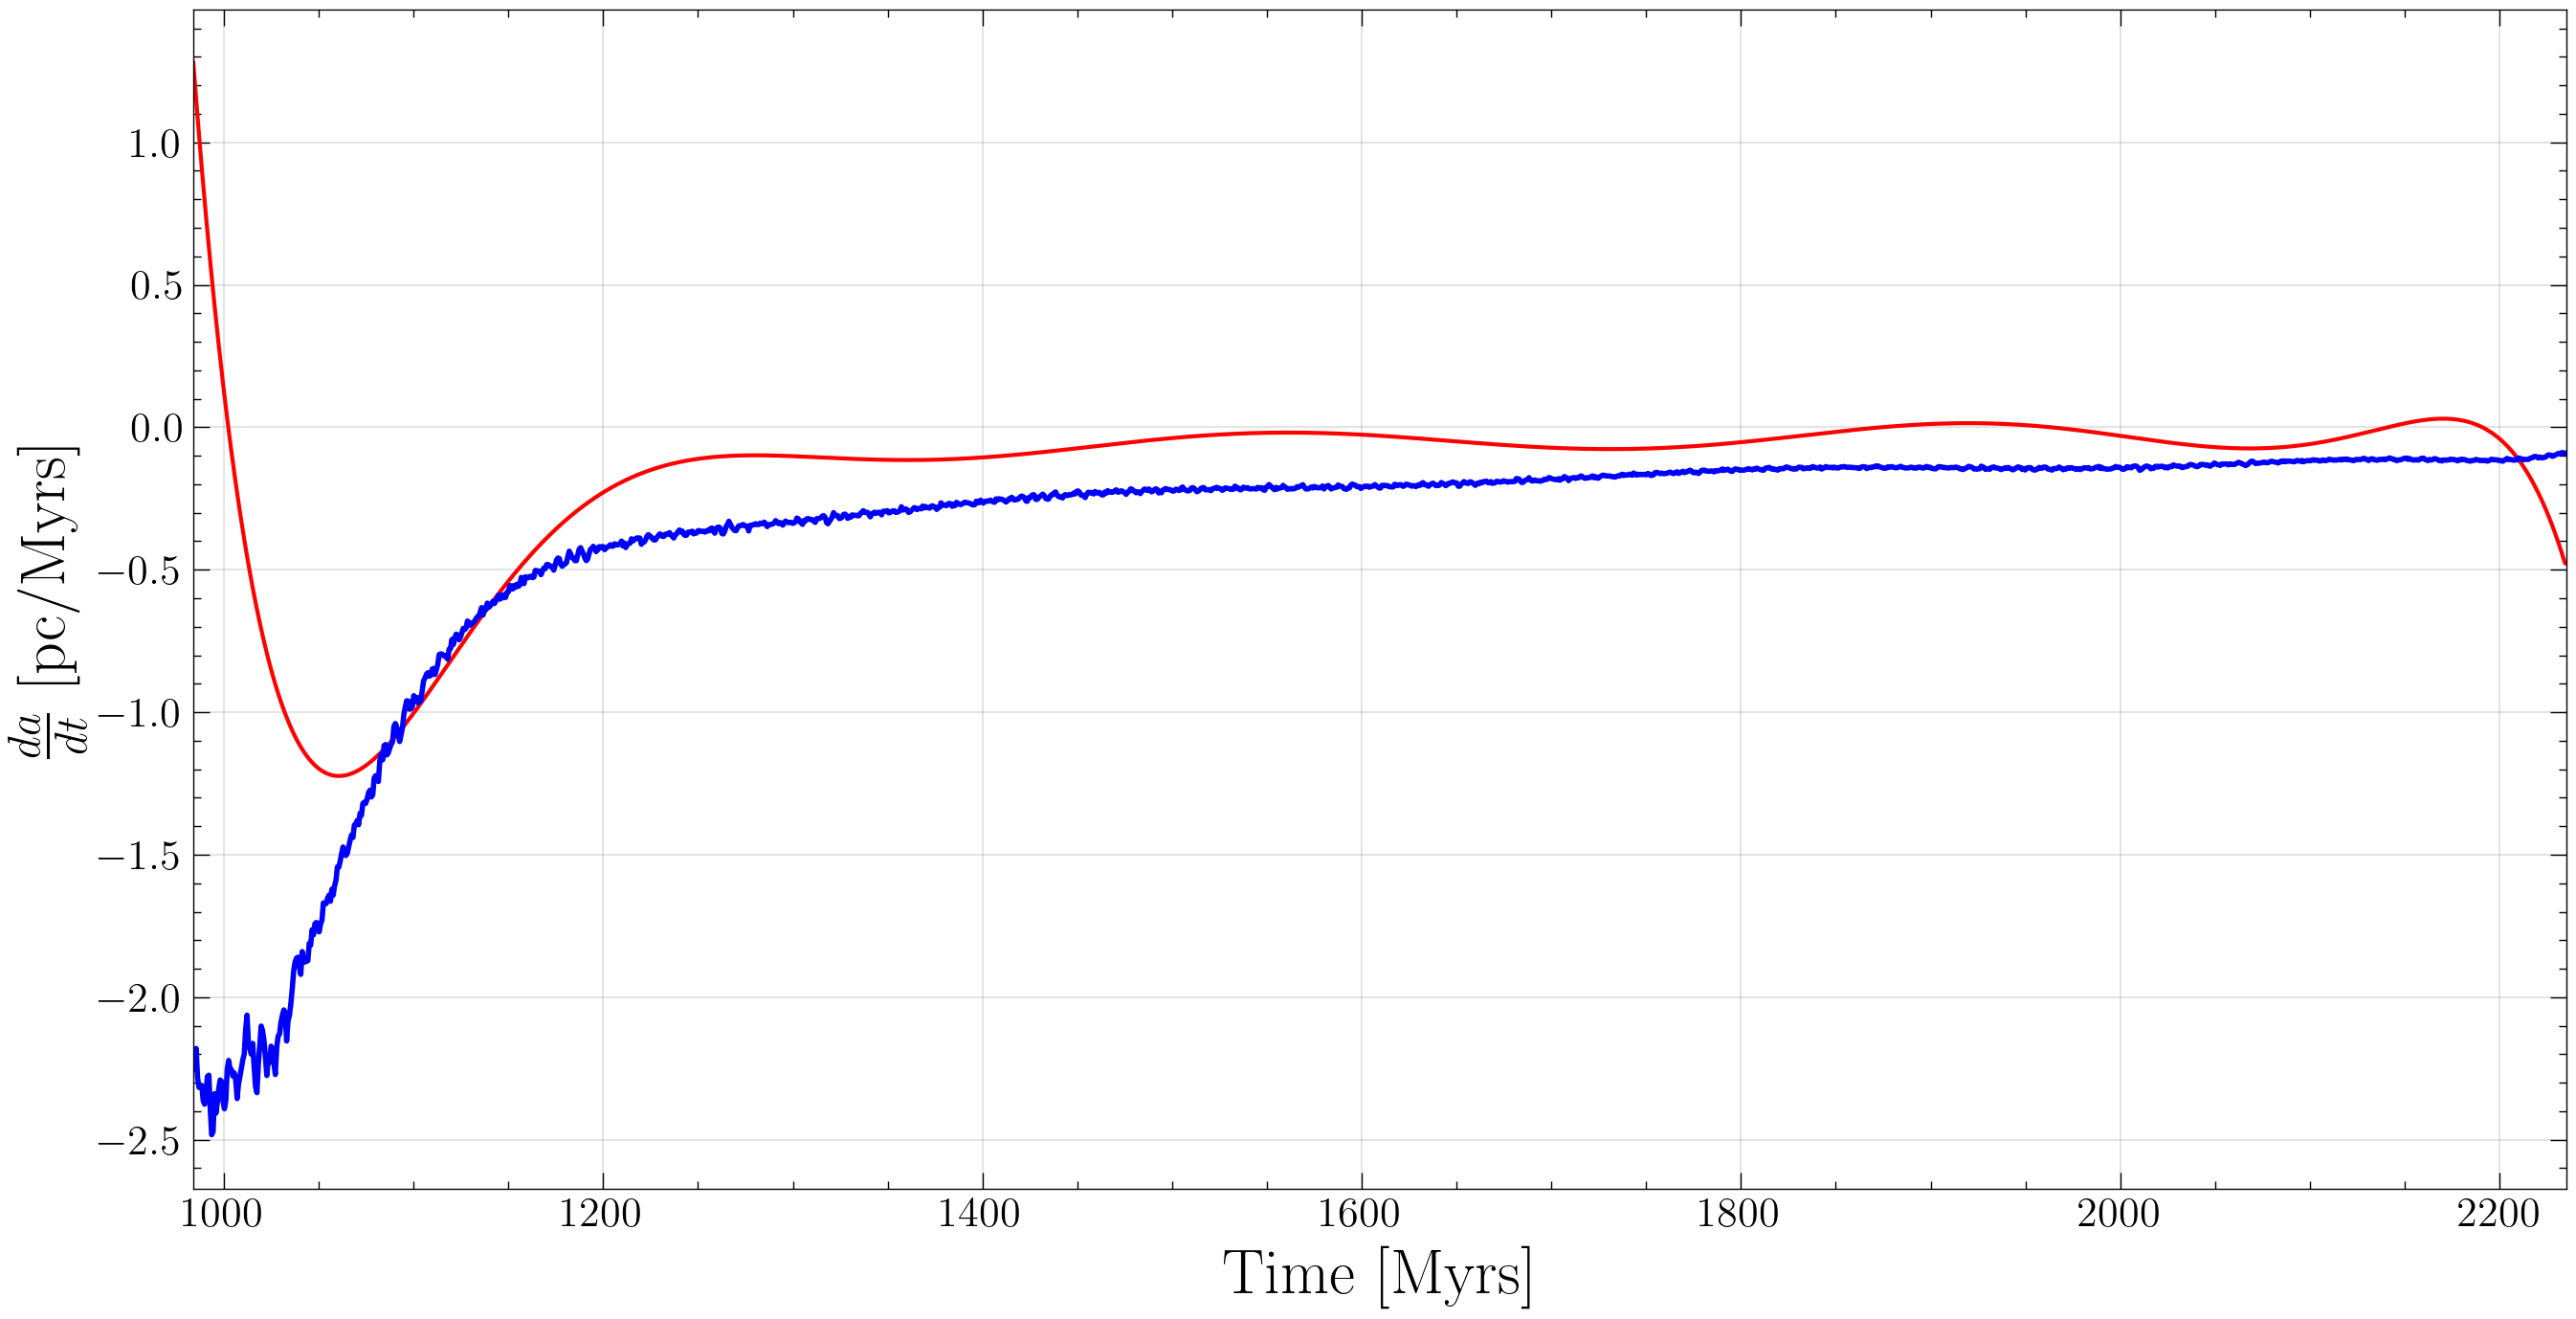

In [63]:
hardening_rate = 0.05

delta_separation_expected = - hardening_rate * (G_pu_primed * number_density_mbh1[index_binary_formation:] * m_particle * dist_mbhs_fit**2) / sigma_mbh1[index_binary_formation:]

plt.figure(figsize=(16, 8))
plt.plot(time[index_binary_formation:], delta_separation, color='red')
plt.plot(time[index_binary_formation:], delta_separation_expected, color='blue', lw=2, label='Expected $\\frac{da}{dt}$')
plt.xlim(time[index_binary_formation], time[-1])
plt.xlabel('Time [Myrs]')
plt.ylabel('$\\frac{da}{dt}$ [pc/Myrs]');

# Animation: 2D-histogram

In [64]:
animate_2Dhist = False
if animate_2Dhist:
    # if len(x)=N, then the animation will have N/k frames
    k = 1
    nframes = int(len(time)/k)
    
    # Define the binning
    nbins = int(20*np.log10(N))
    bins = np.linspace(-dist_plotlimits, dist_plotlimits, nbins)
    
    # Define the figure
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))
    title = fig.suptitle(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[0]:.0f}$ Myrs', fontsize=25, y=0.95)
    
    # Colorbar
    hist = ax.hist2d(x[:, 0], y[:, 0], bins=bins, norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0)
    cax = fig.add_axes([0.91, 0.14, 0.01, 0.71], label='$N_{points}/bin$')
    fig.colorbar(hist[3], cax, label='$N_{points}/bin$')
    hist = []
    
    def animate(i):
        t = k*i
        
        print(f'frame {(i+1)}/{nframes} --> {math.ceil(100*t/len(x[0]))}%', end='\r')
        
        title.set_text(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[t]:.0f}$ Myrs')
        
        ax = axes[0]
        ax.clear()
        ax.set_box_aspect(1)
        ax.hist2d(x[:, t], y[:, t], bins=bins, norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
        ax.axvline(0, ls='--', lw=1,color='black')
        ax.axhline(0, ls='--', lw=1,color='black')
        ax.plot(x[-1, t], y[-1, t], 'o', color='black', markeredgewidth=1, markeredgecolor='black', markersize=10, label='MBH1')
        ax.plot(x[-2, t], y[-2, t], 'o', color='darkred', markeredgewidth=1, markeredgecolor='darkred', markersize=10, label='MBH2')
        ax.set_xlim(-dist_plotlimits, dist_plotlimits)
        ax.set_ylim(-dist_plotlimits, dist_plotlimits)
        ax.set_xlabel('x [pc]')
        ax.set_ylabel('y [pc]')
        ax.legend()
    
        ax = axes[1]
        ax.clear()
        ax.set_box_aspect(1)
        ax.hist2d(x[:, t], z[:, t], bins=bins, norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
        ax.axvline(0, ls='--', lw=1,color='black')
        ax.axhline(0, ls='--', lw=1,color='black')
        ax.plot(x[-1, t], z[-1, t], 'o', color='black', markeredgewidth=1, markeredgecolor='black', markersize=10, label='MBH1')
        ax.plot(x[-2, t], z[-2, t], 'o', color='darkred', markeredgewidth=1, markeredgecolor='darkred', markersize=10, label='MBH2')
        ax.set_xlim(-dist_plotlimits, dist_plotlimits)
        ax.set_ylim(-dist_plotlimits, dist_plotlimits)
        ax.set_xlabel('x [pc]')
        ax.set_ylabel('z [pc]')
    
        ax = axes[2]
        ax.clear()
        ax.set_box_aspect(1)
        ax.hist2d(y[:, t], z[:, t], bins=bins, norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
        ax.axvline(0, ls='--', lw=1,color='black')
        ax.axhline(0, ls='--', lw=1,color='black')
        ax.plot(y[-1, t], z[-1, t], 'o', color='black', markeredgewidth=1, markeredgecolor='black', markersize=10, label='MBH1')
        ax.plot(y[-2, t], z[-2, t], 'o', color='darkred', markeredgewidth=1, markeredgecolor='darkred', markersize=10, label='MBH2')
        ax.set_xlim(-dist_plotlimits, dist_plotlimits)
        ax.set_ylim(-dist_plotlimits, dist_plotlimits)
        ax.set_xlabel('y [pc]')
        ax.set_ylabel('z [pc')
            
        return fig,
    
    ani = animation.FuncAnimation(fig, animate, frames=nframes, interval=1, blit=True)
    #ani.save('friction_2Dhist.gif', writer=animation.FFMpegWriter(fps=60), dpi=100)
    ani.save(name+'_2Dhist.mp4', writer=animation.FFMpegWriter(fps=20, bitrate=-1, codec='h264'), dpi=200)

# Animation: orbits of the MBHs

In [65]:
time_interval = int(len(time)/10)
print(f'time_interval = {time[time_interval]}')

orbit_plotlimits = np.max([dist_mbh1, dist_mbh2])
print(f'orbit_plotlimits = {orbit_plotlimits}')

time_interval = 223.59122848584988
orbit_plotlimits = 5252.589764997975


In [66]:
# We define a time at which we want to accelerate the zoom in
index_zoomin = int(3/4*index_binary_formation)

In [67]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom 3D Arrow class
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

    def update_position(self, xs, ys, zs):
        self._verts3d = xs, ys, zs
        
    def update_properties(self, **kwargs):
        """
        Update visual properties of the arrow.
        Example: arrow.update_properties(color='red', linewidth=2)
        """
        for key, value in kwargs.items():
            if hasattr(self, f"set_{key}"):
                getattr(self, f"set_{key}")(value)
            else:
                setattr(self, key, value)

## Plot setup
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.set_xlim(-2, 2)
#ax.set_ylim(-2, 2)
#ax.set_zlim(0, 1)
#
## Initial arrow
#arrow = Arrow3D([0, 1], [0, 1], [0, 1],
#                mutation_scale=20, arrowstyle='-|>', color='black')
#ax.add_artist(arrow)
#
## Updated arrow
#arrow.update_position([0, 2], [0, 1], [0, 1])
#arrow.update_properties(color='red', linewidth=3)

In [68]:
animate_orbit = False

if animate_orbit:
    # if len(time)=N, then the animation will have N/k frames
    k = 1
    nframes = int(len(time)/k)
    
    # Define the scale of the velocity vectors
    vel_scale1 = np.sqrt((x[-1, 0]**2 + y[-1, 0]**2 + z[-1, 0]**2)/(vx[-1, 0]**2 + vy[-1, 0]**2 + vz[-1, 0]**2))
    vel_scale2 = np.sqrt((x[-2, 0]**2 + y[-2, 0]**2 + z[-2, 0]**2)/(vx[-2, 0]**2 + vy[-2, 0]**2 + vz[-2, 0]**2))
    
    # Set properties of the scatter plot 
    s_cm = 5
    s_mbh = 10
    
    # Define the figure
    fig = plt.figure(figsize=(24, 13.5))
    gs = fig.add_gridspec(3, 2, width_ratios=[1.4, 1])
    ax1 = fig.add_subplot(gs[:, 0], projection='3d')
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 1])
    title = fig.suptitle(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[0]:.0f}$ Myrs', fontsize=25, y=0.95)

    # Axis 1
    ax1.set_box_aspect([1, 1, 1])
    ax1.set_xlabel('x [pc]')
    ax1.set_ylabel('y [pc]')
    ax1.set_zlabel('z [pc]')
    ax1.set_xlim(-orbit_plotlimits, orbit_plotlimits)
    ax1.set_ylim(-orbit_plotlimits, orbit_plotlimits)
    ax1.set_zlim(-orbit_plotlimits, orbit_plotlimits)
    plot_CM = ax1.scatter(0, 0, 0, c='red', s=s_cm, edgecolors='black', linewidths=0.1, label='CM')
    plot_mbh1 = ax1.scatter([], [], [], c='black', s=s_mbh, label='MBH1')
    plot_mbh2 = ax1.scatter([], [], [], c='darkred', s=s_mbh, label='MBH2')
    plot_mbh1_orbit, = ax1.plot([], [], [], c='black', ls='--', lw=1, alpha=0.5)
    plot_mbh2_orbit, = ax1.plot([], [], [], c='darkred', ls='--', lw=1, alpha=0.5)
    plot_mbh1_vel = Arrow3D([0, 0], [0, 0], [0, 0], mutation_scale=20, arrowstyle='-|>', color='black')
    ax1.add_artist(plot_mbh1_vel)
    plot_mbh2_vel = Arrow3D([0, 0], [0, 0], [0, 0], mutation_scale=20, arrowstyle='-|>', color='darkred')
    ax1.add_artist(plot_mbh2_vel)
    legend = ax1.legend(loc='upper right', fontsize=20)
    for marker in legend.legend_handles: marker._sizes = marker._sizes*8

    # Axis 2
    ax2.set_xlim(0, time[-1])
    ax2.set_ylim(bottom=0.95*np.min([dist_mbh1, dist_mbh2]) , top=1.05*np.max([dist_mbh1, dist_mbh2]))
    ax2.set_yscale('log')
    ax2.set_ylabel('$r(t)$ [pc]')
    ax2.tick_params(axis='x', which='both', labelbottom=False)
    dist_mbh1_plot, = ax2.plot([], [], c='black', lw=1, label='$r_{\\text{MBH1}} (t)$')
    dist_mbh2_plot, = ax2.plot([], [], c='darkred', lw=1, label='$r_{\\text{MBH2}} (t)$')
    dist_mbh_plot_vline = ax2.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax2.legend(loc='upper right')
    
    # Axis 3
    ax3.set_xlim(0, time[-1])
    ax3.set_ylim(bottom=0.95*np.min([v_mbh1, v_mbh2]) , top=1.05*np.max([v_mbh1, v_mbh2]))
    ax3.set_yscale('log')
    ax3.set_ylabel('$v(t)$ [km/s]')
    ax3.tick_params(axis='x', which='both', labelbottom=False)
    v_mbh1_plot, = ax3.plot([], [], c='black', lw=1, label='$v_{\\text{MBH1}} (t)$')
    v_mbh2_plot, = ax3.plot([], [], c='darkred', lw=1, label='$v_{\\text{MBH2}} (t)$')
    v_mbh_plot_vline = ax3.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax3.legend(loc='upper right')
    
    # Axis 4
    ax4.set_xlim(0, time[-1])
    ax4.set_ylim(bottom=0.95*np.min([dist_mbhs]) , top=1.05*np.max([dist_mbhs]))
    ax4.set_yscale('log')
    ax4.set_xlabel('Time [Myrs]')
    ax4.set_ylabel('Separation $(t)$ [pc]')
    dist_mbhs_plot, = ax4.plot([], [], c='deepskyblue', lw=1, label='$\\text{Separation}(t)$', zorder=2)
    r_influence_plot, = ax4.plot([], [], c='chartreuse', lw=1, label='$r_\\text{influence}(t) \simeq \\frac{G M_\\text{MBH}}{\sigma^2(t)}$', zorder=1)
    dist_mbhs_plot_vline = ax4.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax4.legend(loc='upper right')
 
    def animate(i):
        t = k*i
        
        # Define the coefficient that controls the zoom level
        # We can change it when the binary forms
        coeff = 1 + (i/nframes)*5
        if t > index_zoomin: coeff = 1 + ((index_zoomin/k)/nframes)*5 + ((i-index_zoomin/k)/nframes)*40
        
        time_left = int(t - time_interval/coeff)
        
        print(f'frame {(i+1)}/{nframes} --> {math.ceil(100*t/len(x[0]))}% , Zoom coefficient = {coeff:.1f}', end='\r')
        
        title.set_text(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[t]:.0f}$ Myrs')    
            
        # Axis 1
        # Shrink the axes
        orbit_plotlimits_temp = orbit_plotlimits/coeff
        ax1.set_xlim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        ax1.set_ylim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        ax1.set_zlim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        
        if t<time_interval:
            plot_mbh1_orbit.set_data(x[-1, :t], y[-1, :t])
            plot_mbh1_orbit.set_3d_properties(z[-1, :t])
            plot_mbh2_orbit.set_data(x[-2, :t], y[-2, :t])
            plot_mbh2_orbit.set_3d_properties(z[-2, :t])
        else:
            plot_mbh1_orbit.set_data(x[-1, time_left:t], y[-1, time_left:t])
            plot_mbh1_orbit.set_3d_properties(z[-1, time_left:t])
            plot_mbh2_orbit.set_data(x[-2, time_left:t], y[-2, time_left:t])
            plot_mbh2_orbit.set_3d_properties(z[-2, time_left:t])
        
        plot_mbh1._offsets3d = ([x[-1, t]], [y[-1, t]], [z[-1, t]])
        plot_mbh1.set(sizes=[s_mbh*(coeff)])
        
        plot_mbh2._offsets3d = ([x[-2, t]], [y[-2, t]], [z[-2, t]])
        plot_mbh2.set(sizes=[s_mbh*(coeff)])
        
        vel_scale_temp1 = vel_scale1/coeff
        plot_mbh1_vel.update_position([x[-1, t], x[-1, t]+vel_scale_temp1*vx[-1, t]], 
                                      [y[-1, t], y[-1, t]+vel_scale_temp1*vy[-1, t]], 
                                      [z[-1, t], z[-1, t]+vel_scale_temp1*vz[-1, t]])
        plot_mbh1_vel.update_properties(mutation_scale=20)
        
        vel_scale_temp2 = vel_scale2/coeff
        plot_mbh2_vel.update_position([x[-2, t], x[-2, t]+vel_scale_temp2*vx[-2, t]], 
                                      [y[-2, t], y[-2, t]+vel_scale_temp2*vy[-2, t]], 
                                      [z[-2, t], z[-2, t]+vel_scale_temp2*vz[-2, t]])
        plot_mbh2_vel.update_properties(mutation_scale=20)
        
        
        # Axis 2
        dist_mbh1_plot.set_data([time[:t]], [dist_mbh1[:t]])
        dist_mbh2_plot.set_data([time[:t]], [dist_mbh2[:t]])
        dist_mbh_plot_vline.set_xdata([time[t], time[t]])


        # Axis 3
        v_mbh1_plot.set_data([time[:t]], [v_mbh1[:t]])
        v_mbh2_plot.set_data([time[:t]], [v_mbh2[:t]])
        v_mbh_plot_vline.set_xdata([time[t], time[t]])
        
        
        # Axis 3
        dist_mbhs_plot.set_data([time[:t]], [dist_mbhs[:t]])
        r_influence_plot.set_data([time[:t]], [r_influence[:t]])
        dist_mbhs_plot_vline.set_xdata([time[t], time[t]])
        
        
        return fig,
    
    ani = animation.FuncAnimation(fig, animate, frames=nframes, interval=1, blit=True)
    #ani.save('friction_orbit.gif', writer=animation.FFMpegWriter(fps=60), dpi=100)
    ani.save(name+'_orbit.mp4', writer=animation.FFMpegWriter(fps=20, bitrate=-1, codec='h264'), dpi=200)

# Animation: angular momentum 

In [69]:
# Computes the cross product between two vectors of size [3, N, M] in a batched manner, to avoid memory issues
def Batched_Cross(x1, y1, z1, x2, y2, z2, batch_size=1000):
    N, K = x1.shape
    result = np.empty((N, K, 3), dtype=x1.dtype)
    for i in tqdm(range(0, N, batch_size)):
        x1_batch = x1[i:i+batch_size]
        y1_batch = y1[i:i+batch_size]
        z1_batch = z1[i:i+batch_size]
        x2_batch = x2[i:i+batch_size]
        y2_batch = y2[i:i+batch_size]
        z2_batch = z2[i:i+batch_size]
        v1 = np.stack((x1_batch, y1_batch, z1_batch), axis=-1)
        v2 = np.stack((x2_batch, y2_batch, z2_batch), axis=-1)
        result[i:i+batch_size] = np.cross(v1, v2, axis=-1)
    return result # shape [N, K, 3]

In [70]:
# Compute the norm of the angular momentum of each particle
# This is more efficient than np.linalg.norm(np.cross(np.array([x, y, z)]).T, np.array([vx, vy, vz)]).T, axis=2).T
angmom_particles = Batched_Cross(x, y, z, vx, vy, vz)
del vx, vy, vz
angmom_particles.shape

100%|██████████| 51/51 [00:13<00:00,  3.73it/s]


(50002, 3000, 3)

In [71]:
angmom_particles = np.sqrt(angmom_particles[:,:,0]**2 + angmom_particles[:,:,1]**2 + angmom_particles[:,:,2]**2)
angmom_particles.shape

(50002, 3000)

In [72]:
angmom_particles_dot = np.diff(angmom_particles)/np.diff(time)
del angmom_particles
angmom_particles_dot.shape

(50002, 2999)

In [73]:
angmom_particles_dot = np.hstack([angmom_particles_dot, np.array([angmom_particles_dot[:,-1]]).T])
angmom_particles_dot.shape

(50002, 3000)

In [74]:
# Create the color array
angmom_log = np.log10(np.abs(angmom_particles_dot[:-2,:]))
del angmom_particles_dot
norm = plt.Normalize(vmin=np.quantile(angmom_log, 0.1), vmax=np.max(angmom_log))
colors = plt.cm.jet(norm(angmom_log))

In [75]:
animate_distribution = False

if animate_distribution:
    # if len(x)=N, then the animation will have N/k frames
    k = 1
    nframes = int(len(time)/k)
    
    # Set properties of the scatter plot
    s_cm = 5
    s_mbh = 20
    s_particles = 7
    alpha_particles = 0.6
    
    # Define the figure
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(20, 20))
    title = fig.suptitle(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[0]:.0f}$ Myrs', fontsize=25, y=0.95)
    
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('x [pc]')
    ax.set_ylabel('y [pc]')
    ax.set_zlabel('z [pc]')
    ax.set_xlim(-orbit_plotlimits, orbit_plotlimits)
    ax.set_ylim(-orbit_plotlimits, orbit_plotlimits)
    ax.set_zlim(-orbit_plotlimits, orbit_plotlimits)
    
    # Define the objects
    plot_CM = ax.scatter(0, 0, 0, c='red', s=s_cm, edgecolors='black', linewidths=0.1, label='CM')
    plot_mbh1 = ax.scatter([], [], [], c='black', s=s_mbh, label='MBH1')
    plot_mbh2 = ax.scatter([], [], [], c='darkred', s=s_mbh, label='MBH2')
    plot_mbh1_orbit, = ax.plot([], [], [], c='black', ls='--', lw=1, alpha=0.5)
    plot_mbh2_orbit, = ax.plot([], [], [], c='darkred', ls='--', lw=1, alpha=0.5)
    plot_particles = ax.scatter([], [], [], s=s_particles, alpha=alpha_particles, linewidths=0)
    ax.legend(loc='upper right', fontsize=30)
    
    # Colorbar
    plot_particles_colorbar = ax.scatter(x[:-2, 0], y[:-2, 0], z[:-2, 0], c=angmom_log[:,0], norm=norm, cmap=plt.cm.jet, s=0, alpha=alpha_particles, linewidths=0)
    cax = fig.add_axes([0.9, 0.2, 0.02, 0.5])
    fig.colorbar(plot_particles_colorbar, cax=cax, label='$\log_{10}|\dot{\\vec{L}}|$')
    plot_particles_colorbar = []
    
    
    def animate(i):
        t = k*i
        time_left = t - time_interval
        
        print(f'frame {(i+1)}/{nframes} --> {math.ceil(100*t/len(x[0]))}%', end='\r')
        
        title.set_text(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[t]:.0f}$ Myrs')
        
        if t<time_interval:
            plot_mbh1_orbit.set_data(x[-1, :t], y[-1, :t])
            plot_mbh1_orbit.set_3d_properties(z[-1, :t])
            plot_mbh2_orbit.set_data(x[-2, :t], y[-2, :t])
            plot_mbh2_orbit.set_3d_properties(z[-2, :t])
        else:
            plot_mbh1_orbit.set_data(x[-1, time_left:t], y[-1, time_left:t])
            plot_mbh1_orbit.set_3d_properties(z[-1, time_left:t])
            plot_mbh2_orbit.set_data(x[-2, time_left:t], y[-2, time_left:t])
            plot_mbh2_orbit.set_3d_properties(z[-2, time_left:t])
        
        plot_mbh1._offsets3d = ([x[-1, t]], [y[-1, t]], [z[-1, t]])
        plot_mbh2._offsets3d = ([x[-2, t]], [y[-2, t]], [z[-2, t]])      
        
        plot_particles._offsets3d = (x[:-2, t], y[:-2, t], z[:-2, t])
        plot_particles.set(color=colors[:,t,:])
        
        return fig,
    
    ani = animation.FuncAnimation(fig, animate, frames=nframes, interval=1, blit=True)
    #ani.save('friction.gif', writer=animation.FFMpegWriter(fps=60), dpi=100)
    ani.save(name+'_angmom.mp4', writer=animation.FFMpegWriter(fps=20, bitrate=-1, codec='h264'), dpi=100)

# Animation: complete

In [76]:
animate_distribution = False
if animate_distribution:
    # if len(x)=N, then the animation will have N/k frames
    k = 1
    nframes = int(len(time)/k)
    
    # Set properties of the scatter plot 
    s_cm = 5
    s_mbh = 10
    s_particles = 5
    alpha_particles = 0.6
    
    # Define the figure
    fig = plt.figure(figsize=(24, 13.5))
    gs = fig.add_gridspec(3, 2, width_ratios=[1.4, 1])
    ax1 = fig.add_subplot(gs[:, 0], projection='3d')
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 1])
    title = fig.suptitle(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[0]:.0f}$ Myrs', fontsize=25, y=0.95)
    
    # Axis 1
    ax1.set_box_aspect([1, 1, 1])
    ax1.set_xlabel('x [pc]')
    ax1.set_ylabel('y [pc]')
    ax1.set_zlabel('z [pc]')
    ax1.set_xlim(-orbit_plotlimits, orbit_plotlimits)
    ax1.set_ylim(-orbit_plotlimits, orbit_plotlimits)
    ax1.set_zlim(-orbit_plotlimits, orbit_plotlimits)
    plot_CM = ax1.scatter(0, 0, 0, c='red', s=s_cm, edgecolors='black', linewidths=0.1, label='CM')
    plot_mbh1 = ax1.scatter([], [], [], c='black', s=s_mbh, label='MBH1')
    plot_mbh2 = ax1.scatter([], [], [], c='darkred', s=s_mbh, label='MBH2')
    plot_mbh1_orbit, = ax1.plot([], [], [], c='black', ls='--', lw=0.5, alpha=0.5)
    plot_mbh2_orbit, = ax1.plot([], [], [], c='darkred', ls='--', lw=0.5, alpha=0.5)
    plot_particles = ax1.scatter([], [], [], s=s_particles, alpha=alpha_particles, linewidths=0)
    legend = ax1.legend(loc='upper right', fontsize=20)
    for marker in legend.legend_handles: marker._sizes = marker._sizes*8
    
    # Axis 2
    ax2.set_xlim(0, time[-1])
    ax2.set_ylim(bottom=0.95*np.min([dist_mbh1, dist_mbh2]) , top=1.05*np.max([dist_mbh1, dist_mbh2]))
    ax2.set_yscale('log')
    ax2.set_ylabel('$r(t)$ [pc]')
    ax2.tick_params(axis='x', which='both', labelbottom=False)
    dist_mbh1_plot, = ax2.plot([], [], c='black', lw=1, label='$r_{\\text{MBH1}} (t)$')
    dist_mbh2_plot, = ax2.plot([], [], c='darkred', lw=1, label='$r_{\\text{MBH2}} (t)$')
    dist_mbh_plot_vline = ax2.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax2.legend(loc='upper right')
    
    # Axis 3
    ax3.set_xlim(0, time[-1])
    ax3.set_ylim(bottom=0.95*np.min([v_mbh1, v_mbh2]) , top=1.05*np.max([v_mbh1, v_mbh2]))
    ax3.set_yscale('log')
    ax3.set_ylabel('$v(t)$ [km/s]')
    ax3.tick_params(axis='x', which='both', labelbottom=False)
    v_mbh1_plot, = ax3.plot([], [], c='black', lw=1, label='$v_{\\text{MBH1}} (t)$')
    v_mbh2_plot, = ax3.plot([], [], c='darkred', lw=1, label='$v_{\\text{MBH2}} (t)$')
    v_mbh_plot_vline = ax3.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax3.legend(loc='upper right')
    
    # Axis 4
    ax4.set_xlim(0, time[-1])
    ax4.set_ylim(bottom=0.95*np.min([dist_mbhs]) , top=1.05*np.max([dist_mbhs]))
    ax4.set_yscale('log')
    ax4.set_xlabel('Time [Myrs]')
    ax4.set_ylabel('Separation $(t)$ [pc]')
    dist_mbhs_plot, = ax4.plot([], [], c='deepskyblue', lw=1, label='$\\text{Separation}(t)$', zorder=2)
    r_influence_plot, = ax4.plot([], [], c='chartreuse', lw=1, label='$r_\\text{influence}(t) \simeq \\frac{G M_\\text{MBH}}{\sigma^2(t)}$', zorder=1)
    dist_mbhs_plot_vline = ax4.axvline(0, linestyle='--', lw=0.7, c='grey', zorder=0)
    ax4.legend(loc='upper right')
    
    # Colorbar
    plot_particles_colorbar = ax1.scatter(x[:-2, 0], y[:-2, 0], z[:-2, 0], c=angmom_log[:,0], norm=norm, cmap=plt.cm.jet, s=0, alpha=alpha_particles, linewidths=0)
    cax = fig.add_axes([0.08, 0.13, 0.01, 0.73])
    colorbar = fig.colorbar(plot_particles_colorbar, cax=cax)
    colorbar.ax.tick_params(labelsize=15)
    colorbar.set_label('$\log_{10}|\dot{\\vec{L}}|$', labelpad=-80, y=0.45)
    plot_particles_colorbar = []
    
    def animate(i):
        t = k*i
        
        # Define the coefficient that controls the zoom level
        # We can change it when the binary forms
        coeff = 1 + (i/nframes)*5
        if t > index_zoomin: coeff = 1 + ((index_zoomin/k)/nframes)*5 + ((i-index_zoomin/k)/nframes)*40
        
        time_left = int(t - time_interval/coeff)
        
        print(f'frame {(i+1)}/{nframes} --> {math.ceil(100*t/len(x[0]))}% , Zoom coefficient = {coeff:.1f}', end='\r')
        
        title.set_text(f'${N}$ particles , $M = {M:.0e} M_\odot$ , $M_{{\\text{{MBHs}}}} = {M_mbh:.0e} M_\odot$ , $\\theta = {theta:.2f}$ , $eps = {eps:.2f}$ , \n $t = {time[t]:.0f}$ Myrs')
        
        # Axis 1
        # Shrink the axes
        orbit_plotlimits_temp = orbit_plotlimits/coeff
        ax1.set_xlim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        ax1.set_ylim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        ax1.set_zlim(-orbit_plotlimits_temp, orbit_plotlimits_temp)
        
        if t<time_interval:
            plot_mbh1_orbit.set_data(x[-1, :t], y[-1, :t])
            plot_mbh1_orbit.set_3d_properties(z[-1, :t])
            plot_mbh2_orbit.set_data(x[-2, :t], y[-2, :t])
            plot_mbh2_orbit.set_3d_properties(z[-2, :t])
        else:
            plot_mbh1_orbit.set_data(x[-1, time_left:t], y[-1, time_left:t])
            plot_mbh1_orbit.set_3d_properties(z[-1, time_left:t])
            plot_mbh2_orbit.set_data(x[-2, time_left:t], y[-2, time_left:t])
            plot_mbh2_orbit.set_3d_properties(z[-2, time_left:t])
        
        plot_mbh1._offsets3d = ([x[-1, t]], [y[-1, t]], [z[-1, t]])
        plot_mbh1.set(sizes=[s_mbh*(coeff**2)])
        
        plot_mbh2._offsets3d = ([x[-2, t]], [y[-2, t]], [z[-2, t]])
        plot_mbh2.set(sizes=[s_mbh*(coeff**2)])
        
        # Masking the particles in the frame does not reduce the computational time
        #mask_particles_in_frame = np.logical_or(np.logical_or(np.abs(x[:-2, t]) < orbit_plotlimits_temp, np.abs(y[:-2, t]) < orbit_plotlimits_temp) , np.abs(z[:-2, t]) < orbit_plotlimits_temp)
        #plot_particles._offsets3d = (x[:-2, t][mask_particles_in_frame], y[:-2, t][mask_particles_in_frame], z[:-2, t][mask_particles_in_frame])
        #plot_particles.set(sizes=[s_particles*(coeff**2)], alpha=alpha_particles/(1+coeff/3), color=colors[:,t,:][mask_particles_in_frame])
        plot_particles._offsets3d = (x[:-2, t], y[:-2, t], z[:-2, t])
        plot_particles.set(sizes=[s_particles*(coeff)], alpha=alpha_particles/(1+coeff/5), color=colors[:,t,:])
        
        
        # Axis 2
        dist_mbh1_plot.set_data([time[:t]], [dist_mbh1[:t]])
        dist_mbh2_plot.set_data([time[:t]], [dist_mbh2[:t]])
        dist_mbh_plot_vline.set_xdata([time[t], time[t]])


        # Axis 3
        v_mbh1_plot.set_data([time[:t]], [v_mbh1[:t]])
        v_mbh2_plot.set_data([time[:t]], [v_mbh2[:t]])
        v_mbh_plot_vline.set_xdata([time[t], time[t]])
        
        
        # Axis 3
        dist_mbhs_plot.set_data([time[:t]], [dist_mbhs[:t]])
        r_influence_plot.set_data([time[:t]], [r_influence[:t]])
        dist_mbhs_plot_vline.set_xdata([time[t], time[t]])
        
        return fig,
    
    ani = animation.FuncAnimation(fig, animate, frames=nframes, interval=1, blit=True)
    #ani.save(name+'_complete.gif', writer=animation.FFMpegWriter(fps=60), dpi=100)
    ani.save(name+'_complete.mp4', writer=animation.FFMpegWriter(fps=20, bitrate=24000, codec='h264'), dpi=100)